In [17]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna # Add optuna import
import yfinance as yf
import pandas_ta as ta # Import pandas_ta

In [18]:
path = r"C:\Users\singh\.cache\kagglehub\datasets\alifougi\forex-currency-pairs-dataset-in-1-hour-timeframe\versions\1\forex-1year.csv"

# Load the dataset
df = pd.read_csv(path)
df.head()



,date,clock,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,...,open_usdchf,high_usdchf,low_usdchf,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy
0,2023.04.24,00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,...,1.09883,1.09904,1.09861,1.09863,552,1.09883,1.09904,1.09861,1.09863,552
1,2023.04.24,01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,...,1.09868,1.09928,1.09862,1.09921,704,1.09868,1.09928,1.09862,1.09921,704
2,2023.04.24,02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,...,1.09921,1.09956,1.09906,1.09913,625,1.09921,1.09956,1.09906,1.09913,625
3,2023.04.24,03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,...,1.09913,1.09945,1.09839,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451
4,2023.04.24,04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,...,1.09944,1.09944,1.09864,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713


In [19]:
# Combine date and clock into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['clock'])

# Set the new datetime column as the index
df = df.set_index('datetime')

# Display the first few rows with the new index
df.head()

,date,clock,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,...,open_usdchf,high_usdchf,low_usdchf,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy
datetime,,,,,,,,,,,,,,,,,,,,,
2023-04-24 00:00:00,2023.04.24,00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,...,1.09883,1.09904,1.09861,1.09863,552,1.09883,1.09904,1.09861,1.09863,552
2023-04-24 01:00:00,2023.04.24,01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,...,1.09868,1.09928,1.09862,1.09921,704,1.09868,1.09928,1.09862,1.09921,704
2023-04-24 02:00:00,2023.04.24,02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,...,1.09921,1.09956,1.09906,1.09913,625,1.09921,1.09956,1.09906,1.09913,625
2023-04-24 03:00:00,2023.04.24,03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,...,1.09913,1.09945,1.09839,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451
2023-04-24 04:00:00,2023.04.24,04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,...,1.09944,1.09944,1.09864,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713


## Plotting MACD for EUR/USD

## Plotting RSI for EUR/USD

## Plotting EUR/USD Closing Price

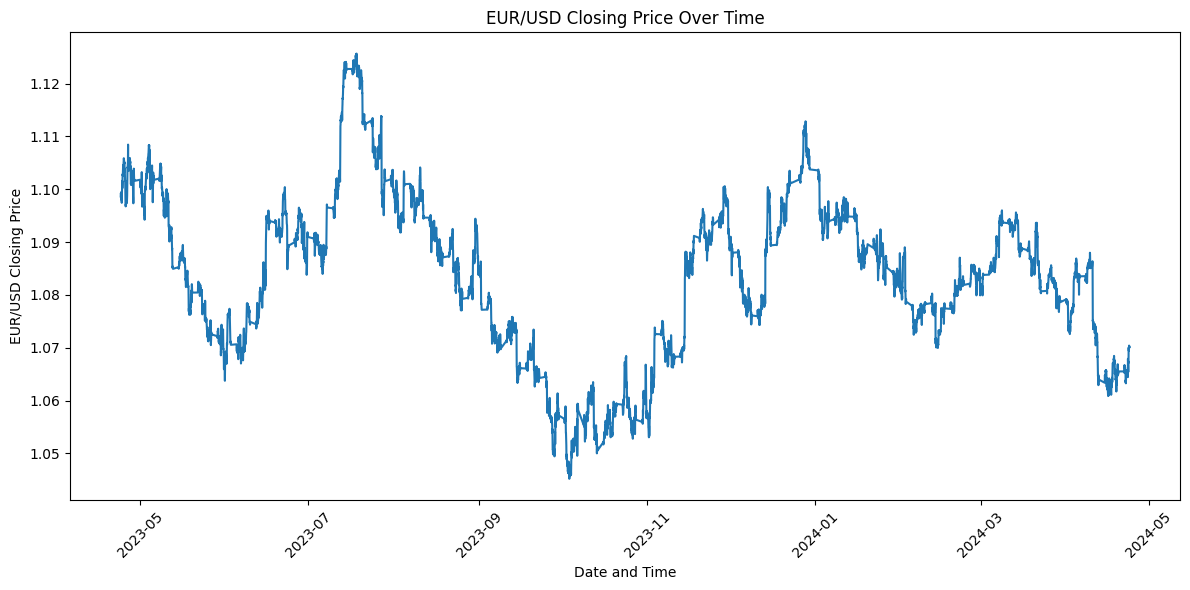

In [20]:
# Plot the closing price of EUR/USD
plt.figure(figsize=(12, 6)) # Optional: Adjust figure size
plt.plot(df.index, df['close_eurusd'])
plt.xlabel("Date and Time")
plt.ylabel("EUR/USD Closing Price")
plt.title("EUR/USD Closing Price Over Time")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

## Plotting Distribution of EUR/GBP Closing Prices

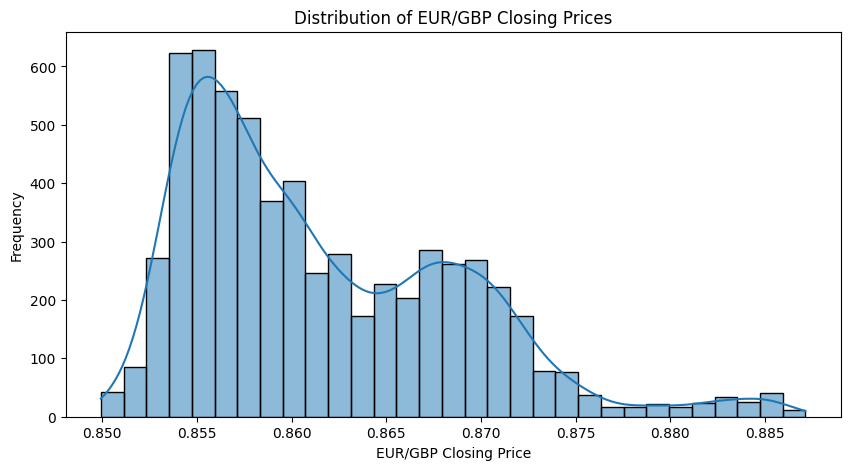

In [21]:
# Plot the distribution of EUR/GBP closing prices
plt.figure(figsize=(10, 5))
sns.histplot(df['close_eurgbp'], kde=True) # Histogram with a density curve
plt.title("Distribution of EUR/GBP Closing Prices")
plt.xlabel("EUR/GBP Closing Price")
plt.ylabel("Frequency")
plt.show()

## Simple EMA Crossover Strategy (8, 20, 200)

In [22]:
# Calculate EMAs
df['ema_8'] = df['close_eurusd'].ewm(span=8, adjust=False).mean()
df['ema_20'] = df['close_eurusd'].ewm(span=20, adjust=False).mean()
df['ema_200'] = df['close_eurusd'].ewm(span=200, adjust=False).mean()

df[['close_eurusd', 'ema_8', 'ema_20', 'ema_200']].tail() # Display last few rows with EMAs

,close_eurusd,ema_8,ema_20,ema_200
datetime,,,,
2024-04-23 20:00:00,1.07040,1.068943,1.067479,1.067648
2024-04-23 21:00:00,1.07030,1.069244,1.067748,1.067675
2024-04-23 22:00:00,1.07021,1.069459,1.067982,1.067700
2024-04-23 23:00:00,1.07006,1.069593,1.068180,1.067724
2024-04-24 00:00:00,1.07007,1.069699,1.068360,1.067747


In [23]:
# Generate Signals
# Conditions for a potential long entry
long_condition = (df['ema_8'] > df['ema_200']) & (df['ema_20'] > df['ema_200'])
# Conditions for a potential short entry
short_condition = (df['ema_8'] < df['ema_200']) & (df['ema_20'] < df['ema_200'])

# Determine the actual signal: 1 for long, -1 for short, 0 for no signal
# We only signal on the crossover bar
df['signal'] = 0
# Long signal: current bar meets long condition, previous bar did not
df.loc[long_condition & ~long_condition.shift(1).fillna(False), 'signal'] = 1
# Short signal: current bar meets short condition, previous bar did not
df.loc[short_condition & ~short_condition.shift(1).fillna(False), 'signal'] = -1

# Ensure no lookahead bias: Shift signals to the next bar for execution
df['signal'] = df['signal'].shift(1).fillna(0).astype(int)

# Display rows where a signal is generated
df[df['signal'] != 0].head()

C:\Users\singh\AppData\Local\Temp\ipykernel_14248\4013270939.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[long_condition & ~long_condition.shift(1).fillna(False), 'signal'] = 1
C:\Users\singh\AppData\Local\Temp\ipykernel_14248\4013270939.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[short_condition & ~short_condition.shift(1).fillna(False), 'signal'] = -1


,date,clock,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,...,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy,ema_8,ema_20,ema_200,signal
datetime,,,,,,,,,,,,,,,,,,,,,
2023-04-24 02:00:00,2023.04.24,02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,...,625,1.09921,1.09956,1.09906,1.09913,625,1.098841,1.098728,1.098641,1
2023-04-24 08:00:00,2023.04.24,08:00:00,1.09799,1.09807,1.09721,1.09779,1442,0.66751,0.66763,0.66695,...,1442,1.09799,1.09807,1.09721,1.09779,1442,1.098305,1.098518,1.098623,-1
2023-04-24 12:00:00,2023.04.24,12:00:00,1.10081,1.10199,1.09989,1.09999,3556,0.66877,0.66942,0.66804,...,3556,1.10081,1.10199,1.09989,1.09999,3556,1.099058,1.098783,1.098646,1
2023-04-26 02:00:00,2023.04.26,02:00:00,1.09776,1.09800,1.09723,1.09774,1114,0.66360,0.66375,0.66301,...,1114,1.09776,1.09800,1.09723,1.09774,1114,1.097801,1.099380,1.099604,-1
2023-04-26 12:00:00,2023.04.26,12:00:00,1.10413,1.10538,1.10364,1.10405,4334,0.66040,0.66061,0.65946,...,4334,1.10413,1.10538,1.10364,1.10405,4334,1.101199,1.100084,1.099629,1


In [24]:
# Count the number of signals
print("Number of Long Signals:", (df['signal'] == 1).sum())
print("Number of Short Signals:", (df['signal'] == -1).sum())

Number of Long Signals: 38
Number of Short Signals: 38


## Calculate Stop Loss (SL) and Take Profit (TP)

In [25]:
# Define lookback period for swing high/low
lookback_period = 7

# Calculate rolling min low and max high (shifted to look *before* the current bar)
df['swing_low'] = df['low_eurusd'].rolling(window=lookback_period).min().shift(1)
df['swing_high'] = df['high_eurusd'].rolling(window=lookback_period).max().shift(1)

# Initialize SL/TP columns
df['stop_loss'] = np.nan
df['take_profit'] = np.nan

# Get signal indices
long_signal_indices = df[df['signal'] == 1].index
short_signal_indices = df[df['signal'] == -1].index

# Calculate SL/TP for Long signals
if not long_signal_indices.empty:
    entry_price_long = df.loc[long_signal_indices, 'close_eurusd']
    stop_loss_long = df.loc[long_signal_indices, 'swing_low']
    take_profit_long = entry_price_long + 2 * (entry_price_long - stop_loss_long)
    df.loc[long_signal_indices, 'stop_loss'] = stop_loss_long
    df.loc[long_signal_indices, 'take_profit'] = take_profit_long

# Calculate SL/TP for Short signals
if not short_signal_indices.empty:
    entry_price_short = df.loc[short_signal_indices, 'close_eurusd']
    stop_loss_short = df.loc[short_signal_indices, 'swing_high']
    take_profit_short = entry_price_short - 2 * (stop_loss_short - entry_price_short)
    df.loc[short_signal_indices, 'stop_loss'] = stop_loss_short
    df.loc[short_signal_indices, 'take_profit'] = take_profit_short

# Ensure no lookahead bias: Shift SL/TP to the next bar for execution
df['stop_loss'] = df['stop_loss'].shift(1)
df['take_profit'] = df['take_profit'].shift(1)

# Display signals with SL/TP (dropping helper columns)
print(f"Using lookback period: {lookback_period} bars")
df[df['signal'] != 0][['close_eurusd', 'signal', 'stop_loss', 'take_profit']].head()

Using lookback period: 7 bars


,close_eurusd,signal,stop_loss,take_profit
datetime,,,,
2023-04-24 02:00:00,1.09913,1,NaN,NaN
2023-04-24 08:00:00,1.09779,-1,NaN,NaN
2023-04-24 12:00:00,1.09999,1,NaN,NaN
2023-04-26 02:00:00,1.09774,-1,NaN,NaN
2023-04-26 12:00:00,1.10405,1,NaN,NaN


## Basic Backtesting Implementation

In [26]:
# Initialize backtesting variables
position = 0  # 0: flat, 1: long, -1: short
entry_price = 0
stop_loss_level = 0
take_profit_level = 0
trades = [] # List to store details of completed trades

# Iterate through the DataFrame
for i in range(len(df)):
    current_signal = df['signal'].iloc[i]
    current_low = df['low_eurusd'].iloc[i]
    current_high = df['high_eurusd'].iloc[i]
    current_close = df['close_eurusd'].iloc[i]
    current_time = df.index[i]

    # --- Exit Logic ---
    if position == 1: # Currently long
        if current_low <= stop_loss_level:
            # Stop Loss hit
            exit_price = stop_loss_level
            trades.append({'entry_time': entry_time, 'exit_time': current_time, 'type': 'long', 'entry': entry_price, 'exit': exit_price, 'pnl': exit_price - entry_price})
            position = 0
        elif current_high >= take_profit_level:
            # Take Profit hit
            exit_price = take_profit_level
            trades.append({'entry_time': entry_time, 'exit_time': current_time, 'type': 'long', 'entry': entry_price, 'exit': exit_price, 'pnl': exit_price - entry_price})
            position = 0
    elif position == -1: # Currently short
        if current_high >= stop_loss_level:
            # Stop Loss hit
            exit_price = stop_loss_level
            trades.append({'entry_time': entry_time, 'exit_time': current_time, 'type': 'short', 'entry': entry_price, 'exit': exit_price, 'pnl': entry_price - exit_price})
            position = 0
        elif current_low <= take_profit_level:
            # Take Profit hit
            exit_price = take_profit_level
            trades.append({'entry_time': entry_time, 'exit_time': current_time, 'type': 'short', 'entry': entry_price, 'exit': exit_price, 'pnl': entry_price - exit_price})
            position = 0

    # --- Entry Logic ---
    # Check for entry only if flat and there is a signal
    if position == 0 and current_signal != 0:
        if current_signal == 1 and not pd.isna(df['stop_loss'].iloc[i]) and not pd.isna(df['take_profit'].iloc[i]):
            position = 1
            entry_price = current_close
            stop_loss_level = df['stop_loss'].iloc[i]
            take_profit_level = df['take_profit'].iloc[i]
            entry_time = current_time
        elif current_signal == -1 and not pd.isna(df['stop_loss'].iloc[i]) and not pd.isna(df['take_profit'].iloc[i]):
            position = -1
            entry_price = current_close
            stop_loss_level = df['stop_loss'].iloc[i]
            take_profit_level = df['take_profit'].iloc[i]
            entry_time = current_time

# Convert trades list to DataFrame for analysis
trades_df = pd.DataFrame(trades)

# --- Basic Performance Analysis ---
if not trades_df.empty:
    total_pnl = trades_df['pnl'].sum()
    num_trades = len(trades_df)
    num_wins = (trades_df['pnl'] > 0).sum()
    win_rate = (num_wins / num_trades) * 100 if num_trades > 0 else 0

    print(f"--- Backtest Results ---")
    print(f"Total Trades: {num_trades}")
    print(f"Winning Trades: {num_wins}")
    print(f"Losing Trades: {num_trades - num_wins}")
    print(f"Win Rate: {win_rate:.2f}%")
    # Note: PnL is in points/pips, not currency unless you factor in position size/value per pip
    print(f"Total PnL (Points): {total_pnl:.5f}")
    print(f"Average PnL per Trade: {trades_df['pnl'].mean():.5f}")
    print(f"Max Profit (Single Trade): {trades_df['pnl'].max():.5f}")
    print(f"Max Loss (Single Trade): {trades_df['pnl'].min():.5f}")
else:
    print("No trades were executed during the backtest.")

# Display first few trades
trades_df.head()

--- Backtest Results ---
Total Trades: 4
Winning Trades: 1
Losing Trades: 3
Win Rate: 25.00%
Total PnL (Points): -0.00389
Average PnL per Trade: -0.00097
Max Profit (Single Trade): 0.00096
Max Loss (Single Trade): -0.00197


,entry_time,exit_time,type,entry,exit,pnl
0,2023-06-29 16:00:00,2023-06-29 17:00:00,short,1.08684,1.08837,-0.00153
1,2023-08-11 13:00:00,2023-08-11 14:00:00,short,1.09925,1.09829,0.00096
2,2023-08-11 16:00:00,2023-08-11 17:00:00,short,1.09620,1.09755,-0.00135
3,2023-10-06 16:00:00,2023-10-06 17:00:00,short,1.05110,1.05307,-0.00197


## Identify Available Currency Pairs

In [27]:
# Identify pairs by looking for columns starting with 'close_'
all_columns = df.columns
close_columns = [col for col in all_columns if col.startswith('close_')]
# Extract the pair suffix (e.g., 'eurusd' from 'close_eurusd')
available_pairs = [col.replace('close_', '') for col in close_columns]

print("Available currency pairs found:", available_pairs)

Available currency pairs found: ['eurusd', 'audusd', 'eurgbp', 'gbpusd', 'nzdusd', 'usdchf', 'usdjpy']


## Derivative Strategy Backtesting Function (Multiple Exits)

In [28]:
import pandas as pd
import numpy as np

def run_derivative_backtest_for_pair_with_cooldown(
    df_original,
    pair_suffix,
    exit_strategy='fixed_rr', # 'fixed_rr', 'trailing_sl', 'time_exit'
    rr_ratio=2.0,               # Base R:R for 'fixed_rr'
    trailing_sl_distance=None,# For 'trailing_sl'
    max_hold_bars=None,       # For 'time_exit'
    lookback_period=7,       # For swing high/low SL calculation
    cooldown_period_bars=3,  # Bars to wait after entry before allowing a new entry
    # --- ATR Volatility Filter ---
    use_atr_filter=False,
    atr_period=14,
    atr_ma_period=20, # Period for ATR moving average filter (ATR > MA)
    # --- ADX Trend/Whipsaw Filter ---
    use_adx_filter=False, # Filter for ADX > adx_trend_threshold
    adx_period=14,
    adx_trend_threshold=25,
    use_adx_whipsaw_filter=False, # Filter OUT if ADX < adx_whipsaw_threshold
    adx_whipsaw_threshold=20,
    # --- Adaptive R:R (Volatility Based) ---
    use_adaptive_rr=False, # Make R:R ratio dynamic based on ATR?
    base_rr=2.0,           # Base R:R if use_adaptive_rr is True
    atr_multiplier_rr=0.5, # How much ATR affects R:R (can be negative)
    adaptive_rr_atr_period=14, # ATR period for adaptive R:R
    adaptive_rr_atr_ma_period=50 # ATR MA period for adaptive R:R
):
    """
    Runs the 1st/2nd Derivative Turning Point backtest with enhanced filters and adaptive R:R.
    - ATR Filter: Enter only if ATR > ATR MA.
    - ADX Trend Filter: Enter only if ADX > adx_trend_threshold.
    - ADX Whipsaw Filter: AVOID entry if ADX < adx_whipsaw_threshold.
    - Adaptive R:R: Adjusts R:R based on current ATR relative to its MA.
    """
    filter_desc = []
    if use_atr_filter: filter_desc.append(f"ATR>{atr_ma_period}MA")
    if use_adx_filter: filter_desc.append(f"ADX>{adx_trend_threshold}")
    if use_adx_whipsaw_filter: filter_desc.append(f"ADX>={adx_whipsaw_threshold}") # Note: Filter requires ADX >= threshold
    adaptive_rr_desc = " AdaptiveRR" if use_adaptive_rr and exit_strategy == 'fixed_rr' else ""
    filter_str = f" Filters: {', '.join(filter_desc)}" if filter_desc else ""
    print(f"\n--- Running Derivative backtest for: {pair_suffix.upper()} (Exit: {exit_strategy}{adaptive_rr_desc}, Cooldown: {cooldown_period_bars} bars, Lookback: {lookback_period}){filter_str} ---")

    # --- Setup & Data Preparation ---
    # Define column names based on suffix BEFORE using them
    price_col = f'close_{pair_suffix}'
    open_col = f'open_{pair_suffix}'
    high_col = f'high_{pair_suffix}'
    low_col = f'low_{pair_suffix}'

    required_cols = [open_col, high_col, low_col, price_col]
    if not all(col in df_original.columns for col in required_cols):
        print(f"  Skipping {pair_suffix.upper()}: Missing required columns ({', '.join(required_cols)}). Check suffix or input DataFrame.")
        # Return empty/skipped results structure
        results = {
            'pair': pair_suffix.upper(),
            'strategy': exit_strategy,
            'cooldown': cooldown_period_bars,
            'total_trades': 0,
            'win_rate': 0.0,
            'total_pnl': 0.0,
            'sharpe_ratio': np.nan,
            'sortino_ratio': np.nan,
            # ... add other params with None/default values ...
        }
        return results, pd.DataFrame()

    df = df_original[required_cols].copy()
    # Rename columns for internal consistency within the function
    df.rename(columns={
        price_col: 'close',
        open_col: 'open',
        high_col: 'high',
        low_col: 'low'
    }, inplace=True)

    # Determine max lookback needed for all indicators
    max_lookback_needed = max(
        lookback_period,
        atr_period if use_atr_filter else 0,
        atr_ma_period if use_atr_filter else 0,
        adx_period if use_adx_filter or use_adx_whipsaw_filter else 0,
        adaptive_rr_atr_period if use_adaptive_rr else 0,
        adaptive_rr_atr_ma_period if use_adaptive_rr else 0
    ) + 2

    if df.empty or len(df) < max_lookback_needed:
         print(f"  Skipping {pair_suffix.upper()}: Insufficient data ({len(df)} rows) for lookback/indicators.")
         # Return empty/skipped results structure (same as above)
         results = {
            'pair': pair_suffix.upper(),
            'strategy': exit_strategy,
            'cooldown': cooldown_period_bars,
            'total_trades': 0,
            'win_rate': 0.0,
            'total_pnl': 0.0,
            'sharpe_ratio': np.nan,
            'sortino_ratio': np.nan,
            # ... add other params with None/default values ...
         }
         return results, pd.DataFrame()

    # --- Calculate Indicators --- 
    # ATR for Volatility Filter
    if use_atr_filter:
        atr_col = f'ATRr_{atr_period}'
        df.ta.atr(length=atr_period, append=True)
        if atr_col not in df.columns:
            print(f"  Warning: ATR ({atr_period}) calculation failed. Disabling ATR filter.")
            use_atr_filter = False
        else:
            df['atr_ma_filter'] = df[atr_col].rolling(window=atr_ma_period).mean()

    # ADX for Trend/Whipsaw Filters
    if use_adx_filter or use_adx_whipsaw_filter:
        adx_col = f'ADX_{adx_period}'
        df.ta.adx(length=adx_period, append=True)
        if adx_col not in df.columns:
             print(f"  Warning: ADX ({adx_period}) calculation failed. Disabling ADX filters.")
             use_adx_filter = False
             use_adx_whipsaw_filter = False

    # ATR for Adaptive R:R (calculate even if ATR filter is off, if adaptive RR is on)
    if use_adaptive_rr and exit_strategy == 'fixed_rr':
        atr_col_rr = f'ATRr_{adaptive_rr_atr_period}'
        # Only calculate if not already calculated for the filter
        if atr_col_rr not in df.columns:
             df.ta.atr(length=adaptive_rr_atr_period, append=True)
        if atr_col_rr not in df.columns:
            print(f"  Warning: ATR ({adaptive_rr_atr_period}) for Adaptive R:R failed. Disabling Adaptive R:R.")
            use_adaptive_rr = False
        else:
            df['atr_ma_rr'] = df[atr_col_rr].rolling(window=adaptive_rr_atr_ma_period).mean()

    # --- Signal Generation (No Lookahead Bias) ---
    # Calculate derivatives
    df['price_change'] = df['close'].diff()
    df['acceleration'] = df['price_change'].diff()

    # Identify turning points (simplified example: change in sign of acceleration)
    # Note: This is a basic example; real turning point logic might be more complex
    # Ensure we don't use future data: shift acceleration check
    df['turning_point'] = np.where(
        (df['acceleration'].shift(1) > 0) & (df['acceleration'] <= 0), 1, # Potential peak (signal short)
        np.where((df['acceleration'].shift(1) < 0) & (df['acceleration'] >= 0), -1, 0) # Potential trough (signal long)
    )

    # Apply signal logic (e.g., only take signal if price change confirms direction)
    df['raw_signal'] = 0
    # Long signal: turning point is trough (-1) AND price change is positive
    df.loc[(df['turning_point'] == -1) & (df['price_change'] > 0), 'raw_signal'] = 1
    # Short signal: turning point is peak (1) AND price change is negative
    df.loc[(df['turning_point'] == 1) & (df['price_change'] < 0), 'raw_signal'] = -1

    # --- SL/TP Calculation (Modified for Adaptive R:R) ---
    df['swing_low'] = df['low'].rolling(window=lookback_period).min().shift(1)
    df['swing_high'] = df['high'].rolling(window=lookback_period).max().shift(1)
    df['stop_loss'] = np.nan
    df['take_profit'] = np.nan

    long_signal_indices = df[df['raw_signal'] == 1].index
    short_signal_indices = df[df['raw_signal'] == -1].index

    # --- Calculate Base SL & Risk ---
    if not long_signal_indices.empty:
        entry_price_long = df.loc[long_signal_indices, 'close']
        stop_loss_long = df.loc[long_signal_indices, 'swing_low']
        stop_loss_long = np.minimum(stop_loss_long, entry_price_long - 1e-9)
        risk_long = entry_price_long - stop_loss_long
        valid_long_sl = risk_long > 0
        df.loc[long_signal_indices[valid_long_sl], 'stop_loss'] = stop_loss_long[valid_long_sl]
        df.loc[long_signal_indices[valid_long_sl], 'risk'] = risk_long[valid_long_sl]

    if not short_signal_indices.empty:
        entry_price_short = df.loc[short_signal_indices, 'close']
        stop_loss_short = df.loc[short_signal_indices, 'swing_high']
        stop_loss_short = np.maximum(stop_loss_short, entry_price_short + 1e-9)
        risk_short = stop_loss_short - entry_price_short
        valid_short_sl = risk_short > 0
        df.loc[short_signal_indices[valid_short_sl], 'stop_loss'] = stop_loss_short[valid_short_sl]
        df.loc[short_signal_indices[valid_short_sl], 'risk'] = risk_short[valid_short_sl]

    # --- Calculate TP for Fixed R:R (Potentially Adaptive) ---
    if exit_strategy == 'fixed_rr':
        current_rr = base_rr # Start with base
        if use_adaptive_rr:
            # Calculate adaptive component only where needed and data exists
            valid_rr_data = df['atr_ma_rr'].notna() & (df['atr_ma_rr'] > 0) & df[atr_col_rr].notna()
            adaptive_factor = pd.Series(index=df.index, dtype=float)
            adaptive_factor.loc[valid_rr_data] = atr_multiplier_rr * (df.loc[valid_rr_data, atr_col_rr] / df.loc[valid_rr_data, 'atr_ma_rr'] - 1)
            # Apply adaptive factor, ensuring R:R doesn't go below a minimum (e.g., 0.5)
            current_rr = (base_rr + adaptive_factor.fillna(0)).clip(lower=0.5)
            df['applied_rr'] = current_rr # Store the RR used for analysis
        else:
            df['applied_rr'] = base_rr # Store the fixed RR used

        # Apply potentially adaptive RR to calculate TP
        if not long_signal_indices.empty:
            valid_long_tp = long_signal_indices[valid_long_sl]
            take_profit_long = df.loc[valid_long_tp, 'close'] + df.loc[valid_long_tp, 'applied_rr'] * df.loc[valid_long_tp, 'risk']
            df.loc[valid_long_tp, 'take_profit'] = take_profit_long

        if not short_signal_indices.empty:
            valid_short_tp = short_signal_indices[valid_short_sl]
            take_profit_short = df.loc[valid_short_tp, 'close'] - df.loc[valid_short_tp, 'applied_rr'] * df.loc[valid_short_tp, 'risk']
            df.loc[valid_short_tp, 'take_profit'] = take_profit_short

    # --- Backtesting Loop (Modified for Filters) ---
    position = 0
    entry_price = 0
    stop_loss_level = 0
    take_profit_level = 0
    entry_time = None
    entry_bar_index = -1
    last_entry_bar_index = -1 # Track for cooldown
    trades = []
    current_trailing_sl = None
    bars_held = 0

    for i in range(len(df)):
        current_time = df.index[i]
        current_open = df['open'].iloc[i]
        current_high = df['high'].iloc[i]
        current_low = df['low'].iloc[i]
        current_close = df['close'].iloc[i]
        current_raw_signal = df['raw_signal'].iloc[i]

        # --- Exit Logic ---
        exit_price = None
        exit_reason = None

        if position == 1: # Long
            bars_held += 1
            # Update Trailing SL if applicable
            if exit_strategy == 'trailing_sl' and trailing_sl_distance is not None:
                potential_tsl = current_high - trailing_sl_distance
                if current_trailing_sl is None or potential_tsl > current_trailing_sl:
                    current_trailing_sl = potential_tsl
                # Check Trailing SL Hit
                if current_low <= current_trailing_sl:
                    exit_price = current_trailing_sl
                    exit_reason = 'Trailing SL'

            # Check Fixed SL Hit (if not already exited by TSL)
            if exit_price is None and current_low <= stop_loss_level:
                exit_price = stop_loss_level
                exit_reason = 'Stop Loss'
            # Check Fixed TP Hit (if applicable and not already exited)
            elif exit_price is None and exit_strategy == 'fixed_rr' and current_high >= take_profit_level:
                exit_price = take_profit_level
                exit_reason = 'Take Profit'
            # Check Time Exit (if applicable and not already exited)
            elif exit_price is None and exit_strategy == 'time_exit' and max_hold_bars is not None and bars_held >= max_hold_bars:
                exit_price = current_close # Exit at close on max hold bar
                exit_reason = 'Time Exit'

        elif position == -1: # Short
            bars_held += 1
            # Update Trailing SL if applicable
            if exit_strategy == 'trailing_sl' and trailing_sl_distance is not None:
                potential_tsl = current_low + trailing_sl_distance
                if current_trailing_sl is None or potential_tsl < current_trailing_sl:
                    current_trailing_sl = potential_tsl
                # Check Trailing SL Hit
                if current_high >= current_trailing_sl:
                    exit_price = current_trailing_sl
                    exit_reason = 'Trailing SL'

            # Check Fixed SL Hit (if not already exited by TSL)
            if exit_price is None and current_high >= stop_loss_level:
                exit_price = stop_loss_level
                exit_reason = 'Stop Loss'
            # Check Fixed TP Hit (if applicable and not already exited)
            elif exit_price is None and exit_strategy == 'fixed_rr' and current_low <= take_profit_level:
                exit_price = take_profit_level
                exit_reason = 'Take Profit'
            # Check Time Exit (if applicable and not already exited)
            elif exit_price is None and exit_strategy == 'time_exit' and max_hold_bars is not None and bars_held >= max_hold_bars:
                exit_price = current_close # Exit at close on max hold bar
                exit_reason = 'Time Exit'

        # Process Exit if triggered
        if exit_price is not None:
            pnl = (exit_price - entry_price) if position == 1 else (entry_price - exit_price)
            trades.append({
                'entry_time': entry_time,
                'exit_time': current_time,
                'type': 'long' if position == 1 else 'short',
                'entry': entry_price,
                'exit': exit_price,
                'pnl': pnl,
                'exit_reason': exit_reason,
                'bars_held': bars_held
            })
            position = 0
            current_trailing_sl = None
            bars_held = 0

        # --- Entry Logic (only if flat AND cooldown period has passed AND filters pass) ---
        can_trade_cooldown = (last_entry_bar_index == -1) or ((i - last_entry_bar_index) > cooldown_period_bars)

        if can_trade_cooldown and current_raw_signal != 0:
            # --- Check Filters ---
            passes_filters = True

            # ATR Filter: Only trade if ATR is above its moving average
            if use_atr_filter:
                if pd.isna(df['atr_ma_filter'].iloc[i]) or pd.isna(df[atr_col].iloc[i]) or not (df[atr_col].iloc[i] > df['atr_ma_filter'].iloc[i]):
                    passes_filters = False

            # ADX Trend Filter: Only trade if ADX is above threshold
            if use_adx_filter and passes_filters:
                if pd.isna(df[adx_col].iloc[i]) or not (df[adx_col].iloc[i] > adx_trend_threshold):
                    passes_filters = False

            # ADX Whipsaw Filter: AVOID trade if ADX is below threshold
            if use_adx_whipsaw_filter and passes_filters:
                if pd.isna(df[adx_col].iloc[i]) or (df[adx_col].iloc[i] < adx_whipsaw_threshold):
                    passes_filters = False # Fail filter if ADX is too low
            # --- End Filter Checks ---

            if passes_filters:
                sl_value = df['stop_loss'].iloc[i]
                tp_value = df['take_profit'].iloc[i] # Used for fixed_rr

                # Check if SL is valid (not NaN)
                if not pd.isna(sl_value):
                    # Check if TP is valid ONLY IF using fixed_rr strategy
                    if exit_strategy == 'fixed_rr' and pd.isna(tp_value):
                        pass # Skip entry if fixed TP is invalid for this strategy
                    else:
                        # --- Process Entry ---
                        position = int(current_raw_signal)
                        entry_price = current_close
                        stop_loss_level = sl_value
                        if exit_strategy == 'fixed_rr':
                            take_profit_level = tp_value
                        else:
                            take_profit_level = None # Not used for other strategies
                        entry_time = current_time
                        entry_bar_index = i
                        last_entry_bar_index = i # Update cooldown tracker
                        bars_held = 0 # Reset bars held counter
                        current_trailing_sl = None # Reset trailing SL for new trade

    # --- Results Analysis ---
    trades_df = pd.DataFrame(trades)
    results = {
        'pair': pair_suffix.upper(),
        'strategy': exit_strategy,
        'cooldown': cooldown_period_bars,
        'total_trades': 0,
        'win_rate': 0.0, # Return as float
        'total_pnl': 0.0, # Return as float
        'sharpe_ratio': np.nan, # Initialize Sharpe Ratio
        'sortino_ratio': np.nan, # Initialize Sortino Ratio
        # Add parameters used for this run
        'rr_ratio': rr_ratio if exit_strategy == 'fixed_rr' and not use_adaptive_rr else None,
        'trailing_sl_distance': trailing_sl_distance if exit_strategy == 'trailing_sl' else None,
        'max_hold_bars': max_hold_bars if exit_strategy == 'time_exit' else None,
        'lookback_period': lookback_period,
        # Add filter and adaptive parameters to results
        'use_atr_filter': use_atr_filter,
        'atr_period': atr_period if use_atr_filter else None,
        'atr_ma_period': atr_ma_period if use_atr_filter else None,
        'use_adx_filter': use_adx_filter,
        'adx_period': adx_period if use_adx_filter or use_adx_whipsaw_filter else None,
        'adx_trend_threshold': adx_trend_threshold if use_adx_filter else None,
        'use_adx_whipsaw_filter': use_adx_whipsaw_filter,
        'adx_whipsaw_threshold': adx_whipsaw_threshold if use_adx_whipsaw_filter else None,
        'use_adaptive_rr': use_adaptive_rr if exit_strategy == 'fixed_rr' else False,
        'base_rr': base_rr if use_adaptive_rr and exit_strategy == 'fixed_rr' else None,
        'atr_multiplier_rr': atr_multiplier_rr if use_adaptive_rr and exit_strategy == 'fixed_rr' else None
    }

    if not trades_df.empty:
        total_pnl = trades_df['pnl'].sum()
        num_trades = len(trades_df)
        num_wins = (trades_df['pnl'] > 0).sum()
        win_rate = (num_wins / num_trades) * 100 if num_trades > 0 else 0

        # --- Calculate Sharpe Ratio ---
        pnl_std_dev = trades_df['pnl'].std()
        if pnl_std_dev is not None and pnl_std_dev != 0 and num_trades > 1:
            sharpe_ratio = trades_df['pnl'].mean() / pnl_std_dev
        else:
            sharpe_ratio = np.nan

        # --- Calculate Sortino Ratio ---
        negative_pnl = trades_df[trades_df['pnl'] < 0]['pnl']
        downside_std_dev = negative_pnl.std()
        if downside_std_dev is not None and downside_std_dev != 0 and num_trades > 1 and not negative_pnl.empty:
            sortino_ratio = trades_df['pnl'].mean() / downside_std_dev
        else:
            sortino_ratio = np.nan

        results.update({
            'total_trades': num_trades,
            'win_rate': win_rate,
            'total_pnl': total_pnl,
            'sharpe_ratio': sharpe_ratio,
            'sortino_ratio': sortino_ratio
        })
        print(f"  Total Trades: {num_trades}")
        print(f"  Win Rate: {win_rate:.2f}% ({num_wins} wins)")
        print(f"  Total PnL (Points): {total_pnl*10000:.5f}")
        print(f"  Sharpe Ratio: {sharpe_ratio:.3f}")
        print(f"  Sortino Ratio: {sortino_ratio:.3f}")
    else:
        print("  No trades were executed.")

    return results, trades_df

## Run Derivative Backtest for All Pairs

In [29]:
all_results = []
all_trades = {}

# Define parameters for strategies
TRAIL_PIPS = 0.0015
MAX_HOLD = 5
RR_RATIO = 2.4

for pair in available_pairs:
    pair_suffix = pair.lower()
    print(f"\n===== Processing {pair_suffix.upper()} =====")

    # Fixed R:R
    results_fixed, trades_fixed = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df, pair_suffix=pair_suffix, exit_strategy='fixed_rr', rr_ratio=RR_RATIO
    )
    all_results.append(results_fixed)
    all_trades[f'{pair_suffix}_fixed_rr'] = trades_fixed

    # Trailing Stop Loss
    results_trail, trades_trail = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df, pair_suffix=pair_suffix, exit_strategy='trailing_sl', trailing_sl_distance=TRAIL_PIPS
    )
    all_results.append(results_trail)
    all_trades[f'{pair_suffix}_trailing_sl'] = trades_trail

    # Time-Based Exit
    results_time, trades_time = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df, pair_suffix=pair_suffix, exit_strategy='time_exit', max_hold_bars=MAX_HOLD
    )
    all_results.append(results_time)
    all_trades[f'{pair_suffix}_time_exit'] = trades_time

# Display Comparison
print("\n\n===== Overall Results Comparison =====")
results_df = pd.DataFrame(all_results)
print(results_df.to_string())

#showing total returns for each strategy
print("\n\n===== Total Returns for Each Strategy =====")
# Convert 'total_pnl' to numeric, coercing errors to NaN
results_df['total_pnl_numeric'] = pd.to_numeric(results_df['total_pnl'], errors='coerce')
# Group by strategy and sum the numeric PnL, handling potential NaNs
total_returns = results_df.groupby('strategy')['total_pnl_numeric'].sum()*10000
print(total_returns)
# Optional: Save results to CSV


===== Processing EURUSD =====

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 7) ---
  Total Trades: 472
  Win Rate: 23.94% (113 wins)
  Total PnL (Points): -2183.20000
  Sharpe Ratio: -0.251
  Sortino Ratio: -0.490

--- Running Derivative backtest for: EURUSD (Exit: trailing_sl, Cooldown: 3 bars, Lookback: 7) ---
  Total Trades: 472
  Win Rate: 23.94% (113 wins)
  Total PnL (Points): -2183.20000
  Sharpe Ratio: -0.251
  Sortino Ratio: -0.490

--- Running Derivative backtest for: EURUSD (Exit: trailing_sl, Cooldown: 3 bars, Lookback: 7) ---
  Total Trades: 868
  Win Rate: 24.88% (216 wins)
  Total PnL (Points): -3241.30000
  Sharpe Ratio: -0.373
  Sortino Ratio: -0.834

--- Running Derivative backtest for: EURUSD (Exit: time_exit, Cooldown: 3 bars, Lookback: 7) ---
  Total Trades: 868
  Win Rate: 24.88% (216 wins)
  Total PnL (Points): -3241.30000
  Sharpe Ratio: -0.373
  Sortino Ratio: -0.834

--- Running Derivative backtest for: EURUSD (Exit

## Optimization Experiment: Testing Different Parameters

In [ ]:
# --- Test Optimal EURUSD Parameters on All Pairs ---
print("\n\n===== Testing Optimal EURUSD Parameters (rr=1.5, lookback=13) on All Pairs =====")

optimal_rr = 1.5
optimal_lookback = 13
optimal_exit_strategy = 'fixed_rr'

results_optimal_params = []
trades_optimal_params = {} # Optional: Store trades if needed later

# Assuming 'available_pairs' and 'df' are already defined from previous cells
if 'available_pairs' not in locals() or 'df' not in locals():
    print("Error: 'available_pairs' or 'df' not defined. Please run previous cells.")
else:
    for pair in available_pairs:
        pair_suffix = pair.lower()
        print(f"\n--- Testing on {pair_suffix.upper()} ---")
        results, trades = run_derivative_backtest_for_pair(
            df_original=df,
            pair_suffix=pair_suffix,
            exit_strategy=optimal_exit_strategy,
            rr_ratio=optimal_rr,
            lookback_period=optimal_lookback
        )
        results_optimal_params.append(results)
        trades_optimal_params[f'{pair_suffix}_{optimal_exit_strategy}'] = trades # Optional

    # Display Comparison
    print("\n\n===== Results with Optimal EURUSD Parameters (rr=1.5, lookback=13) =====")
    optimal_results_df = pd.DataFrame(results_optimal_params)
    print(optimal_results_df.to_string())

    # Optional: Analyze the results further, e.g., sort by PnL
    print("\n--- Sorted by Total PnL ---")
    # Convert PnL to numeric for sorting, coercing errors
    optimal_results_df['total_pnl_numeric'] = pd.to_numeric(optimal_results_df['total_pnl'], errors='coerce')
    print(optimal_results_df.sort_values(by='total_pnl_numeric', ascending=False).drop(columns=['total_pnl_numeric']).to_string())



===== Testing Optimal EURUSD Parameters (rr=1.5, lookback=13) on All Pairs =====

--- Testing on EURUSD ---


NameError: name 'run_derivative_backtest_for_pair' is not defined

## Optuna Parameter Optimization

In [33]:
import optuna

# Define the objective function for Optuna
def objective(trial, df_optimize): # Add df_optimize as an argument
    # --- Parameters to Optimize ---
    # Suggest values for the parameters within defined ranges
    pair_to_optimize = 'eurusd' # Focus on one pair for optimization
    exit_strategy_to_optimize = 'fixed_rr' # Focus on one strategy for this example

    # Suggest parameters relevant to the chosen strategy and general setup
    lookback_period = trial.suggest_int('lookback_period', 5, 20) # Example range for SL lookback
    cooldown_period = trial.suggest_int('cooldown_period_bars', 1, 10) # Example range for cooldown

    # --- Optimize Filters ---
    use_atr = trial.suggest_categorical('use_atr_filter', [True, False])
    atr_p = trial.suggest_int('atr_period', 7, 21) if use_atr else 14 # Only suggest if used
    atr_ma_p = trial.suggest_int('atr_ma_period', 10, 50) if use_atr else 20 # Only suggest if used

    use_adx_trend = trial.suggest_categorical('use_adx_filter', [True, False])
    adx_p_trend = trial.suggest_int('adx_period_trend', 7, 21) if use_adx_trend else 14 # Use different name if optimizing both ADX filters
    adx_thresh_trend = trial.suggest_int('adx_trend_threshold', 15, 35) if use_adx_trend else 25

    use_adx_whip = trial.suggest_categorical('use_adx_whipsaw_filter', [True, False])
    # Use the same period as trend filter or optimize separately?
    # Let's use the same period for simplicity here, but could be separate: adx_p_whip = trial.suggest_int(...)
    adx_p_whip = adx_p_trend # Use same period as trend filter
    adx_thresh_whip = trial.suggest_int('adx_whipsaw_threshold', 10, 25) if use_adx_whip else 20

    # --- Optimize Exit Strategy Specific Params ---
    if exit_strategy_to_optimize == 'fixed_rr':
        use_adaptive = trial.suggest_categorical('use_adaptive_rr', [True, False])
        base_rr_val = trial.suggest_float('base_rr', 1.0, 4.0)
        atr_mult_rr = trial.suggest_float('atr_multiplier_rr', -0.5, 1.0) if use_adaptive else 0.5 # Only suggest if used
        # Use fixed ATR periods for adaptive RR for simplicity, or optimize them too
        adaptive_rr_atr_p = 14
        adaptive_rr_atr_ma_p = 50
        # Assign rr_ratio based on whether adaptive is used
        rr_ratio_param = base_rr_val # This is used if adaptive is False, or as base if True
        trailing_sl_param = None
        max_hold_param = None
    elif exit_strategy_to_optimize == 'trailing_sl':
        trailing_sl_param = trial.suggest_float('trailing_sl_distance', 0.0005, 0.0030, step=0.0005)
        rr_ratio_param = None
        max_hold_param = None
        use_adaptive = False # Not applicable
        base_rr_val = None
        atr_mult_rr = None
    elif exit_strategy_to_optimize == 'time_exit':
        max_hold_param = trial.suggest_int('max_hold_bars', 5, 40)
        rr_ratio_param = None
        trailing_sl_param = None
        use_adaptive = False # Not applicable
        base_rr_val = None
        atr_mult_rr = None
    else:
        # Default case or handle error
        rr_ratio_param = 2.0
        trailing_sl_param = None
        max_hold_param = None
        use_adaptive = False
        base_rr_val = None
        atr_mult_rr = None

    # --- Run the Backtest ---
    # Call your existing backtest function with the suggested parameters
    results, _ = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df_optimize, # Use the passed in-sample data
        pair_suffix=pair_to_optimize,
        exit_strategy=exit_strategy_to_optimize,
        # General params
        lookback_period=lookback_period,
        cooldown_period_bars=cooldown_period,
        # Filter params
        use_atr_filter=use_atr,
        atr_period=atr_p,
        atr_ma_period=atr_ma_p,
        use_adx_filter=use_adx_trend,
        adx_period=adx_p_trend, # Assuming same period for both ADX filters
        adx_trend_threshold=adx_thresh_trend,
        use_adx_whipsaw_filter=use_adx_whip,
        adx_whipsaw_threshold=adx_thresh_whip,
        # Exit specific params
        rr_ratio=rr_ratio_param, # Used as base_rr if use_adaptive is True
        trailing_sl_distance=trailing_sl_param,
        max_hold_bars=max_hold_param,
        # Adaptive RR params (only relevant if exit_strategy is fixed_rr)
        use_adaptive_rr=use_adaptive,
        base_rr=base_rr_val, # Pass the suggested base_rr
        atr_multiplier_rr=atr_mult_rr,
        adaptive_rr_atr_period=adaptive_rr_atr_p,
        adaptive_rr_atr_ma_period=adaptive_rr_atr_ma_p
    )

    # --- Return the Metric to Maximize (PnL) ---
    pnl = results.get('total_pnl', 0.0)
    if not isinstance(pnl, (int, float)) or pd.isna(pnl):
        pnl = -1e9 # Penalize heavily if PnL is not valid

    num_trades = results.get('total_trades', 0)
    if not isinstance(num_trades, int) or num_trades < 5: # Increased minimum trades threshold
        return -1e9 # Return a very small number if too few trades

    return pnl

In [45]:
# --- Create and Run the Optuna Study ---
# We want to maximize the PnL returned by the objective function
study = optuna.create_study(direction='maximize')

# Run the optimization process
# n_trials determines how many different parameter combinations Optuna will test
n_trials = 50 # Adjust as needed (more trials = longer runtime, potentially better results)
study.optimize(objective, n_trials=n_trials)

# --- Display Best Results ---
print("\n\n===== Optuna Optimization Results =====")
print(f"Number of finished trials: {len(study.trials)}")

best_trial = study.best_trial
print(f"Best trial value (Max PnL): {best_trial.value:.5f}")

print("Best parameters found:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-04-22 01:01:23,019] A new study created in memory with name: no-name-430e43a2-b6ea-4e81-aed3-59152e7c8450
[W 2025-04-22 01:01:23,028] Trial 0 failed with parameters: {} because of the following error: TypeError("objective() missing 1 required positional argument: 'df_optimize'").
Traceback (most recent call last):
  File "c:\Users\singh\OneDrive\Desktop\Finance\.venv\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
TypeError: objective() missing 1 required positional argument: 'df_optimize'
[W 2025-04-22 01:01:23,040] Trial 0 failed with value None.


TypeError: objective() missing 1 required positional argument: 'df_optimize'

### Optuna Visualizations (Optional)

In [ ]:
# Optional: Install visualization libraries if needed
# !pip install plotly kaleido

try:
    # Visualize optimization history
    fig1 = optuna.visualization.plot_optimization_history(study)
    fig1.show()

    # Visualize parameter importance
    fig2 = optuna.visualization.plot_param_importances(study)
    fig2.show()

    # Visualize slices for individual parameters
    # Useful to see how PnL changes with each parameter
    for param_name in study.best_params.keys():
        fig = optuna.visualization.plot_slice(study, params=[param_name])
        fig.show()

except ImportError:
    print("\nCould not generate Optuna plots. Please install plotly and kaleido:")
    print("pip install plotly kaleido")
except Exception as e:
    print(f"An error occurred during plot generation: {e}")

An error occurred during plot generation: Mime type rendering requires nbformat>=4.2.0 but it is not installed


## Backtesting with yfinance Data

In [35]:
import yfinance as yf

# --- Define Ticker and Parameters ---
ticker = 'EURUSD=X' # Example: EUR/USD Forex pair from Yahoo Finance
# ticker = 'AAPL'   # Example: Apple stock
period = '1y'       # e.g., '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
interval = '1h'     # e.g., '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo'

print(f"Fetching {interval} data for {ticker} over the last {period}...")
df_yf = yf.download(ticker, period=period, interval=interval)

if df_yf.empty:
    print(f"Could not download data for {ticker}. Check ticker symbol, period, and interval.")
else:
    print(f"Successfully downloaded {len(df_yf)} data points.")
    print(df_yf.head())

Fetching 1h data for EURUSD=X over the last 1y...


[*********************100%***********************]  1 of 1 completed

Successfully downloaded 6177 data points.
Price                         Close      High       Low      Open   Volume
Ticker                     EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Datetime                                                                  
2024-04-21 23:00:00+00:00  1.066098  1.066439  1.066098  1.066212        0
2024-04-22 00:00:00+00:00  1.065644  1.066667  1.065530  1.066098        0
2024-04-22 01:00:00+00:00  1.067008  1.067236  1.065644  1.065644        0
2024-04-22 02:00:00+00:00  1.066780  1.067350  1.066667  1.067122        0
2024-04-22 03:00:00+00:00  1.066439  1.066780  1.066325  1.066667        0


In [36]:
# --- Adapt yfinance Data to Match Backtester Expectations ---
if not df_yf.empty:
    # Create a suffix based on the ticker (e.g., 'eurusd' from 'EURUSD=X')
    # You might need more robust parsing for different ticker types
    pair_suffix_yf = ticker.split('=')[0].lower()
    print(f"Using suffix: {pair_suffix_yf}")

    # Rename columns to the format expected by the backtester
    df_yf_adapted = df_yf[['Open', 'High', 'Low', 'Close']].copy() # Select only OHLC
    df_yf_adapted.columns = [
        f'open_{pair_suffix_yf}',
        f'high_{pair_suffix_yf}',
        f'low_{pair_suffix_yf}',
        f'close_{pair_suffix_yf}'
    ]

    # The index is already datetime, which is good.
    print("Adapted DataFrame head:")
    print(df_yf_adapted.head())
else:
    print("Skipping adaptation as yfinance data failed to download.")

Using suffix: eurusd
Adapted DataFrame head:
                           open_eurusd  high_eurusd  low_eurusd  close_eurusd
Datetime                                                                     
2024-04-21 23:00:00+00:00     1.066212     1.066439    1.066098      1.066098
2024-04-22 00:00:00+00:00     1.066098     1.066667    1.065530      1.065644
2024-04-22 01:00:00+00:00     1.065644     1.067236    1.065644      1.067008
2024-04-22 02:00:00+00:00     1.067122     1.067350    1.066667      1.066780
2024-04-22 03:00:00+00:00     1.066667     1.066780    1.066325      1.066439


In [37]:
# --- Run Backtest on Adapted yfinance Data ---
if not df_yf.empty:
    # Define parameters for the strategy (can reuse or redefine)
    TRAIL_PIPS_YF = 0.0015 # Adjust if needed based on the asset's volatility
    MAX_HOLD_YF = 5      # Adjust if needed
    RR_RATIO_YF = 1.7  # Adjust if needed
    LOOKBACK_YF = 14      # Adjust if needed
    COOLDOWN_YF = 3     # Adjust if needed

    yf_results = []
    yf_trades = {}

    print(f"\n===== Running Backtest on {pair_suffix_yf.upper()} yfinance data =====")

    # Fixed R:R
    results_fixed_yf, trades_fixed_yf = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df_yf_adapted, # Use the adapted yfinance DataFrame
        pair_suffix=pair_suffix_yf, # Use the derived suffix
        exit_strategy='fixed_rr',
        rr_ratio=RR_RATIO_YF,
        lookback_period=LOOKBACK_YF,
        cooldown_period_bars=COOLDOWN_YF
    )
    yf_results.append(results_fixed_yf)
    yf_trades[f'{pair_suffix_yf}_fixed_rr'] = trades_fixed_yf

    # Trailing Stop Loss
    results_trail_yf, trades_trail_yf = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df_yf_adapted,
        pair_suffix=pair_suffix_yf,
        exit_strategy='trailing_sl',
        trailing_sl_distance=TRAIL_PIPS_YF,
        lookback_period=LOOKBACK_YF,
        cooldown_period_bars=COOLDOWN_YF
    )
    yf_results.append(results_trail_yf)
    yf_trades[f'{pair_suffix_yf}_trailing_sl'] = trades_trail_yf

    # Time-Based Exit
    results_time_yf, trades_time_yf = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df_yf_adapted,
        pair_suffix=pair_suffix_yf,
        exit_strategy='time_exit',
        max_hold_bars=MAX_HOLD_YF,
        lookback_period=LOOKBACK_YF,
        cooldown_period_bars=COOLDOWN_YF
    )
    yf_results.append(results_time_yf)
    yf_trades[f'{pair_suffix_yf}_time_exit'] = trades_time_yf

    # Display Comparison for yfinance data
    print("\n\n===== yfinance Backtest Results Comparison =====")
    results_df_yf = pd.DataFrame(yf_results)
    print(results_df_yf.to_string())
else:
    print("Skipping backtest as yfinance data failed to download.")


===== Running Backtest on EURUSD yfinance data =====

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 14) ---
  Total Trades: 355
  Win Rate: 22.25% (79 wins)
  Total PnL (Points): -2236.31501
  Sharpe Ratio: -0.311
  Sortino Ratio: -0.592

--- Running Derivative backtest for: EURUSD (Exit: trailing_sl, Cooldown: 3 bars, Lookback: 14) ---
  Total Trades: 355
  Win Rate: 22.25% (79 wins)
  Total PnL (Points): -2236.31501
  Sharpe Ratio: -0.311
  Sortino Ratio: -0.592

--- Running Derivative backtest for: EURUSD (Exit: trailing_sl, Cooldown: 3 bars, Lookback: 14) ---
  Total Trades: 777
  Win Rate: 27.54% (214 wins)
  Total PnL (Points): -2834.92908
  Sharpe Ratio: -0.317
  Sortino Ratio: -0.767

--- Running Derivative backtest for: EURUSD (Exit: time_exit, Cooldown: 3 bars, Lookback: 14) ---
  Total Trades: 777
  Win Rate: 27.54% (214 wins)
  Total PnL (Points): -2834.92908
  Sharpe Ratio: -0.317
  Sortino Ratio: -0.767

--- Running Derivative b

In [38]:
import pandas as pd
import numpy as np
import optuna
from datetime import timedelta # Useful for date-based slicing

# --- 1. Define Walk-Forward Parameters ---

# Use the DataFrame you want to test on (e.g., df from CSV or df_yf_adapted from yfinance)
# Ensure it has a DatetimeIndex
data_to_use = df_yf_adapted # Or df if using the original CSV data

# Define the length of the optimization (in-sample) and testing (out-of-sample) periods
# Using Timedeltas for date-based slicing (adjust as needed)
optimize_duration = pd.Timedelta(days=180) # e.g., 6 months for optimization
test_duration = pd.Timedelta(days=90)    # e.g., 3 months for testing (out-of-sample)
step_duration = pd.Timedelta(days=90)     # How much to slide the window forward each time

# Or use number of bars if preferred (requires integer index or careful calculation)
# optimize_bars = 1000
# test_bars = 500
# step_bars = 500

# Define the pair and strategy to perform walk-forward on
wf_pair_suffix = 'eurusd' # Make sure this matches the suffix in data_to_use
wf_exit_strategy = 'fixed_rr' # Choose the strategy ('fixed_rr', 'trailing_sl', 'time_exit')

# Optuna settings for each optimization window
n_optuna_trials_wf = 25 # Number of trials per optimization window (keep it lower for faster WF)

# --- 2. Walk-Forward Loop ---

all_oos_results = [] # List to store results from each out-of-sample period
all_oos_trades = {}  # Dictionary to store trades from each out-of-sample period

start_date = data_to_use.index.min()
end_date = data_to_use.index.max()

current_optimize_start = start_date

wf_run_count = 0

print("Starting Walk-Forward Analysis...")
print(f"Optimize Duration: {optimize_duration}")
print(f"Test Duration: {test_duration}")
print(f"Step Duration: {step_duration}")
print("-" * 30)

while current_optimize_start + optimize_duration + test_duration <= end_date:
    wf_run_count += 1
    optimize_end = current_optimize_start + optimize_duration
    test_start = optimize_end
    test_end = test_start + test_duration

    print(f"\\n===== Walk-Forward Run {wf_run_count} =====")
    print(f"Optimize Period: {current_optimize_start.date()} to {optimize_end.date()}")
    print(f"Test Period    : {test_start.date()} to {test_end.date()}")

    # --- 3. Data Slicing ---
    df_optimize = data_to_use.loc[current_optimize_start:optimize_end].copy()
    df_test = data_to_use.loc[test_start:test_end].copy()

    if df_optimize.empty or df_test.empty:
        print("  Skipping run: Insufficient data in optimize or test period.")
        current_optimize_start += step_duration
        continue

    # --- 4. Optimization (In-Sample) ---
    print(f"  Running Optuna ({n_optuna_trials_wf} trials) on optimization data...")
    # Use a lambda to pass the optimization data slice to the objective function
    study_wf = optuna.create_study(direction='maximize', study_name=f"wf_run_{wf_run_count}")
    try:
        study_wf.optimize(lambda trial: objective(trial, df_optimize), n_trials=n_optuna_trials_wf, n_jobs=1) # n_jobs=1 might be safer depending on function side effects
        best_params_wf = study_wf.best_params
        print(f"  Optimization complete. Best PnL (in-sample): {study_wf.best_value:.5f}")
        print(f"  Best parameters found: {best_params_wf}")

        # --- 5. Testing (Out-of-Sample) ---
        print(f"  Running backtest on test data with best parameters...")

        # Prepare parameters for the backtest function call
        backtest_params = {
            'df_original': df_test,
            'pair_suffix': wf_pair_suffix,
            'exit_strategy': wf_exit_strategy,
            **best_params_wf # Unpack the best parameters found by Optuna
            # Add any fixed parameters not optimized by Optuna if needed
            # e.g., 'use_atr_filter': False,
        }

        # Adjust parameter names if Optuna names differ from function args (should match now)
        # e.g., if Optuna used 'rr' but function needs 'rr_ratio':
        # if 'rr' in best_params_wf:
        #     backtest_params['rr_ratio'] = best_params_wf.pop('rr')

        oos_results, oos_trades = run_derivative_backtest_for_pair_with_cooldown(**backtest_params)

        # Add window info to results
        oos_results['optimize_start'] = current_optimize_start
        oos_results['optimize_end'] = optimize_end
        oos_results['test_start'] = test_start
        oos_results['test_end'] = test_end

        all_oos_results.append(oos_results)
        if not oos_trades.empty:
             # Store trades with a unique key for this run
             all_oos_trades[f"run_{wf_run_count}_{test_start.date()}_{test_end.date()}"] = oos_trades

    except Exception as e:
        print(f"  Error during Optuna optimization or OOS backtest for run {wf_run_count}: {e}")
        # Optionally log the error or handle it as needed

    # --- Slide Window ---
    current_optimize_start += step_duration

print("\\n" + "=" * 30)
print("Walk-Forward Analysis Complete.")
print("=" * 30 + "\\n")

# --- 6. Aggregate and Display Results ---
if all_oos_results:
    wf_results_df = pd.DataFrame(all_oos_results)

    print("===== Walk-Forward Out-of-Sample Results Summary =====")
    # Set display options to show all rows and columns
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000) # Wider display
    print(wf_results_df.to_string())

    print("\\n===== Aggregated Out-of-Sample Performance =====")
    # Convert relevant columns to numeric, coercing errors
    wf_results_df['total_pnl_numeric'] = pd.to_numeric(wf_results_df['total_pnl'], errors='coerce').fillna(0)
    wf_results_df['total_trades_numeric'] = pd.to_numeric(wf_results_df['total_trades'], errors='coerce').fillna(0)

    total_oos_pnl = wf_results_df['total_pnl_numeric'].sum()
    total_oos_trades = wf_results_df['total_trades_numeric'].sum()

    # Calculate overall win rate (weighted by trades per period might be better if desired)
    # Simple average win rate:
    avg_oos_win_rate = pd.to_numeric(wf_results_df['win_rate'], errors='coerce').mean()
    # Weighted win rate (more accurate if trade counts vary significantly):
    wf_results_df['weighted_wins'] = pd.to_numeric(wf_results_df['win_rate'], errors='coerce')/100 * wf_results_df['total_trades_numeric']
    total_oos_wins = wf_results_df['weighted_wins'].sum()
    overall_weighted_win_rate = (total_oos_wins / total_oos_trades * 100) if total_oos_trades > 0 else 0


    print(f"Total Out-of-Sample PnL: {total_oos_pnl:.5f}")
    print(f"Total Out-of-Sample Trades: {int(total_oos_trades)}")
    # print(f"Average Out-of-Sample Win Rate: {avg_oos_win_rate:.2f}%")
    print(f"Overall Weighted Out-of-Sample Win Rate: {overall_weighted_win_rate:.2f}%")

    # Combine all OOS trades into one DataFrame for further analysis if needed
    if all_oos_trades:
        combined_oos_trades_df = pd.concat(all_oos_trades.values(), ignore_index=True)
        print(f"\\nCombined {len(combined_oos_trades_df)} trades from all OOS periods.")
        # You can now analyze combined_oos_trades_df (e.g., plot equity curve)
    else:
        print("\\nNo trades recorded across all OOS periods.")

else:
    print("No walk-forward runs were completed successfully.")

# Reset display options if desired
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')

[I 2025-04-21 23:09:01,250] A new study created in memory with name: wf_run_1


Starting Walk-Forward Analysis...
Optimize Duration: 180 days 00:00:00
Test Duration: 90 days 00:00:00
Step Duration: 90 days 00:00:00
------------------------------
\n===== Walk-Forward Run 1 =====
Optimize Period: 2024-04-21 to 2024-10-18
Test Period    : 2024-10-18 to 2025-01-16
  Running Optuna (25 trials) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 4 bars, Lookback: 18) Filters: ATR>35MA, ADX>29, ADX>=19 ---


[I 2025-04-21 23:09:01,634] Trial 0 finished with value: -0.04803743267699789 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 35, 'use_adx_filter': True, 'adx_period_trend': 20, 'adx_trend_threshold': 29, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': True, 'base_rr': 3.2505835208118365, 'atr_multiplier_rr': 0.17024035489636968}. Best is trial 0 with value: -0.04803743267699789.


  Total Trades: 24
  Win Rate: 12.50% (3 wins)
  Total PnL (Points): -480.37433
  Sharpe Ratio: -0.756
  Sortino Ratio: -0.969

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 7) Filters: ATR>41MA ---


[I 2025-04-21 23:09:01,869] Trial 1 finished with value: -0.06959971315201852 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 41, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5146917352031113, 'atr_multiplier_rr': 0.25063983921115307}. Best is trial 0 with value: -0.04803743267699789.


  Total Trades: 121
  Win Rate: 25.62% (31 wins)
  Total PnL (Points): -695.99713
  Sharpe Ratio: -0.288
  Sortino Ratio: -0.588

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 7) Filters: ADX>28, ADX>=22 ---


[I 2025-04-21 23:09:02,104] Trial 2 finished with value: -0.04687529498215404 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 22, 'use_adaptive_rr': False, 'base_rr': 1.2428777514981975}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 80
  Win Rate: 30.00% (24 wins)
  Total PnL (Points): -468.75295
  Sharpe Ratio: -0.333
  Sortino Ratio: -0.555

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 1 bars, Lookback: 15) Filters: ADX>=18 ---


[I 2025-04-21 23:09:02,370] Trial 3 finished with value: -0.07910697539144262 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 1, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 18, 'use_adaptive_rr': True, 'base_rr': 1.1759107579291688, 'atr_multiplier_rr': -0.013128510073337651}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 178
  Win Rate: 28.65% (51 wins)
  Total PnL (Points): -791.06975
  Sharpe Ratio: -0.308
  Sortino Ratio: -0.590

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 15) Filters: ATR>13MA ---


[I 2025-04-21 23:09:02,751] Trial 4 finished with value: -0.08093533030976996 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.2057003538519044, 'atr_multiplier_rr': -0.3718154712579519}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 96
  Win Rate: 13.54% (13 wins)
  Total PnL (Points): -809.35330
  Sharpe Ratio: -0.421
  Sortino Ratio: -0.962

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 2 bars, Lookback: 15) Filters: ATR>45MA, ADX>31 ---


[I 2025-04-21 23:09:03,182] Trial 5 finished with value: -0.07972072922803686 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 45, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5621913673675765, 'atr_multiplier_rr': 0.5804265835515661}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 76
  Win Rate: 21.05% (16 wins)
  Total PnL (Points): -797.20729
  Sharpe Ratio: -0.449
  Sortino Ratio: -0.700

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 15) Filters: ADX>34, ADX>=23 ---


[I 2025-04-21 23:09:03,652] Trial 6 finished with value: -0.06655703784708966 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 10, 'adx_trend_threshold': 34, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 23, 'use_adaptive_rr': True, 'base_rr': 2.000027425151888, 'atr_multiplier_rr': 0.9709959938513626}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 56
  Win Rate: 17.86% (10 wins)
  Total PnL (Points): -665.57038
  Sharpe Ratio: -0.500
  Sortino Ratio: -0.724

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ADX>23, ADX>=25 ---


[I 2025-04-21 23:09:04,167] Trial 7 finished with value: -0.09269828924489953 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 23, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': True, 'base_rr': 3.2688481056338228, 'atr_multiplier_rr': 0.8745059162911688}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 91
  Win Rate: 9.89% (9 wins)
  Total PnL (Points): -926.98289
  Sharpe Ratio: -0.581
  Sortino Ratio: -1.071

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 15) Filters: ADX>=19 ---


[I 2025-04-21 23:09:04,636] Trial 8 finished with value: -0.07887351690472855 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': True, 'base_rr': 1.5841989354247776, 'atr_multiplier_rr': -0.05107025418256128}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 98
  Win Rate: 19.39% (19 wins)
  Total PnL (Points): -788.73517
  Sharpe Ratio: -0.431
  Sortino Ratio: -0.782

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 8) Filters: ATR>15MA, ADX>28, ADX>=10 ---


[I 2025-04-21 23:09:05,161] Trial 9 finished with value: -0.07469626229473758 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 15, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 2.1420682558502557}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 46
  Win Rate: 15.22% (7 wins)
  Total PnL (Points): -746.96262
  Sharpe Ratio: -0.585
  Sortino Ratio: -0.781

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 5) Filters: ADX>16 ---


[I 2025-04-21 23:09:05,635] Trial 10 finished with value: -0.0504250023170838 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 15, 'adx_trend_threshold': 16, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.621728900605985}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 138
  Win Rate: 24.64% (34 wins)
  Total PnL (Points): -504.25002
  Sharpe Ratio: -0.205
  Sortino Ratio: -0.426

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 20) Filters: ATR>31MA, ADX>24, ADX>=21 ---


[I 2025-04-21 23:09:06,279] Trial 11 finished with value: -0.05600943921229007 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 31, 'use_adx_filter': True, 'adx_period_trend': 20, 'adx_trend_threshold': 24, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': False, 'base_rr': 3.874524414266139}. Best is trial 2 with value: -0.04687529498215404.


  Total Trades: 39
  Win Rate: 5.13% (2 wins)
  Total PnL (Points): -560.09439
  Sharpe Ratio: -0.855
  Sortino Ratio: -1.413

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ATR>29MA, ADX>28, ADX>=14 ---


[I 2025-04-21 23:09:06,914] Trial 12 finished with value: -0.02291906302006086 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 29, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 2.9564587067701846}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 20
  Win Rate: 20.00% (4 wins)
  Total PnL (Points): -229.19063
  Sharpe Ratio: -0.207
  Sortino Ratio: -0.484

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 11) Filters: ADX>21, ADX>=13 ---


[I 2025-04-21 23:09:07,459] Trial 13 finished with value: -0.03982093601670211 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 2.684847528220969}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 83
  Win Rate: 20.48% (17 wins)
  Total PnL (Points): -398.20936
  Sharpe Ratio: -0.223
  Sortino Ratio: -0.492

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 11) Filters: ADX>19, ADX>=13 ---


[I 2025-04-21 23:09:07,924] Trial 14 finished with value: -0.0690070198812498 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 2.7551669225088045}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 85
  Win Rate: 14.12% (12 wins)
  Total PnL (Points): -690.07020
  Sharpe Ratio: -0.373
  Sortino Ratio: -0.728

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 12) Filters: ATR>20MA, ADX>21, ADX>=14 ---


[I 2025-04-21 23:09:08,439] Trial 15 finished with value: -0.06450355005408248 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 20, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 2.8231550694770666}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 53
  Win Rate: 15.09% (8 wins)
  Total PnL (Points): -645.03550
  Sharpe Ratio: -0.538
  Sortino Ratio: -0.993

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 19) Filters: ATR>26MA, ADX>18, ADX>=14 ---


[I 2025-04-21 23:09:08,983] Trial 16 finished with value: -0.0884996233114883 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 26, 'use_adx_filter': True, 'adx_period_trend': 18, 'adx_trend_threshold': 18, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 3.735645134122792}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 58
  Win Rate: 10.34% (6 wins)
  Total PnL (Points): -884.99623
  Sharpe Ratio: -0.729
  Sortino Ratio: -1.159

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) Filters: ADX>25, ADX>=11 ---


[I 2025-04-21 23:09:09,434] Trial 17 finished with value: -0.06469203197957185 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 2.243946114367016}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 71
  Win Rate: 21.13% (15 wins)
  Total PnL (Points): -646.92032
  Sharpe Ratio: -0.341
  Sortino Ratio: -0.585

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 13) Filters: ATR>24MA ---


[I 2025-04-21 23:09:09,954] Trial 18 finished with value: -0.11099364750203922 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 24, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.9889449184781833}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 85
  Win Rate: 9.41% (8 wins)
  Total PnL (Points): -1109.93648
  Sharpe Ratio: -0.613
  Sortino Ratio: -1.010

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 10) Filters: ADX>35, ADX>=16 ---


[I 2025-04-21 23:09:10,448] Trial 19 finished with value: -0.039132225629774586 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 2.4142744566348537}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 86
  Win Rate: 22.09% (19 wins)
  Total PnL (Points): -391.32226
  Sharpe Ratio: -0.176
  Sortino Ratio: -0.297

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 13) Filters: ADX>34, ADX>=16 ---


[I 2025-04-21 23:09:11,034] Trial 20 finished with value: -0.04499095169134959 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 34, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 2.366981050761022}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 84
  Win Rate: 20.24% (17 wins)
  Total PnL (Points): -449.90952
  Sharpe Ratio: -0.200
  Sortino Ratio: -0.326

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 9) Filters: ADX>31, ADX>=16 ---


[I 2025-04-21 23:09:11,566] Trial 21 finished with value: -0.026611614295756647 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.935307032460889}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 60
  Win Rate: 31.67% (19 wins)
  Total PnL (Points): -266.11614
  Sharpe Ratio: -0.171
  Sortino Ratio: -0.231

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 9) Filters: ADX>32, ADX>=16 ---


[I 2025-04-21 23:09:12,053] Trial 22 finished with value: -0.037348754121257155 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 32, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.9570625805101303}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 111
  Win Rate: 27.93% (31 wins)
  Total PnL (Points): -373.48754
  Sharpe Ratio: -0.149
  Sortino Ratio: -0.237

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 9) Filters: ADX>31, ADX>=16 ---


[I 2025-04-21 23:09:12,700] Trial 23 finished with value: -0.026763153772170867 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.918518274562939}. Best is trial 12 with value: -0.02291906302006086.


  Total Trades: 71
  Win Rate: 28.17% (20 wins)
  Total PnL (Points): -267.63154
  Sharpe Ratio: -0.183
  Sortino Ratio: -0.319

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 5) Filters: ADX>30, ADX>=15 ---


[I 2025-04-21 23:09:13,297] Trial 24 finished with value: -0.06714069433221281 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 30, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 1.836688864400701}. Best is trial 12 with value: -0.02291906302006086.
[I 2025-04-21 23:09:13,301] A new study created in memory with name: wf_run_2
[I 2025-04-21 23:09:13,301] A new study created in memory with name: wf_run_2


  Total Trades: 90
  Win Rate: 17.78% (16 wins)
  Total PnL (Points): -671.40694
  Sharpe Ratio: -0.458
  Sortino Ratio: -0.738
  Optimization complete. Best PnL (in-sample): -0.02292
  Best parameters found: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 29, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 2.9564587067701846}
  Running backtest on test data with best parameters...
  Error during Optuna optimization or OOS backtest for run 1: run_derivative_backtest_for_pair_with_cooldown() got an unexpected keyword argument 'adx_period_trend'
\n===== Walk-Forward Run 2 =====
Optimize Period: 2024-07-20 to 2025-01-16
Test Period    : 2025-01-16 to 2025-04-16
  Running Optuna (25 trials) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 8)

[I 2025-04-21 23:09:13,784] Trial 0 finished with value: -0.07720732444450285 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 6, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 23, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': False, 'base_rr': 3.747669028212955}. Best is trial 0 with value: -0.07720732444450285.


  Total Trades: 120
  Win Rate: 10.83% (13 wins)
  Total PnL (Points): -772.07324
  Sharpe Ratio: -0.333
  Sortino Ratio: -0.785

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 15) Filters: ADX>=18 ---


[I 2025-04-21 23:09:14,285] Trial 1 finished with value: -0.15006108695678733 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 18, 'use_adaptive_rr': True, 'base_rr': 3.192859021267164, 'atr_multiplier_rr': -0.23740772617458789}. Best is trial 0 with value: -0.07720732444450285.


  Total Trades: 108
  Win Rate: 7.41% (8 wins)
  Total PnL (Points): -1500.61087
  Sharpe Ratio: -0.686
  Sortino Ratio: -0.939

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 3 bars, Lookback: 16) Filters: ADX>33 ---


[I 2025-04-21 23:09:14,787] Trial 2 finished with value: -0.02079473529366349 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 33, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.3696515475917037, 'atr_multiplier_rr': 0.7670779012536679}. Best is trial 2 with value: -0.02079473529366349.


  Total Trades: 48
  Win Rate: 29.17% (14 wins)
  Total PnL (Points): -207.94735
  Sharpe Ratio: -0.180
  Sortino Ratio: -0.355

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 14) Filters: ATR>21MA, ADX>17 ---


[I 2025-04-21 23:09:15,343] Trial 3 finished with value: -0.1055382388164885 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 21, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 17, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.189125031175203, 'atr_multiplier_rr': 0.1715252954246791}. Best is trial 2 with value: -0.02079473529366349.


  Total Trades: 67
  Win Rate: 10.45% (7 wins)
  Total PnL (Points): -1055.38239
  Sharpe Ratio: -0.584
  Sortino Ratio: -0.850

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 19) Filters: ATR>37MA, ADX>20 ---


[I 2025-04-21 23:09:16,057] Trial 4 finished with value: 0.026128138404788448 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 37, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 20, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0651165148448438, 'atr_multiplier_rr': -0.25819587327027854}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 74
  Win Rate: 55.41% (41 wins)
  Total PnL (Points): 261.28138
  Sharpe Ratio: 0.110
  Sortino Ratio: 0.205

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 3 bars, Lookback: 20) Filters: ADX>15, ADX>=15 ---


[I 2025-04-21 23:09:16,642] Trial 5 finished with value: -0.07002190807587594 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 15, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': True, 'base_rr': 1.430232006822091, 'atr_multiplier_rr': 0.7232248010129849}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 160
  Win Rate: 31.87% (51 wins)
  Total PnL (Points): -700.21908
  Sharpe Ratio: -0.201
  Sortino Ratio: -0.404

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 12) Filters: ADX>22, ADX>=16 ---


[I 2025-04-21 23:09:17,113] Trial 6 finished with value: -0.0857158234184987 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 4, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 22, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 3.225890266176242}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 114
  Win Rate: 16.67% (19 wins)
  Total PnL (Points): -857.15823
  Sharpe Ratio: -0.353
  Sortino Ratio: -0.718

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 20) Filters: ADX>28 ---


[I 2025-04-21 23:09:17,685] Trial 7 finished with value: -0.0561706950009464 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.519515672744527}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 42
  Win Rate: 9.52% (4 wins)
  Total PnL (Points): -561.70695
  Sharpe Ratio: -0.673
  Sortino Ratio: -1.110

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 2 bars, Lookback: 11) Filters: ADX>=15 ---


[I 2025-04-21 23:09:18,202] Trial 8 finished with value: -0.12943587020518588 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 2, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': True, 'base_rr': 3.1086330428992874, 'atr_multiplier_rr': 0.33263110377136773}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 164
  Win Rate: 11.59% (19 wins)
  Total PnL (Points): -1294.35870
  Sharpe Ratio: -0.498
  Sortino Ratio: -0.947

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 3 bars, Lookback: 17) Filters: ADX>=11 ---


[I 2025-04-21 23:09:18,737] Trial 9 finished with value: -0.09207216082787051 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.9865134418758843, 'atr_multiplier_rr': -0.42733100655544004}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 163
  Win Rate: 20.86% (34 wins)
  Total PnL (Points): -920.72161
  Sharpe Ratio: -0.293
  Sortino Ratio: -0.706

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 6) Filters: ATR>49MA ---


[I 2025-04-21 23:09:19,298] Trial 10 finished with value: -0.011222554160560172 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 49, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.0318688713263158}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 104
  Win Rate: 43.27% (45 wins)
  Total PnL (Points): -112.22554
  Sharpe Ratio: -0.044
  Sortino Ratio: -0.080

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 5) Filters: ATR>50MA ---


[I 2025-04-21 23:09:20,009] Trial 11 finished with value: -0.014773677249205086 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 20, 'atr_ma_period': 50, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.101887142890634}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 109
  Win Rate: 44.04% (48 wins)
  Total PnL (Points): -147.73677
  Sharpe Ratio: -0.056
  Sortino Ratio: -0.104

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 9) Filters: ATR>45MA ---


[I 2025-04-21 23:09:20,481] Trial 12 finished with value: -0.022878407721840688 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 45, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.8786007754774303}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 87
  Win Rate: 33.33% (29 wins)
  Total PnL (Points): -228.78408
  Sharpe Ratio: -0.085
  Sortino Ratio: -0.191

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 6) Filters: ATR>36MA ---


[I 2025-04-21 23:09:20,829] Trial 13 finished with value: -0.040688043868873924 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 36, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.0953522876751638}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 117
  Win Rate: 37.61% (44 wins)
  Total PnL (Points): -406.88044
  Sharpe Ratio: -0.139
  Sortino Ratio: -0.263

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 18) Filters: ATR>34MA, ADX>20 ---


[I 2025-04-21 23:09:21,423] Trial 14 finished with value: -0.0856659178696666 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 34, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 20, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.833753970714323, 'atr_multiplier_rr': -0.05046741422044054}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 64
  Win Rate: 21.88% (14 wins)
  Total PnL (Points): -856.65918
  Sharpe Ratio: -0.456
  Sortino Ratio: -0.738

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 10) Filters: ATR>41MA ---


[I 2025-04-21 23:09:22,068] Trial 15 finished with value: -0.06169031940795411 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 41, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.2958325085776163}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 78
  Win Rate: 23.08% (18 wins)
  Total PnL (Points): -616.90319
  Sharpe Ratio: -0.262
  Sortino Ratio: -0.569

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 7) Filters: ATR>24MA ---


[I 2025-04-21 23:09:22,742] Trial 16 finished with value: -0.05408451840037043 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 24, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.5239425946823966}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 92
  Win Rate: 30.43% (28 wins)
  Total PnL (Points): -540.84518
  Sharpe Ratio: -0.231
  Sortino Ratio: -0.436

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 13) Filters: ATR>10MA, ADX>28 ---


[I 2025-04-21 23:09:23,531] Trial 17 finished with value: -0.005564850281669864 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 10, 'use_adx_filter': True, 'adx_period_trend': 11, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0378119622348712, 'atr_multiplier_rr': -0.49928661077099173}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 71
  Win Rate: 46.48% (33 wins)
  Total PnL (Points): -55.64850
  Sharpe Ratio: -0.026
  Sortino Ratio: -0.037

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 13) Filters: ATR>10MA, ADX>29 ---


[I 2025-04-21 23:09:24,266] Trial 18 finished with value: -0.05156885722572824 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 10, 'use_adx_filter': True, 'adx_period_trend': 11, 'adx_trend_threshold': 29, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.545136089358318, 'atr_multiplier_rr': -0.4601677483832136}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 56
  Win Rate: 25.00% (14 wins)
  Total PnL (Points): -515.68857
  Sharpe Ratio: -0.259
  Sortino Ratio: -0.384

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 18) Filters: ATR>10MA, ADX>27 ---


[I 2025-04-21 23:09:25,178] Trial 19 finished with value: -0.05626170782791773 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 10, 'use_adx_filter': True, 'adx_period_trend': 15, 'adx_trend_threshold': 27, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5826785518641486, 'atr_multiplier_rr': -0.15615886316876465}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 48
  Win Rate: 27.08% (13 wins)
  Total PnL (Points): -562.61708
  Sharpe Ratio: -0.268
  Sortino Ratio: -0.374

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 14) Filters: ATR>26MA, ADX>33 ---


[I 2025-04-21 23:09:25,951] Trial 20 finished with value: -0.04675079462913123 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 26, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 33, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.166014104972569, 'atr_multiplier_rr': 0.13057831664805036}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 35
  Win Rate: 25.71% (9 wins)
  Total PnL (Points): -467.50795
  Sharpe Ratio: -0.310
  Sortino Ratio: -0.407

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 11) Filters: ATR>50MA, ADX>19 ---


[I 2025-04-21 23:09:26,616] Trial 21 finished with value: 0.010638119027597703 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 50, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0059016251467963, 'atr_multiplier_rr': -0.4797487002972598}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 96
  Win Rate: 52.08% (50 wins)
  Total PnL (Points): 106.38119
  Sharpe Ratio: 0.038
  Sortino Ratio: 0.072

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 11) Filters: ATR>41MA, ADX>19 ---


[I 2025-04-21 23:09:27,362] Trial 22 finished with value: -0.0037727945357406423 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 41, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2862504189905155, 'atr_multiplier_rr': -0.4701101098453909}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 84
  Win Rate: 45.24% (38 wins)
  Total PnL (Points): -37.72795
  Sharpe Ratio: -0.017
  Sortino Ratio: -0.033

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 11) Filters: ATR>41MA, ADX>19 ---


[I 2025-04-21 23:09:28,001] Trial 23 finished with value: -0.051590395000020495 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 41, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.34435729603341, 'atr_multiplier_rr': -0.26090963624201463}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 86
  Win Rate: 36.05% (31 wins)
  Total PnL (Points): -515.90395
  Sharpe Ratio: -0.228
  Sortino Ratio: -0.383

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>40MA, ADX>19 ---


[I 2025-04-21 23:09:28,643] Trial 24 finished with value: -0.02694534057115372 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 40, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6846117165753471, 'atr_multiplier_rr': -0.33994032630545856}. Best is trial 4 with value: 0.026128138404788448.


  Total Trades: 85
  Win Rate: 32.94% (28 wins)
  Total PnL (Points): -269.45341
  Sharpe Ratio: -0.103
  Sortino Ratio: -0.223
  Optimization complete. Best PnL (in-sample): 0.02613
  Best parameters found: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 37, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 20, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0651165148448438, 'atr_multiplier_rr': -0.25819587327027854}
  Running backtest on test data with best parameters...
  Error during Optuna optimization or OOS backtest for run 2: run_derivative_backtest_for_pair_with_cooldown() got an unexpected keyword argument 'adx_period_trend'
\n==============================
Walk-Forward Analysis Complete.
==============================\n
No walk-forward runs were completed successfully.


In [53]:
import pandas as pd
import numpy as np
import optuna
from datetime import timedelta # Useful for date-based slicing

# --- 1. Define Walk-Forward Parameters ---

# Use the DataFrame you want to test on (e.g., df from CSV or df_yf_adapted from yfinance)
# Ensure it has a DatetimeIndex
data_to_use = df_yf_adapted # Or df if using the original CSV data

# Define the length of the optimization (in-sample) and testing (out-of-sample) periods
# Using Timedeltas for date-based slicing (adjust as needed)
optimize_duration = pd.Timedelta(days=180) # e.g., 6 months for optimization
test_duration = pd.Timedelta(days=90)    # e.g., 3 months for testing (out-of-sample)
step_duration = pd.Timedelta(days=90)     # How much to slide the window forward each time

# Or use number of bars if preferred (requires integer index or careful calculation)
# optimize_bars = 1000
# test_bars = 500
# step_bars = 500

# Define the pair and strategy to perform walk-forward on
wf_pair_suffix = 'eurusd' # Make sure this matches the suffix in data_to_use
wf_exit_strategy = 'fixed_rr' # Choose the strategy ('fixed_rr', 'trailing_sl', 'time_exit')

# Optuna settings for each optimization window
n_optuna_trials_wf = 25 # Number of trials per optimization window (keep it lower for faster WF)

# --- 2. Walk-Forward Loop ---

all_oos_results = [] # List to store results from each out-of-sample period
all_oos_trades = {}  # Dictionary to store trades from each out-of-sample period

start_date = data_to_use.index.min()
end_date = data_to_use.index.max()

current_optimize_start = start_date

wf_run_count = 0

print("Starting Walk-Forward Analysis...")
print(f"Optimize Duration: {optimize_duration}")
print(f"Test Duration: {test_duration}")
print(f"Step Duration: {step_duration}")
print("-" * 30)

while current_optimize_start + optimize_duration + test_duration <= end_date:
    wf_run_count += 1
    optimize_end = current_optimize_start + optimize_duration
    test_start = optimize_end
    test_end = test_start + test_duration

    print(f"\\n===== Walk-Forward Run {wf_run_count} =====")
    print(f"Optimize Period: {current_optimize_start.date()} to {optimize_end.date()}")
    print(f"Test Period    : {test_start.date()} to {test_end.date()}")

    # --- 3. Data Slicing ---
    df_optimize = data_to_use.loc[current_optimize_start:optimize_end].copy()
    df_test = data_to_use.loc[test_start:test_end].copy()

    if df_optimize.empty or df_test.empty:
        print("  Skipping run: Insufficient data in optimize or test period.")
        current_optimize_start += step_duration
        continue

    # --- 4. Optimization (In-Sample) ---
    print(f"  Running Optuna ({n_optuna_trials_wf} trials) on optimization data...")
    # Use a lambda to pass the optimization data slice to the objective function
    study_wf = optuna.create_study(direction='maximize', study_name=f"wf_run_{wf_run_count}")
    try:
        study_wf.optimize(lambda trial: objective(trial, df_optimize), n_trials=n_optuna_trials_wf, n_jobs=1) # n_jobs=1 might be safer depending on function side effects
        best_params_wf = study_wf.best_params
        print(f"  Optimization complete. Best PnL (in-sample): {study_wf.best_value:.5f}")
        print(f"  Best parameters found: {best_params_wf}")

        # --- 5. Testing (Out-of-Sample) ---
        print(f"  Running backtest on test data with best parameters...")

        # Prepare parameters for the backtest function call
        backtest_params = {
            'df_original': df_test,
            'pair_suffix': wf_pair_suffix,
            'exit_strategy': wf_exit_strategy,
            **best_params_wf # Unpack the best parameters found by Optuna
            # Add any fixed parameters not optimized by Optuna if needed
            # e.g., 'use_atr_filter': False,
        }

        # Adjust parameter names if Optuna names differ from function args (should match now)
        # e.g., if Optuna used 'rr' but function needs 'rr_ratio':
        # if 'rr' in best_params_wf:
        #     backtest_params['rr_ratio'] = best_params_wf.pop('rr')

        oos_results, oos_trades = run_derivative_backtest_for_pair_with_cooldown(**backtest_params)

        # Add window info to results
        oos_results['optimize_start'] = current_optimize_start
        oos_results['optimize_end'] = optimize_end
        oos_results['test_start'] = test_start
        oos_results['test_end'] = test_end

        all_oos_results.append(oos_results)
        if not oos_trades.empty:
             # Store trades with a unique key for this run
             all_oos_trades[f"run_{wf_run_count}_{test_start.date()}_{test_end.date()}"] = oos_trades

    except Exception as e:
        print(f"  Error during Optuna optimization or OOS backtest for run {wf_run_count}: {e}")
        # Optionally log the error or handle it as needed

    # --- Slide Window ---
    current_optimize_start += step_duration

print("\\n" + "=" * 30)
print("Walk-Forward Analysis Complete.")
print("=" * 30 + "\\n")

# --- 6. Aggregate and Display Results ---
if all_oos_results:
    wf_results_df = pd.DataFrame(all_oos_results)

    print("===== Walk-Forward Out-of-Sample Results Summary =====")
    # Set display options to show all rows and columns
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000) # Wider display
    print(wf_results_df.to_string())

    print("\\n===== Aggregated Out-of-Sample Performance =====")
    # Convert relevant columns to numeric, coercing errors
    wf_results_df['total_pnl_numeric'] = pd.to_numeric(wf_results_df['total_pnl'], errors='coerce').fillna(0)
    wf_results_df['total_trades_numeric'] = pd.to_numeric(wf_results_df['total_trades'], errors='coerce').fillna(0)

    total_oos_pnl = wf_results_df['total_pnl_numeric'].sum()
    total_oos_trades = wf_results_df['total_trades_numeric'].sum()

    # Calculate overall win rate (weighted by trades per period might be better if desired)
    # Simple average win rate:
    avg_oos_win_rate = pd.to_numeric(wf_results_df['win_rate'], errors='coerce').mean()
    # Weighted win rate (more accurate if trade counts vary significantly):
    wf_results_df['weighted_wins'] = pd.to_numeric(wf_results_df['win_rate'], errors='coerce')/100 * wf_results_df['total_trades_numeric']
    total_oos_wins = wf_results_df['weighted_wins'].sum()
    overall_weighted_win_rate = (total_oos_wins / total_oos_trades * 100) if total_oos_trades > 0 else 0


    print(f"Total Out-of-Sample PnL: {total_oos_pnl:.5f}")
    print(f"Total Out-of-Sample Trades: {int(total_oos_trades)}")
    # print(f"Average Out-of-Sample Win Rate: {avg_oos_win_rate:.2f}%")
    print(f"Overall Weighted Out-of-Sample Win Rate: {overall_weighted_win_rate:.2f}%")

    # Combine all OOS trades into one DataFrame for further analysis if needed
    if all_oos_trades:
        combined_oos_trades_df = pd.concat(all_oos_trades.values(), ignore_index=True)
        print(f"\\nCombined {len(combined_oos_trades_df)} trades from all OOS periods.")
        # You can now analyze combined_oos_trades_df (e.g., plot equity curve)
    else:
        print("\\nNo trades recorded across all OOS periods.")

else:
    print("No walk-forward runs were completed successfully.")

# Reset display options if desired
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')

[I 2025-04-22 01:14:41,582] A new study created in memory with name: wf_run_1


Starting Walk-Forward Analysis...
Optimize Duration: 180 days 00:00:00
Test Duration: 90 days 00:00:00
Step Duration: 90 days 00:00:00
------------------------------
\n===== Walk-Forward Run 1 =====
Optimize Period: 2024-04-21 to 2024-10-18
Test Period    : 2024-10-18 to 2025-01-16
  Running Optuna (25 trials) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 4 bars, Lookback: 8) Filters: ATR>25MA, ADX>=24 ---


[I 2025-04-22 01:14:41,911] Trial 0 finished with value: -0.052421022573395426 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 25, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 24, 'use_adaptive_rr': True, 'base_rr': 1.5699698644733187, 'atr_multiplier_rr': -0.0187821758968158}. Best is trial 0 with value: -0.052421022573395426.


  Total Trades: 77
  Win Rate: 24.68% (19 wins)
  Total PnL (Points): -524.21023
  Sharpe Ratio: -0.362
  Sortino Ratio: -0.642

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 19) Filters: ATR>33MA, ADX>34, ADX>=16 ---


[I 2025-04-22 01:14:42,230] Trial 1 finished with value: -0.06527098886610272 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 33, 'use_adx_filter': True, 'adx_period_trend': 10, 'adx_trend_threshold': 34, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 3.297427187588357}. Best is trial 0 with value: -0.052421022573395426.


  Total Trades: 40
  Win Rate: 10.00% (4 wins)
  Total PnL (Points): -652.70989
  Sharpe Ratio: -0.695
  Sortino Ratio: -0.893

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 5) ---


[I 2025-04-22 01:14:42,516] Trial 2 finished with value: -0.0861986921160065 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.642600942721118, 'atr_multiplier_rr': -0.24833461179648664}. Best is trial 0 with value: -0.052421022573395426.


  Total Trades: 197
  Win Rate: 19.29% (38 wins)
  Total PnL (Points): -861.98692
  Sharpe Ratio: -0.279
  Sortino Ratio: -0.684

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 10) Filters: ATR>10MA, ADX>25, ADX>=15 ---


[I 2025-04-22 01:14:42,826] Trial 3 finished with value: -0.085534688172902 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 10, 'use_adx_filter': True, 'adx_period_trend': 15, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': True, 'base_rr': 2.3404158666262154, 'atr_multiplier_rr': 0.7092563915396422}. Best is trial 0 with value: -0.052421022573395426.


  Total Trades: 61
  Win Rate: 16.39% (10 wins)
  Total PnL (Points): -855.34688
  Sharpe Ratio: -0.557
  Sortino Ratio: -0.784

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 1 bars, Lookback: 8) Filters: ATR>15MA, ADX>31, ADX>=11 ---


[I 2025-04-22 01:14:43,196] Trial 4 finished with value: -0.04510437987338878 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 15, 'use_adx_filter': True, 'adx_period_trend': 8, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.7814175117108886, 'atr_multiplier_rr': 0.7439947335126109}. Best is trial 4 with value: -0.04510437987338878.


  Total Trades: 87
  Win Rate: 26.44% (23 wins)
  Total PnL (Points): -451.04380
  Sharpe Ratio: -0.217
  Sortino Ratio: -0.348

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 5) Filters: ADX>30 ---


[I 2025-04-22 01:14:43,438] Trial 5 finished with value: -0.03673156002571476 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 30, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.3868471841495054, 'atr_multiplier_rr': -0.11203766594594267}. Best is trial 5 with value: -0.03673156002571476.


  Total Trades: 140
  Win Rate: 33.57% (47 wins)
  Total PnL (Points): -367.31560
  Sharpe Ratio: -0.155
  Sortino Ratio: -0.312

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 7) Filters: ADX>16, ADX>=23 ---


[I 2025-04-22 01:14:43,684] Trial 6 finished with value: -0.07839259648066799 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 16, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 23, 'use_adaptive_rr': False, 'base_rr': 3.8049495006628486}. Best is trial 5 with value: -0.03673156002571476.


  Total Trades: 92
  Win Rate: 11.96% (11 wins)
  Total PnL (Points): -783.92596
  Sharpe Ratio: -0.543
  Sortino Ratio: -0.967

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 18) Filters: ADX>32, ADX>=14 ---


[I 2025-04-22 01:14:43,967] Trial 7 finished with value: -0.029708802024217995 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 6, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 32, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': True, 'base_rr': 3.139864174012056, 'atr_multiplier_rr': 0.36644013599266156}. Best is trial 7 with value: -0.029708802024217995.


  Total Trades: 30
  Win Rate: 20.00% (6 wins)
  Total PnL (Points): -297.08802
  Sharpe Ratio: -0.271
  Sortino Ratio: -0.539

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 15) Filters: ADX>21 ---


[I 2025-04-22 01:14:44,338] Trial 8 finished with value: -0.09472015452983018 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 1, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 3.9974148761834893}. Best is trial 7 with value: -0.029708802024217995.


  Total Trades: 122
  Win Rate: 9.02% (11 wins)
  Total PnL (Points): -947.20155
  Sharpe Ratio: -0.439
  Sortino Ratio: -0.930

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 2 bars, Lookback: 20) Filters: ATR>47MA, ADX>25 ---


[I 2025-04-22 01:14:44,725] Trial 9 finished with value: -0.05887740470304759 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 47, 'use_adx_filter': True, 'adx_period_trend': 20, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.737912311390405, 'atr_multiplier_rr': 0.3536394365120562}. Best is trial 7 with value: -0.029708802024217995.


  Total Trades: 40
  Win Rate: 10.00% (4 wins)
  Total PnL (Points): -588.77405
  Sharpe Ratio: -0.654
  Sortino Ratio: -0.914

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 15) Filters: ADX>=11 ---


[I 2025-04-22 01:14:45,017] Trial 10 finished with value: -0.1254150679644872 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 4, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 3.2396770472631617}. Best is trial 7 with value: -0.029708802024217995.


  Total Trades: 136
  Win Rate: 9.56% (13 wins)
  Total PnL (Points): -1254.15068
  Sharpe Ratio: -0.650
  Sortino Ratio: -1.124

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 13) Filters: ADX>30 ---


[I 2025-04-22 01:14:45,266] Trial 11 finished with value: -0.02867697119293755 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 30, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0323564841395103, 'atr_multiplier_rr': 0.22383132409474715}. Best is trial 11 with value: -0.02867697119293755.


  Total Trades: 34
  Win Rate: 38.24% (13 wins)
  Total PnL (Points): -286.76971
  Sharpe Ratio: -0.309
  Sortino Ratio: -0.360

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 16) Filters: ADX>35 ---


[I 2025-04-22 01:14:45,576] Trial 12 finished with value: -0.000989971775321452 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0285972936046155, 'atr_multiplier_rr': 0.3207769214451325}. Best is trial 12 with value: -0.000989971775321452.


  Total Trades: 16
  Win Rate: 43.75% (7 wins)
  Total PnL (Points): -9.89972
  Sharpe Ratio: -0.029
  Sortino Ratio: -0.088

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 13) Filters: ADX>35 ---


[I 2025-04-22 01:14:45,829] Trial 13 finished with value: 0.0032946960399868885 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.020400682429777, 'atr_multiplier_rr': 0.26310718054568083}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 16
  Win Rate: 50.00% (8 wins)
  Total PnL (Points): 32.94696
  Sharpe Ratio: 0.105
  Sortino Ratio: 0.365

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 16) ---


[I 2025-04-22 01:14:46,150] Trial 14 finished with value: -0.0027405501343793492 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0962200925509438, 'atr_multiplier_rr': 0.2144052322662493}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 133
  Win Rate: 43.61% (58 wins)
  Total PnL (Points): -27.40550
  Sharpe Ratio: -0.010
  Sortino Ratio: -0.018

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 11) Filters: ADX>35 ---


[I 2025-04-22 01:14:46,510] Trial 15 finished with value: -0.02702739222672701 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.9283332510584668, 'atr_multiplier_rr': -0.46959744276752313}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 31
  Win Rate: 25.81% (8 wins)
  Total PnL (Points): -270.27392
  Sharpe Ratio: -0.411
  Sortino Ratio: -0.625

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 13) Filters: ADX>35 ---


[I 2025-04-22 01:14:46,856] Trial 16 finished with value: -0.014944225129887911 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 18, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.1752170873137606, 'atr_multiplier_rr': 0.6096613633472394}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 21
  Win Rate: 23.81% (5 wins)
  Total PnL (Points): -149.44225
  Sharpe Ratio: -0.338
  Sortino Ratio: -0.568

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 16) Filters: ADX>28 ---


[I 2025-04-22 01:14:47,161] Trial 17 finished with value: -0.0491593244613604 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.4179407917684288, 'atr_multiplier_rr': 0.4846760105534703}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 37
  Win Rate: 27.03% (10 wins)
  Total PnL (Points): -491.59324
  Sharpe Ratio: -0.396
  Sortino Ratio: -0.507

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 11) ---


[I 2025-04-22 01:14:47,638] Trial 18 finished with value: -0.017796119263525645 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.013795294575307}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 169
  Win Rate: 42.60% (72 wins)
  Total PnL (Points): -177.96119
  Sharpe Ratio: -0.067
  Sortino Ratio: -0.148

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 4 bars, Lookback: 17) Filters: ADX>21 ---


[I 2025-04-22 01:14:48,025] Trial 19 finished with value: -0.04991060096805078 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 4, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.911074752580344, 'atr_multiplier_rr': 0.9493248461288504}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 95
  Win Rate: 23.16% (22 wins)
  Total PnL (Points): -499.10601
  Sharpe Ratio: -0.263
  Sortino Ratio: -0.534

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 14) Filters: ADX>27 ---


[I 2025-04-22 01:14:48,680] Trial 20 finished with value: -0.04265263869878266 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 27, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2973096980232135, 'atr_multiplier_rr': 0.07523079392974305}. Best is trial 13 with value: 0.0032946960399868885.


  Total Trades: 83
  Win Rate: 36.14% (30 wins)
  Total PnL (Points): -426.52639
  Sharpe Ratio: -0.228
  Sortino Ratio: -0.416

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 17) ---


[I 2025-04-22 01:14:49,526] Trial 21 finished with value: 0.00984800586374246 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0191294127060513, 'atr_multiplier_rr': 0.17792686503986235}. Best is trial 21 with value: 0.00984800586374246.


  Total Trades: 134
  Win Rate: 47.01% (63 wins)
  Total PnL (Points): 98.48006
  Sharpe Ratio: 0.035
  Sortino Ratio: 0.068

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 18) ---


[I 2025-04-22 01:14:50,179] Trial 22 finished with value: -0.039867924636314944 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6574701019725713, 'atr_multiplier_rr': 0.12241087632234035}. Best is trial 21 with value: 0.00984800586374246.


  Total Trades: 106
  Win Rate: 29.25% (31 wins)
  Total PnL (Points): -398.67925
  Sharpe Ratio: -0.184
  Sortino Ratio: -0.394

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 17) ---


[I 2025-04-22 01:14:50,749] Trial 23 finished with value: -0.04953623008461139 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2620468610602553, 'atr_multiplier_rr': 0.4446127062461279}. Best is trial 21 with value: 0.00984800586374246.


  Total Trades: 137
  Win Rate: 37.96% (52 wins)
  Total PnL (Points): -495.36230
  Sharpe Ratio: -0.190
  Sortino Ratio: -0.341

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 12) ---


[I 2025-04-22 01:14:51,157] Trial 24 finished with value: -0.074809140201753 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5139690519041986, 'atr_multiplier_rr': -0.12714901262481812}. Best is trial 21 with value: 0.00984800586374246.


  Total Trades: 157
  Win Rate: 27.39% (43 wins)
  Total PnL (Points): -748.09140
  Sharpe Ratio: -0.276
  Sortino Ratio: -0.593
  Optimization complete. Best PnL (in-sample): 0.00985
  Best parameters found: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0191294127060513, 'atr_multiplier_rr': 0.17792686503986235}
  Running backtest on test data with best parameters...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 17) ---
  Total Trades: 65
  Win Rate: 50.77% (33 wins)
  Total PnL (Points): 222.90683
  Sharpe Ratio: 0.127
  Sortino Ratio: 0.259
\n===== Walk-Forward Run 2 =====
Optimize Period: 2024-07-20 to 2025-01-16
Test Period    : 2025-01-16 to 2025-04-16


[I 2025-04-22 01:14:51,372] A new study created in memory with name: wf_run_2


  Running Optuna (25 trials) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 20) Filters: ATR>43MA, ADX>28, ADX>=18 ---


[I 2025-04-22 01:14:51,741] Trial 0 finished with value: -0.0713261075307372 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 43, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 18, 'use_adaptive_rr': True, 'base_rr': 3.450502917645329, 'atr_multiplier_rr': 0.9780988691269681}. Best is trial 0 with value: -0.0713261075307372.


  Total Trades: 51
  Win Rate: 13.73% (7 wins)
  Total PnL (Points): -713.26108
  Sharpe Ratio: -0.542
  Sortino Ratio: -0.823

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 13) ---


[I 2025-04-22 01:14:52,021] Trial 1 finished with value: -0.1138982338690937 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.79608614313569}. Best is trial 0 with value: -0.0713261075307372.


  Total Trades: 151
  Win Rate: 15.89% (24 wins)
  Total PnL (Points): -1138.98234
  Sharpe Ratio: -0.340
  Sortino Ratio: -0.650

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 19) Filters: ATR>18MA, ADX>=15 ---


[I 2025-04-22 01:14:52,508] Trial 2 finished with value: -0.05750907921257742 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 18, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 1.2229126025729846}. Best is trial 2 with value: -0.05750907921257742.


  Total Trades: 91
  Win Rate: 34.07% (31 wins)
  Total PnL (Points): -575.09079
  Sharpe Ratio: -0.207
  Sortino Ratio: -0.370

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 6) Filters: ADX>23 ---


[I 2025-04-22 01:14:52,925] Trial 3 finished with value: -0.042713227800642795 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 23, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.6028374992989782, 'atr_multiplier_rr': -0.1066548523005309}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 136
  Win Rate: 22.06% (30 wins)
  Total PnL (Points): -427.13228
  Sharpe Ratio: -0.138
  Sortino Ratio: -0.359

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 13) ---


[I 2025-04-22 01:14:53,240] Trial 4 finished with value: -0.04819995821195944 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 6, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.7325678634152295, 'atr_multiplier_rr': 0.5865791641858382}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 134
  Win Rate: 19.40% (26 wins)
  Total PnL (Points): -481.99958
  Sharpe Ratio: -0.146
  Sortino Ratio: -0.439

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 3 bars, Lookback: 11) Filters: ATR>26MA, ADX>21 ---


[I 2025-04-22 01:14:53,633] Trial 5 finished with value: -0.06887581168493218 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 26, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.158337540554074, 'atr_multiplier_rr': 0.42717076178195157}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 69
  Win Rate: 14.49% (10 wins)
  Total PnL (Points): -688.75812
  Sharpe Ratio: -0.337
  Sortino Ratio: -0.669

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 9) Filters: ATR>12MA ---


[I 2025-04-22 01:14:53,959] Trial 6 finished with value: -0.06858497406681918 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.093202886495034}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 104
  Win Rate: 23.08% (24 wins)
  Total PnL (Points): -685.84974
  Sharpe Ratio: -0.282
  Sortino Ratio: -0.536

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 16) ---


[I 2025-04-22 01:14:54,267] Trial 7 finished with value: -0.14232356085442 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.12118269892934, 'atr_multiplier_rr': -0.06350123600761437}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 135
  Win Rate: 12.59% (17 wins)
  Total PnL (Points): -1423.23561
  Sharpe Ratio: -0.519
  Sortino Ratio: -0.857

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 7) Filters: ATR>11MA ---


[I 2025-04-22 01:14:54,637] Trial 8 finished with value: -0.14134037560740387 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 11, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.9996978200850064, 'atr_multiplier_rr': 0.669870134009031}. Best is trial 3 with value: -0.042713227800642795.


  Total Trades: 105
  Win Rate: 9.52% (10 wins)
  Total PnL (Points): -1413.40376
  Sharpe Ratio: -0.551
  Sortino Ratio: -0.819

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 12) Filters: ATR>42MA, ADX>=19 ---


[I 2025-04-22 01:14:54,999] Trial 9 finished with value: -0.0021996237406982644 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 42, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': True, 'base_rr': 1.7182249657795583, 'atr_multiplier_rr': -0.03528790565523304}. Best is trial 9 with value: -0.0021996237406982644.


  Total Trades: 69
  Win Rate: 39.13% (27 wins)
  Total PnL (Points): -21.99624
  Sharpe Ratio: -0.009
  Sortino Ratio: -0.022

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 16) Filters: ATR>50MA, ADX>35, ADX>=25 ---


[I 2025-04-22 01:14:55,730] Trial 10 finished with value: -0.006208085182839218 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 50, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': False, 'base_rr': 1.7192786929341486}. Best is trial 9 with value: -0.0021996237406982644.


  Total Trades: 11
  Win Rate: 27.27% (3 wins)
  Total PnL (Points): -62.08085
  Sharpe Ratio: -0.104
  Sortino Ratio: -0.359

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 16) Filters: ATR>50MA, ADX>35, ADX>=25 ---


[I 2025-04-22 01:14:56,201] Trial 11 finished with value: -0.006817072599042406 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 50, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': False, 'base_rr': 1.6722260111732545}. Best is trial 9 with value: -0.0021996237406982644.


  Total Trades: 11
  Win Rate: 27.27% (3 wins)
  Total PnL (Points): -68.17073
  Sharpe Ratio: -0.117
  Sortino Ratio: -0.395

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 15) Filters: ATR>40MA, ADX>35, ADX>=25 ---


[I 2025-04-22 01:14:56,654] Trial 12 finished with value: 0.0020728752720824417 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 40, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': False, 'base_rr': 1.789774503018553}. Best is trial 12 with value: 0.0020728752720824417.


  Total Trades: 11
  Win Rate: 36.36% (4 wins)
  Total PnL (Points): 20.72875
  Sharpe Ratio: 0.044
  Sortino Ratio: 0.125

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 10) Filters: ATR>37MA, ADX>15, ADX>=19 ---


[I 2025-04-22 01:14:57,133] Trial 13 finished with value: 0.0004012910439390449 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 37, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': False, 'base_rr': 1.110032127328477}. Best is trial 12 with value: 0.0020728752720824417.


  Total Trades: 84
  Win Rate: 46.43% (39 wins)
  Total PnL (Points): 4.01291
  Sharpe Ratio: 0.002
  Sortino Ratio: 0.003

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 9) Filters: ATR>34MA, ADX>17, ADX>=21 ---


[I 2025-04-22 01:14:57,598] Trial 14 finished with value: 0.0066125946825243975 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 34, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 17, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': False, 'base_rr': 1.0796145132633375}. Best is trial 14 with value: 0.0066125946825243975.


  Total Trades: 71
  Win Rate: 49.30% (35 wins)
  Total PnL (Points): 66.12595
  Sharpe Ratio: 0.036
  Sortino Ratio: 0.069

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 8) Filters: ATR>31MA, ADX>15, ADX>=23 ---


[I 2025-04-22 01:14:58,025] Trial 15 finished with value: -0.019165663678574862 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 20, 'atr_ma_period': 31, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 23, 'use_adaptive_rr': False, 'base_rr': 2.1343901304782213}. Best is trial 14 with value: 0.0066125946825243975.


  Total Trades: 59
  Win Rate: 27.12% (16 wins)
  Total PnL (Points): -191.65664
  Sharpe Ratio: -0.096
  Sortino Ratio: -0.242

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 5) Filters: ATR>31MA, ADX>29, ADX>=10 ---


[I 2025-04-22 01:14:58,470] Trial 16 finished with value: 0.007272077247780118 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 31, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 29, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.3860774873277377}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 64
  Win Rate: 35.94% (23 wins)
  Total PnL (Points): 72.72077
  Sharpe Ratio: 0.058
  Sortino Ratio: 0.166

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 5) Filters: ATR>28MA, ADX>28, ADX>=10 ---


[I 2025-04-22 01:14:58,961] Trial 17 finished with value: 0.0019006924812583481 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 28, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0068905475757803}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 72
  Win Rate: 40.28% (29 wins)
  Total PnL (Points): 19.00692
  Sharpe Ratio: 0.014
  Sortino Ratio: 0.032

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 5) Filters: ADX>29, ADX>=10 ---


[I 2025-04-22 01:14:59,374] Trial 18 finished with value: -0.05728170888235007 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 1, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 11, 'adx_trend_threshold': 29, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.3999766236993259}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 180
  Win Rate: 28.33% (51 wins)
  Total PnL (Points): -572.81709
  Sharpe Ratio: -0.186
  Sortino Ratio: -0.323

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 8) Filters: ATR>34MA, ADX>19, ADX>=15 ---


[I 2025-04-22 01:14:59,795] Trial 19 finished with value: -0.05788218182333593 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 34, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 2.1988880356423244}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 85
  Win Rate: 23.53% (20 wins)
  Total PnL (Points): -578.82182
  Sharpe Ratio: -0.252
  Sortino Ratio: -0.507

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 7) Filters: ATR>23MA, ADX>25, ADX>=21 ---


[I 2025-04-22 01:15:00,239] Trial 20 finished with value: -0.05841974589947063 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 23, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': False, 'base_rr': 1.363553518941833}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 87
  Win Rate: 31.03% (27 wins)
  Total PnL (Points): -584.19746
  Sharpe Ratio: -0.314
  Sortino Ratio: -0.573

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 15) Filters: ATR>37MA, ADX>32, ADX>=22 ---


[I 2025-04-22 01:15:00,665] Trial 21 finished with value: -0.015157152480764102 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 37, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 32, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 22, 'use_adaptive_rr': False, 'base_rr': 1.5153347423868972}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 23
  Win Rate: 26.09% (6 wins)
  Total PnL (Points): -151.57152
  Sharpe Ratio: -0.187
  Sortino Ratio: -0.400

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 18) Filters: ATR>42MA, ADX>31, ADX>=14 ---


[I 2025-04-22 01:15:01,093] Trial 22 finished with value: -0.012741333438372582 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 42, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 1.9387565908739877}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 22
  Win Rate: 27.27% (6 wins)
  Total PnL (Points): -127.41333
  Sharpe Ratio: -0.150
  Sortino Ratio: -0.402

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 14) Filters: ATR>35MA, ADX>18, ADX>=21 ---


[I 2025-04-22 01:15:01,516] Trial 23 finished with value: -0.038194814136495836 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 35, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 18, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': False, 'base_rr': 2.366051847988145}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 53
  Win Rate: 22.64% (12 wins)
  Total PnL (Points): -381.94814
  Sharpe Ratio: -0.212
  Sortino Ratio: -0.489

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 10) Filters: ATR>32MA, ADX>25, ADX>=13 ---


[I 2025-04-22 01:15:01,954] Trial 24 finished with value: -0.046920067274135224 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 32, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.8778601276597635}. Best is trial 16 with value: 0.007272077247780118.


  Total Trades: 55
  Win Rate: 20.00% (11 wins)
  Total PnL (Points): -469.20067
  Sharpe Ratio: -0.291
  Sortino Ratio: -0.485
  Optimization complete. Best PnL (in-sample): 0.00727
  Best parameters found: {'lookback_period': 5, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 31, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 29, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.3860774873277377}
  Running backtest on test data with best parameters...
  Error during Optuna optimization or OOS backtest for run 2: run_derivative_backtest_for_pair_with_cooldown() got an unexpected keyword argument 'adx_period_trend'
\n==============================
Walk-Forward Analysis Complete.
==============================\n
===== Walk-Forward Out-of-Sample Results Summary =====
     pair  strategy  cooldown  total_trades   win_rate  total_pnl  sharpe_ratio  sortino_ratio rr_ratio trailing

Plotting trades from walk-forward out-of-sample periods...


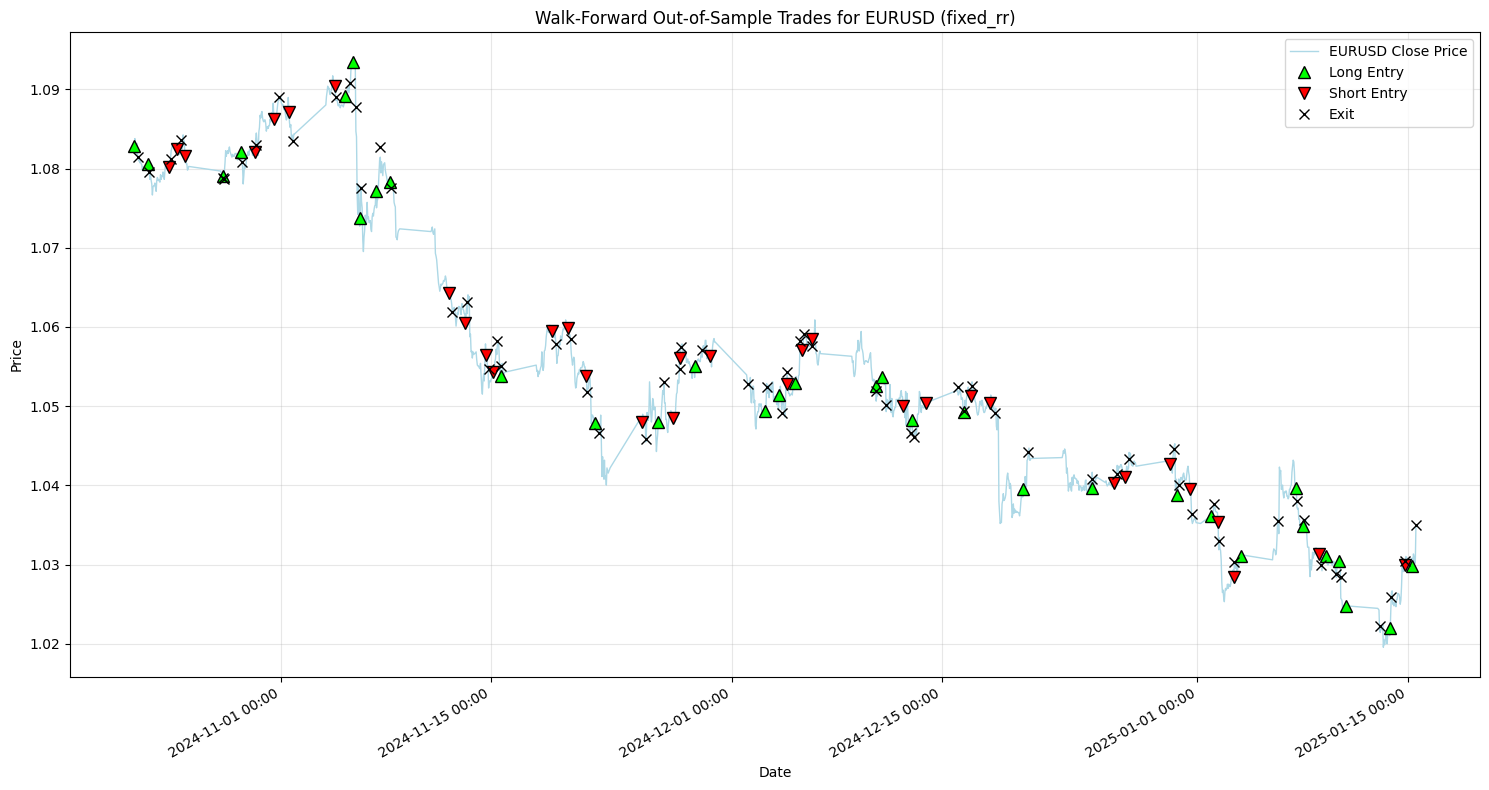

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Ensure necessary variables exist ---
if 'combined_oos_trades_df' in locals() and not combined_oos_trades_df.empty and \
   'data_to_use' in locals() and not data_to_use.empty and \
   'wf_pair_suffix' in locals():

    print("Plotting trades from walk-forward out-of-sample periods...")

    # Get the relevant price column from the data used in walk-forward
    price_col_name = f'close_{wf_pair_suffix}'
    if price_col_name not in data_to_use.columns:
        print(f"Error: Price column '{price_col_name}' not found in the data used for walk-forward.")
    else:
        # --- Create the Plot ---
        fig, ax = plt.subplots(figsize=(15, 8))

        # 1. Plot the price series for the entire period covered by trades
        plot_data = data_to_use.loc[combined_oos_trades_df['entry_time'].min():combined_oos_trades_df['exit_time'].max()]
        ax.plot(plot_data.index, plot_data[price_col_name], label=f'{wf_pair_suffix.upper()} Close Price', color='lightblue', linewidth=1)

        # 2. Plot Entry and Exit Markers
        # Long Entries
        long_entries = combined_oos_trades_df[combined_oos_trades_df['type'] == 'long']
        ax.plot(long_entries['entry_time'], long_entries['entry'], '^', markersize=8, color='lime', label='Long Entry', markeredgecolor='k')

        # Short Entries
        short_entries = combined_oos_trades_df[combined_oos_trades_df['type'] == 'short']
        ax.plot(short_entries['entry_time'], short_entries['entry'], 'v', markersize=8, color='red', label='Short Entry', markeredgecolor='k')

        # Exits (use entry price for plotting exit marker location for simplicity, or use exit price)
        # You could plot exits differently based on SL/TP/Time if desired using 'exit_reason'
        ax.plot(combined_oos_trades_df['exit_time'], combined_oos_trades_df['exit'], 'x', markersize=7, color='black', label='Exit')


        # --- Formatting ---
        ax.set_title(f'Walk-Forward Out-of-Sample Trades for {wf_pair_suffix.upper()} ({wf_exit_strategy})')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Improve date formatting
        fig.autofmt_xdate()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        # Optional: Adjust locator frequency if needed
        # ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

        plt.tight_layout()
        plt.show()

else:
    print("Could not plot trades. Ensure walk-forward analysis has run successfully and ")
    print("'combined_oos_trades_df', 'data_to_use', and 'wf_pair_suffix' variables exist.")

In [55]:
import optuna
import pandas as pd
import numpy as np

# Define the objective function for Optuna (Maximize Sharpe Ratio)
def objective_sharpe(trial, df_optimize): # Add df_optimize as an argument
    # --- Parameters to Optimize (Same as PnL objective) ---
    pair_to_optimize = 'eurusd'
    exit_strategy_to_optimize = 'fixed_rr'

    lookback_period = trial.suggest_int('lookback_period', 5, 20)
    cooldown_period = trial.suggest_int('cooldown_period_bars', 1, 10)

    use_atr = trial.suggest_categorical('use_atr_filter', [True, False])
    atr_p = trial.suggest_int('atr_period', 7, 21) if use_atr else 14
    atr_ma_p = trial.suggest_int('atr_ma_period', 10, 50) if use_atr else 20

    use_adx_trend = trial.suggest_categorical('use_adx_filter', [True, False])
    adx_p_trend = trial.suggest_int('adx_period_trend', 7, 21) if use_adx_trend else 14
    adx_thresh_trend = trial.suggest_int('adx_trend_threshold', 15, 35) if use_adx_trend else 25

    use_adx_whip = trial.suggest_categorical('use_adx_whipsaw_filter', [True, False])
    adx_p_whip = adx_p_trend
    adx_thresh_whip = trial.suggest_int('adx_whipsaw_threshold', 10, 25) if use_adx_whip else 20

    if exit_strategy_to_optimize == 'fixed_rr':
        use_adaptive = trial.suggest_categorical('use_adaptive_rr', [True, False])
        base_rr_val = trial.suggest_float('base_rr', 1.0, 4.0)
        atr_mult_rr = trial.suggest_float('atr_multiplier_rr', -0.5, 1.0) if use_adaptive else 0.5
        adaptive_rr_atr_p = 14
        adaptive_rr_atr_ma_p = 50
        rr_ratio_param = base_rr_val
        trailing_sl_param = None
        max_hold_param = None
    # ... (add elif for other strategies if needed, similar to PnL objective) ...
    else: # Default/fallback
        rr_ratio_param = 2.0
        trailing_sl_param = None
        max_hold_param = None
        use_adaptive = False
        base_rr_val = None
        atr_mult_rr = None

    # --- Run the Backtest (Same as PnL objective) ---
    results, _ = run_derivative_backtest_for_pair_with_cooldown(
        df_original=df_optimize,
        pair_suffix=pair_to_optimize,
        exit_strategy=exit_strategy_to_optimize,
        lookback_period=lookback_period,
        cooldown_period_bars=cooldown_period,
        use_atr_filter=use_atr,
        atr_period=atr_p,
        atr_ma_period=atr_ma_p,
        use_adx_filter=use_adx_trend,
        adx_period=adx_p_trend,
        adx_trend_threshold=adx_thresh_trend,
        use_adx_whipsaw_filter=use_adx_whip,
        adx_whipsaw_threshold=adx_thresh_whip,
        rr_ratio=rr_ratio_param,
        trailing_sl_distance=trailing_sl_param,
        max_hold_bars=max_hold_param,
        use_adaptive_rr=use_adaptive,
        base_rr=base_rr_val,
        atr_multiplier_rr=atr_mult_rr,
        adaptive_rr_atr_period=adaptive_rr_atr_p,
        adaptive_rr_atr_ma_period=adaptive_rr_atr_ma_p
    )

    # --- Return the Metric to Maximize (Sharpe Ratio) ---
    sharpe = results.get('sharpe_ratio', np.nan)

    # Penalize if Sharpe is NaN or invalid
    if not isinstance(sharpe, (int, float)) or pd.isna(sharpe):
        sharpe = -1e9 # Return a very small number

    # Also penalize for too few trades (as Sharpe can be misleading with few data points)
    num_trades = results.get('total_trades', 0)
    if not isinstance(num_trades, int) or num_trades < 5: # Minimum trades threshold
        return -1e9 # Return a very small number

    return sharpe

# --- Walk-Forward Analysis Cell (Optimizing for Sharpe Ratio) ---

# --- 1. Define Walk-Forward Parameters (Same as before) ---
data_to_use_sharpe = df_yf_adapted # Or df
optimize_duration_sharpe = pd.Timedelta(days=180)
test_duration_sharpe = pd.Timedelta(days=90)
step_duration_sharpe = pd.Timedelta(days=90)
wf_pair_suffix_sharpe = 'eurusd'
wf_exit_strategy_sharpe = 'fixed_rr'
n_optuna_trials_wf_sharpe = 100 # Trials per window

# --- 2. Walk-Forward Loop ---
all_oos_results_sharpe = []
all_oos_trades_sharpe = {}
start_date_sharpe = data_to_use_sharpe.index.min()
end_date_sharpe = data_to_use_sharpe.index.max()
current_optimize_start_sharpe = start_date_sharpe
wf_run_count_sharpe = 0

print("Starting Walk-Forward Analysis (Optimizing for Sharpe Ratio)...")
print(f"Optimize Duration: {optimize_duration_sharpe}")
print(f"Test Duration: {test_duration_sharpe}")
print(f"Step Duration: {step_duration_sharpe}")
print("-" * 30)

while current_optimize_start_sharpe + optimize_duration_sharpe + test_duration_sharpe <= end_date_sharpe:
    wf_run_count_sharpe += 1
    optimize_end_sharpe = current_optimize_start_sharpe + optimize_duration_sharpe
    test_start_sharpe = optimize_end_sharpe
    test_end_sharpe = test_start_sharpe + test_duration_sharpe

    print(f"\n===== Sharpe WF Run {wf_run_count_sharpe} =====")
    print(f"Optimize Period: {current_optimize_start_sharpe.date()} to {optimize_end_sharpe.date()}")
    print(f"Test Period    : {test_start_sharpe.date()} to {test_end_sharpe.date()}")

    # --- 3. Data Slicing ---
    df_optimize_sharpe = data_to_use_sharpe.loc[current_optimize_start_sharpe:optimize_end_sharpe].copy()
    df_test_sharpe = data_to_use_sharpe.loc[test_start_sharpe:test_end_sharpe].copy()

    if df_optimize_sharpe.empty or df_test_sharpe.empty:
        print("  Skipping run: Insufficient data.")
        current_optimize_start_sharpe += step_duration_sharpe
        continue

    # --- 4. Optimization (In-Sample using objective_sharpe) ---
    print(f"  Running Optuna ({n_optuna_trials_wf_sharpe} trials, maximizing Sharpe) on optimization data...")
    study_wf_sharpe = optuna.create_study(direction='maximize', study_name=f"wf_sharpe_run_{wf_run_count_sharpe}")
    try:
        # Use the new objective_sharpe function
        study_wf_sharpe.optimize(lambda trial: objective_sharpe(trial, df_optimize_sharpe), n_trials=n_optuna_trials_wf_sharpe, n_jobs=1)
        best_params_wf_sharpe = study_wf_sharpe.best_params
        print(f"  Optimization complete. Best Sharpe (in-sample): {study_wf_sharpe.best_value:.3f}")
        print(f"  Best parameters found: {best_params_wf_sharpe}")

        # --- 5. Testing (Out-of-Sample) ---
        print(f"  Running backtest on test data with best parameters...")
        backtest_params_sharpe = {
            'df_original': df_test_sharpe,
            'pair_suffix': wf_pair_suffix_sharpe,
            'exit_strategy': wf_exit_strategy_sharpe,
            **best_params_wf_sharpe
        }

        oos_results_sharpe, oos_trades_sharpe = run_derivative_backtest_for_pair_with_cooldown(**backtest_params_sharpe)

        # Add window info
        oos_results_sharpe['optimize_start'] = current_optimize_start_sharpe
        oos_results_sharpe['optimize_end'] = optimize_end_sharpe
        oos_results_sharpe['test_start'] = test_start_sharpe
        oos_results_sharpe['test_end'] = test_end_sharpe

        all_oos_results_sharpe.append(oos_results_sharpe)
        if not oos_trades_sharpe.empty:
             all_oos_trades_sharpe[f"run_{wf_run_count_sharpe}_{test_start_sharpe.date()}_{test_end_sharpe.date()}"] = oos_trades_sharpe

    except Exception as e:
        print(f"  Error during Optuna optimization or OOS backtest for Sharpe run {wf_run_count_sharpe}: {e}")

    # --- Slide Window ---
    current_optimize_start_sharpe += step_duration_sharpe

print("\n" + "=" * 30)
print("Sharpe Ratio Walk-Forward Analysis Complete.")
print("=" * 30 + "\n")

# --- 6. Aggregate and Display Results ---
if all_oos_results_sharpe:
    wf_results_df_sharpe = pd.DataFrame(all_oos_results_sharpe)

    print("===== Sharpe Walk-Forward OOS Results Summary =====")
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(wf_results_df_sharpe.to_string())

    print("\n===== Aggregated Sharpe OOS Performance =====")
    wf_results_df_sharpe['total_pnl_numeric'] = pd.to_numeric(wf_results_df_sharpe['total_pnl'], errors='coerce').fillna(0)
    wf_results_df_sharpe['total_trades_numeric'] = pd.to_numeric(wf_results_df_sharpe['total_trades'], errors='coerce').fillna(0)

    total_oos_pnl_sharpe = wf_results_df_sharpe['total_pnl_numeric'].sum()
    total_oos_trades_sharpe = wf_results_df_sharpe['total_trades_numeric'].sum()

    wf_results_df_sharpe['weighted_wins'] = pd.to_numeric(wf_results_df_sharpe['win_rate'], errors='coerce')/100 * wf_results_df_sharpe['total_trades_numeric']
    total_oos_wins_sharpe = wf_results_df_sharpe['weighted_wins'].sum()
    overall_weighted_win_rate_sharpe = (total_oos_wins_sharpe / total_oos_trades_sharpe * 100) if total_oos_trades_sharpe > 0 else 0

    # Calculate average OOS Sharpe (simple average, could also weight by trades or PnL std dev)
    avg_oos_sharpe = pd.to_numeric(wf_results_df_sharpe['sharpe_ratio'], errors='coerce').mean()

    print(f"Total Out-of-Sample PnL: {total_oos_pnl_sharpe:.5f}")
    print(f"Total Out-of-Sample Trades: {int(total_oos_trades_sharpe)}")
    print(f"Overall Weighted Out-of-Sample Win Rate: {overall_weighted_win_rate_sharpe:.2f}%")
    print(f"Average Out-of-Sample Sharpe Ratio: {avg_oos_sharpe:.3f}") # Display avg Sharpe

    if all_oos_trades_sharpe:
        combined_oos_trades_df_sharpe = pd.concat(all_oos_trades_sharpe.values(), ignore_index=True)
        print(f"\nCombined {len(combined_oos_trades_df_sharpe)} trades from all Sharpe OOS periods.")
    else:
        print("\nNo trades recorded across all Sharpe OOS periods.")

else:
    print("No Sharpe walk-forward runs were completed successfully.")

# Reset display options if desired
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')

[I 2025-04-22 01:15:02,522] A new study created in memory with name: wf_sharpe_run_1


Starting Walk-Forward Analysis (Optimizing for Sharpe Ratio)...
Optimize Duration: 180 days 00:00:00
Test Duration: 90 days 00:00:00
Step Duration: 90 days 00:00:00
------------------------------

===== Sharpe WF Run 1 =====
Optimize Period: 2024-04-21 to 2024-10-18
Test Period    : 2024-10-18 to 2025-01-16
  Running Optuna (100 trials, maximizing Sharpe) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 9) Filters: ATR>14MA, ADX>26, ADX>=22 ---


[I 2025-04-22 01:15:02,972] Trial 0 finished with value: -0.591492605606201 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 14, 'use_adx_filter': True, 'adx_period_trend': 14, 'adx_trend_threshold': 26, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 22, 'use_adaptive_rr': False, 'base_rr': 3.048499854637786}. Best is trial 0 with value: -0.591492605606201.


  Total Trades: 64
  Win Rate: 10.94% (7 wins)
  Total PnL (Points): -898.21129
  Sharpe Ratio: -0.591
  Sortino Ratio: -0.799

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 10) Filters: ATR>50MA, ADX>17 ---


[I 2025-04-22 01:15:03,413] Trial 1 finished with value: -0.22372138803529126 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 50, 'use_adx_filter': True, 'adx_period_trend': 11, 'adx_trend_threshold': 17, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1014172167745742, 'atr_multiplier_rr': 0.42788387209230594}. Best is trial 1 with value: -0.22372138803529126.


  Total Trades: 111
  Win Rate: 32.43% (36 wins)
  Total PnL (Points): -526.97569
  Sharpe Ratio: -0.224
  Sortino Ratio: -0.420

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 16) Filters: ATR>17MA, ADX>16, ADX>=12 ---


[I 2025-04-22 01:15:03,813] Trial 2 finished with value: -0.17166184548303917 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 17, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 16, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.4452848783628967}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 115
  Win Rate: 29.57% (34 wins)
  Total PnL (Points): -405.48235
  Sharpe Ratio: -0.172
  Sortino Ratio: -0.405

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 16) Filters: ADX>=23 ---


[I 2025-04-22 01:15:04,134] Trial 3 finished with value: -0.41889619173764175 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 23, 'use_adaptive_rr': False, 'base_rr': 3.4194056324412063}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 82
  Win Rate: 13.41% (11 wins)
  Total PnL (Points): -854.27400
  Sharpe Ratio: -0.419
  Sortino Ratio: -0.825

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 10) Filters: ATR>24MA, ADX>=10 ---


[I 2025-04-22 01:15:04,521] Trial 4 finished with value: -0.7217702296633671 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 24, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': True, 'base_rr': 3.489687915585903, 'atr_multiplier_rr': 0.21575279146446602}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 88
  Win Rate: 7.95% (7 wins)
  Total PnL (Points): -1068.95354
  Sharpe Ratio: -0.722
  Sortino Ratio: -1.174

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>23MA ---


[I 2025-04-22 01:15:04,877] Trial 5 finished with value: -0.5163956071586474 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 23, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.7139439483790966, 'atr_multiplier_rr': -0.11172323353765856}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 79
  Win Rate: 10.13% (8 wins)
  Total PnL (Points): -840.79054
  Sharpe Ratio: -0.516
  Sortino Ratio: -0.902

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 2 bars, Lookback: 9) Filters: ADX>15, ADX>=17 ---


[I 2025-04-22 01:15:05,233] Trial 6 finished with value: -0.2836309714840543 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 2, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 11, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 17, 'use_adaptive_rr': True, 'base_rr': 2.53179610546512, 'atr_multiplier_rr': 0.5139905905278397}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 202
  Win Rate: 17.82% (36 wins)
  Total PnL (Points): -888.96781
  Sharpe Ratio: -0.284
  Sortino Ratio: -0.622

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 17) Filters: ATR>34MA, ADX>30 ---


[I 2025-04-22 01:15:05,676] Trial 7 finished with value: -0.5344232675597658 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 34, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 30, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.624007950236544, 'atr_multiplier_rr': 0.3250362077644182}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 31
  Win Rate: 16.13% (5 wins)
  Total PnL (Points): -508.73232
  Sharpe Ratio: -0.534
  Sortino Ratio: -0.801

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 12) Filters: ADX>15 ---


[I 2025-04-22 01:15:06,036] Trial 8 finished with value: -0.22839670068471912 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 18, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1256199310909767, 'atr_multiplier_rr': -0.40191183344225423}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 166
  Win Rate: 35.54% (59 wins)
  Total PnL (Points): -584.60807
  Sharpe Ratio: -0.228
  Sortino Ratio: -0.414

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 5) Filters: ADX>27, ADX>=23 ---


[I 2025-04-22 01:15:06,393] Trial 9 finished with value: -0.20917904798911788 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 9, 'adx_trend_threshold': 27, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 23, 'use_adaptive_rr': False, 'base_rr': 1.7040337857941812}. Best is trial 2 with value: -0.17166184548303917.


  Total Trades: 166
  Win Rate: 24.10% (40 wins)
  Total PnL (Points): -559.43070
  Sharpe Ratio: -0.209
  Sortino Ratio: -0.415

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 20) Filters: ATR>12MA, ADX>=10 ---


[I 2025-04-22 01:15:06,817] Trial 10 finished with value: -0.11512202126756557 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.8948727727499652}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 99
  Win Rate: 28.28% (28 wins)
  Total PnL (Points): -292.16799
  Sharpe Ratio: -0.115
  Sortino Ratio: -0.309

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 20) Filters: ATR>11MA, ADX>=10 ---


[I 2025-04-22 01:15:07,194] Trial 11 finished with value: -0.23572141711222072 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 11, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.910891916424039}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 100
  Win Rate: 23.00% (23 wins)
  Total PnL (Points): -569.88374
  Sharpe Ratio: -0.236
  Sortino Ratio: -0.581

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 20) Filters: ATR>17MA, ADX>=14 ---


[I 2025-04-22 01:15:07,683] Trial 12 finished with value: -0.17700644103580365 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 17, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 1.8075470685460213}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 97
  Win Rate: 27.84% (27 wins)
  Total PnL (Points): -411.38674
  Sharpe Ratio: -0.177
  Sortino Ratio: -0.362

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 16) Filters: ATR>34MA, ADX>=14 ---


[I 2025-04-22 01:15:08,087] Trial 13 finished with value: -0.5453553973188651 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 34, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 2.318472393810165}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 76
  Win Rate: 13.16% (10 wins)
  Total PnL (Points): -986.62460
  Sharpe Ratio: -0.545
  Sortino Ratio: -0.841

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 18) Filters: ATR>10MA, ADX>21, ADX>=14 ---


[I 2025-04-22 01:15:08,556] Trial 14 finished with value: -0.33036208220381613 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 10, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 1.5008832914145807}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 139
  Win Rate: 23.74% (33 wins)
  Total PnL (Points): -989.83387
  Sharpe Ratio: -0.330
  Sortino Ratio: -0.533

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 14) Filters: ATR>20MA, ADX>=12 ---


[I 2025-04-22 01:15:08,979] Trial 15 finished with value: -0.4316513346622441 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 20, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 2.363382032730402}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 93
  Win Rate: 15.05% (14 wins)
  Total PnL (Points): -795.47341
  Sharpe Ratio: -0.432
  Sortino Ratio: -0.849

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 14) Filters: ATR>29MA, ADX>=18 ---


[I 2025-04-22 01:15:09,430] Trial 16 finished with value: -0.15044664817040865 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 29, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 18, 'use_adaptive_rr': False, 'base_rr': 1.4134692621411928}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 93
  Win Rate: 32.26% (30 wins)
  Total PnL (Points): -357.81271
  Sharpe Ratio: -0.150
  Sortino Ratio: -0.296

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 13) Filters: ATR>43MA, ADX>=19 ---


[I 2025-04-22 01:15:09,886] Trial 17 finished with value: -0.23683944916394162 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 43, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': False, 'base_rr': 2.1172850363855344}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 69
  Win Rate: 24.64% (17 wins)
  Total PnL (Points): -415.50294
  Sharpe Ratio: -0.237
  Sortino Ratio: -0.454

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 5) ---


[I 2025-04-22 01:15:10,239] Trial 18 finished with value: -0.46866471734437676 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 3.042081946956646}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 200
  Win Rate: 12.00% (24 wins)
  Total PnL (Points): -1132.40972
  Sharpe Ratio: -0.469
  Sortino Ratio: -0.970

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 18) Filters: ATR>28MA, ADX>=19 ---


[I 2025-04-22 01:15:10,715] Trial 19 finished with value: -0.5489813926312048 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 28, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': False, 'base_rr': 2.75525143776456}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 81
  Win Rate: 13.58% (11 wins)
  Total PnL (Points): -934.13978
  Sharpe Ratio: -0.549
  Sortino Ratio: -0.797

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 14) Filters: ATR>39MA, ADX>=17 ---


[I 2025-04-22 01:15:11,170] Trial 20 finished with value: -0.1970174706252339 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 39, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 17, 'use_adaptive_rr': False, 'base_rr': 1.4684577886505887}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 89
  Win Rate: 32.58% (29 wins)
  Total PnL (Points): -406.36851
  Sharpe Ratio: -0.197
  Sortino Ratio: -0.335

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 15) Filters: ATR>18MA, ADX>35, ADX>=12 ---


[I 2025-04-22 01:15:11,663] Trial 21 finished with value: -0.14495723024385596 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 18, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.4120168224496505}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 71
  Win Rate: 35.21% (25 wins)
  Total PnL (Points): -272.08226
  Sharpe Ratio: -0.145
  Sortino Ratio: -0.214

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 12) Filters: ATR>28MA, ADX>=12 ---


[I 2025-04-22 01:15:12,145] Trial 22 finished with value: -0.14745970284020563 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 28, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.2961236129817475}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 123
  Win Rate: 33.33% (41 wins)
  Total PnL (Points): -382.48095
  Sharpe Ratio: -0.147
  Sortino Ratio: -0.292

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 12) Filters: ATR>23MA, ADX>35, ADX>=12 ---


[I 2025-04-22 01:15:12,633] Trial 23 finished with value: -0.5709493020041786 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 23, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 2.0140173432836743}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 15
  Win Rate: 20.00% (3 wins)
  Total PnL (Points): -232.87567
  Sharpe Ratio: -0.571
  Sortino Ratio: -0.729

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 19) Filters: ATR>16MA, ADX>=10 ---


[I 2025-04-22 01:15:13,063] Trial 24 finished with value: -0.2343400107055425 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 16, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0455036334636318}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 130
  Win Rate: 36.92% (48 wins)
  Total PnL (Points): -557.23174
  Sharpe Ratio: -0.234
  Sortino Ratio: -0.415

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 7) Filters: ATR>13MA, ADX>=15 ---


[I 2025-04-22 01:15:13,489] Trial 25 finished with value: -0.17741262165926044 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 1.6494499322596878}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 127
  Win Rate: 31.50% (40 wins)
  Total PnL (Points): -431.33006
  Sharpe Ratio: -0.177
  Sortino Ratio: -0.410

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 15) Filters: ADX>35 ---


[I 2025-04-22 01:15:13,900] Trial 26 finished with value: -0.2337050212731628 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 2, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.2629265238273009}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 69
  Win Rate: 33.33% (23 wins)
  Total PnL (Points): -453.51108
  Sharpe Ratio: -0.234
  Sortino Ratio: -0.319

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 11) Filters: ATR>19MA, ADX>=12 ---


[I 2025-04-22 01:15:14,332] Trial 27 finished with value: -0.27855338522033374 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 19, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 2.135894303067884}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 95
  Win Rate: 23.16% (22 wins)
  Total PnL (Points): -572.18450
  Sharpe Ratio: -0.279
  Sortino Ratio: -0.600

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 18) Filters: ATR>26MA, ADX>31, ADX>=11 ---


[I 2025-04-22 01:15:14,834] Trial 28 finished with value: -0.32897205982063277 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 26, 'use_adx_filter': True, 'adx_period_trend': 10, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.6633886327395713}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 59
  Win Rate: 23.73% (14 wins)
  Total PnL (Points): -527.55782
  Sharpe Ratio: -0.329
  Sortino Ratio: -0.567

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 13) Filters: ATR>32MA, ADX>21, ADX>=15 ---


[I 2025-04-22 01:15:15,321] Trial 29 finished with value: -0.5460668590206923 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 32, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 21, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 3.9738365376898694}. Best is trial 10 with value: -0.11512202126756557.


  Total Trades: 66
  Win Rate: 7.58% (5 wins)
  Total PnL (Points): -720.09679
  Sharpe Ratio: -0.546
  Sortino Ratio: -0.974

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 7) Filters: ATR>20MA, ADX>=13 ---


[I 2025-04-22 01:15:15,792] Trial 30 finished with value: -0.08256585869701849 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 20, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.2809164580435488}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 139
  Win Rate: 35.25% (49 wins)
  Total PnL (Points): -229.08964
  Sharpe Ratio: -0.083
  Sortino Ratio: -0.174

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 7) Filters: ATR>19MA, ADX>=13 ---


[I 2025-04-22 01:15:16,242] Trial 31 finished with value: -0.09271331262040992 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 19, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.281583890839023}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 143
  Win Rate: 36.36% (52 wins)
  Total PnL (Points): -267.96142
  Sharpe Ratio: -0.093
  Sortino Ratio: -0.195

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 7) Filters: ATR>20MA, ADX>=13 ---


[I 2025-04-22 01:15:16,688] Trial 32 finished with value: -0.20343990489425906 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 20, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.2316587373662402}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 153
  Win Rate: 33.33% (51 wins)
  Total PnL (Points): -572.12846
  Sharpe Ratio: -0.203
  Sortino Ratio: -0.407

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 7) Filters: ATR>14MA, ADX>=16 ---


[I 2025-04-22 01:15:17,192] Trial 33 finished with value: -0.17601110390103142 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 14, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.835835380427337}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 121
  Win Rate: 28.93% (35 wins)
  Total PnL (Points): -427.08937
  Sharpe Ratio: -0.176
  Sortino Ratio: -0.424

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 6) Filters: ATR>21MA, ADX>=13 ---


[I 2025-04-22 01:15:17,625] Trial 34 finished with value: -0.191701443299053 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 21, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.5572597508391517}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 125
  Win Rate: 28.80% (36 wins)
  Total PnL (Points): -461.47713
  Sharpe Ratio: -0.192
  Sortino Ratio: -0.429

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 2 bars, Lookback: 8) Filters: ATR>12MA, ADX>=11 ---


[I 2025-04-22 01:15:18,095] Trial 35 finished with value: -0.2245311132843269 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 2, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.3341643589371763, 'atr_multiplier_rr': 0.9363036586598581}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 152
  Win Rate: 29.61% (45 wins)
  Total PnL (Points): -602.26244
  Sharpe Ratio: -0.225
  Sortino Ratio: -0.464

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 10) Filters: ATR>15MA, ADX>31 ---


[I 2025-04-22 01:15:18,564] Trial 36 finished with value: -0.1597963455220518 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 15, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.0568221379916571}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 40
  Win Rate: 37.50% (15 wins)
  Total PnL (Points): -208.55901
  Sharpe Ratio: -0.160
  Sortino Ratio: -0.221

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 3 bars, Lookback: 8) Filters: ADX>=21 ---


[I 2025-04-22 01:15:18,954] Trial 37 finished with value: -0.35413912956641297 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 3, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': True, 'base_rr': 1.1675371178871385, 'atr_multiplier_rr': 0.9314696819993818}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 165
  Win Rate: 30.91% (51 wins)
  Total PnL (Points): -686.01994
  Sharpe Ratio: -0.354
  Sortino Ratio: -0.662

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 11) Filters: ATR>17MA, ADX>22, ADX>=11 ---


[I 2025-04-22 01:15:19,446] Trial 38 finished with value: -0.1258540559059078 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 17, 'use_adx_filter': True, 'adx_period_trend': 20, 'adx_trend_threshold': 22, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0179653091847531}. Best is trial 30 with value: -0.08256585869701849.


  Total Trades: 65
  Win Rate: 40.00% (26 wins)
  Total PnL (Points): -197.56221
  Sharpe Ratio: -0.126
  Sortino Ratio: -0.242

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>10MA ---


[I 2025-04-22 01:15:19,847] Trial 39 finished with value: -0.05066394491613744 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0174544204833424, 'atr_multiplier_rr': -0.3471758481507059}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 131
  Win Rate: 43.51% (57 wins)
  Total PnL (Points): -114.83141
  Sharpe Ratio: -0.051
  Sortino Ratio: -0.101

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 9) ---


[I 2025-04-22 01:15:20,200] Trial 40 finished with value: -0.1581924447788926 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5904167894551935, 'atr_multiplier_rr': -0.4675430341768546}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 164
  Win Rate: 30.49% (50 wins)
  Total PnL (Points): -427.43911
  Sharpe Ratio: -0.158
  Sortino Ratio: -0.385

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 11) Filters: ATR>10MA ---


[I 2025-04-22 01:15:20,607] Trial 41 finished with value: -0.06705666674110693 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.004241360337486, 'atr_multiplier_rr': -0.09722837225333414}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 141
  Win Rate: 43.26% (61 wins)
  Total PnL (Points): -162.16268
  Sharpe Ratio: -0.067
  Sortino Ratio: -0.145

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>10MA ---


[I 2025-04-22 01:15:21,018] Trial 42 finished with value: -0.11991840022141322 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1857141309231727, 'atr_multiplier_rr': -0.09764538414963009}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 124
  Win Rate: 38.71% (48 wins)
  Total PnL (Points): -257.14968
  Sharpe Ratio: -0.120
  Sortino Ratio: -0.242

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 8) Filters: ATR>13MA ---


[I 2025-04-22 01:15:21,445] Trial 43 finished with value: -0.12899670669788765 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0106639206787036, 'atr_multiplier_rr': -0.13807440096415746}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 135
  Win Rate: 42.22% (57 wins)
  Total PnL (Points): -343.71336
  Sharpe Ratio: -0.129
  Sortino Ratio: -0.255

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 6) Filters: ATR>14MA ---


[I 2025-04-22 01:15:21,890] Trial 44 finished with value: -0.15921270956820122 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 14, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.3216524514943304, 'atr_multiplier_rr': 0.07258562379366729}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 117
  Win Rate: 36.75% (43 wins)
  Total PnL (Points): -352.69652
  Sharpe Ratio: -0.159
  Sortino Ratio: -0.337

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 11) Filters: ATR>10MA ---


[I 2025-04-22 01:15:22,314] Trial 45 finished with value: -0.2529373284015299 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.781950973969703, 'atr_multiplier_rr': -0.28425886305199755}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 124
  Win Rate: 24.19% (30 wins)
  Total PnL (Points): -572.02577
  Sharpe Ratio: -0.253
  Sortino Ratio: -0.637

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 9) Filters: ATR>12MA ---


[I 2025-04-22 01:15:22,726] Trial 46 finished with value: -0.16903770543952343 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1666656519331717, 'atr_multiplier_rr': 0.06879830421752145}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 129
  Win Rate: 36.43% (47 wins)
  Total PnL (Points): -380.47735
  Sharpe Ratio: -0.169
  Sortino Ratio: -0.369

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 6) Filters: ATR>15MA ---


[I 2025-04-22 01:15:23,070] Trial 47 finished with value: -0.13361594730339438 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.4219443998647616, 'atr_multiplier_rr': -0.27850508187663503}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 115
  Win Rate: 35.65% (41 wins)
  Total PnL (Points): -287.31240
  Sharpe Ratio: -0.134
  Sortino Ratio: -0.292

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 8) ---


[I 2025-04-22 01:15:23,430] Trial 48 finished with value: -0.24207426304094692 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1395932592361349, 'atr_multiplier_rr': 0.08074689917840877}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 201
  Win Rate: 36.82% (74 wins)
  Total PnL (Points): -692.25933
  Sharpe Ratio: -0.242
  Sortino Ratio: -0.459

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 10) Filters: ATR>22MA ---


[I 2025-04-22 01:15:24,020] Trial 49 finished with value: -0.40066105877849406 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 22, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.7903341499408754, 'atr_multiplier_rr': 0.6467476652047677}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 96
  Win Rate: 15.62% (15 wins)
  Total PnL (Points): -772.58572
  Sharpe Ratio: -0.401
  Sortino Ratio: -0.842

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 9) Filters: ATR>10MA ---


[I 2025-04-22 01:15:24,585] Trial 50 finished with value: -0.24095379385723276 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.8922483660661833, 'atr_multiplier_rr': -0.2858232214454385}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 109
  Win Rate: 25.69% (28 wins)
  Total PnL (Points): -491.33527
  Sharpe Ratio: -0.241
  Sortino Ratio: -0.522

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 10) Filters: ATR>10MA ---


[I 2025-04-22 01:15:25,124] Trial 51 finished with value: -0.10329510108601454 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2159490323472386, 'atr_multiplier_rr': -0.14925203846491575}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 135
  Win Rate: 38.52% (52 wins)
  Total PnL (Points): -247.56043
  Sharpe Ratio: -0.103
  Sortino Ratio: -0.239

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 11) Filters: ATR>12MA ---


[I 2025-04-22 01:15:25,685] Trial 52 finished with value: -0.1831130014167036 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.342045705613884, 'atr_multiplier_rr': -0.09056187943242627}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 119
  Win Rate: 31.93% (38 wins)
  Total PnL (Points): -462.50100
  Sharpe Ratio: -0.183
  Sortino Ratio: -0.418

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 5) Filters: ATR>25MA ---


[I 2025-04-22 01:15:26,216] Trial 53 finished with value: -0.27148254182410575 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 25, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.553574730681944, 'atr_multiplier_rr': -0.37066098978061535}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 124
  Win Rate: 26.61% (33 wins)
  Total PnL (Points): -614.12417
  Sharpe Ratio: -0.271
  Sortino Ratio: -0.516

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 13) Filters: ATR>16MA ---


[I 2025-04-22 01:15:26,834] Trial 54 finished with value: -0.12038296743713764 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 16, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1130501016948637, 'atr_multiplier_rr': -0.17125143390667213}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 128
  Win Rate: 38.28% (49 wins)
  Total PnL (Points): -306.52160
  Sharpe Ratio: -0.120
  Sortino Ratio: -0.259

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>12MA ---


[I 2025-04-22 01:15:27,422] Trial 55 finished with value: -0.23566005988506047 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.74215586232873, 'atr_multiplier_rr': 0.006866166727550915}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 105
  Win Rate: 26.67% (28 wins)
  Total PnL (Points): -480.64562
  Sharpe Ratio: -0.236
  Sortino Ratio: -0.509

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 4 bars, Lookback: 12) Filters: ATR>18MA ---


[I 2025-04-22 01:15:28,028] Trial 56 finished with value: -0.2763604039836007 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 18, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.453638140441591, 'atr_multiplier_rr': 0.20761563342685252}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 112
  Win Rate: 27.68% (31 wins)
  Total PnL (Points): -595.11248
  Sharpe Ratio: -0.276
  Sortino Ratio: -0.529

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 9) Filters: ATR>10MA ---


[I 2025-04-22 01:15:28,580] Trial 57 finished with value: -0.2604522105826262 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.304990156648295, 'atr_multiplier_rr': -0.4820019504491959}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 109
  Win Rate: 22.02% (24 wins)
  Total PnL (Points): -647.62397
  Sharpe Ratio: -0.260
  Sortino Ratio: -0.612

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 7) Filters: ATR>14MA, ADX>=25 ---


[I 2025-04-22 01:15:29,258] Trial 58 finished with value: -0.36863146825073095 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 14, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': True, 'base_rr': 1.2426766578441952, 'atr_multiplier_rr': -0.23275155688914473}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 65
  Win Rate: 30.77% (20 wins)
  Total PnL (Points): -541.12784
  Sharpe Ratio: -0.369
  Sortino Ratio: -0.610

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 7 bars, Lookback: 11) ---


[I 2025-04-22 01:15:29,726] Trial 59 finished with value: -0.2709580252666594 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.3540033279812307}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 171
  Win Rate: 30.41% (52 wins)
  Total PnL (Points): -755.44147
  Sharpe Ratio: -0.271
  Sortino Ratio: -0.553

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 17) Filters: ATR>45MA, ADX>=15 ---


[I 2025-04-22 01:15:30,322] Trial 60 finished with value: -0.41420415170845076 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 5, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 45, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 1.9736695575864207}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 77
  Win Rate: 22.08% (17 wins)
  Total PnL (Points): -675.35345
  Sharpe Ratio: -0.414
  Sortino Ratio: -0.717

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>10MA ---


[I 2025-04-22 01:15:30,880] Trial 61 finished with value: -0.1132682802974939 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2045234135431133, 'atr_multiplier_rr': -0.032256857192910465}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 124
  Win Rate: 38.71% (48 wins)
  Total PnL (Points): -244.76207
  Sharpe Ratio: -0.113
  Sortino Ratio: -0.230

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>11MA ---


[I 2025-04-22 01:15:31,440] Trial 62 finished with value: -0.09852496276048327 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 11, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1066510296768413, 'atr_multiplier_rr': -0.03500977816871163}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 122
  Win Rate: 39.34% (48 wins)
  Total PnL (Points): -211.61339
  Sharpe Ratio: -0.099
  Sortino Ratio: -0.201

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>11MA ---


[I 2025-04-22 01:15:32,048] Trial 63 finished with value: -0.11617354197874691 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 11, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.114118236580134, 'atr_multiplier_rr': -0.019754781599087112}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 122
  Win Rate: 38.52% (47 wins)
  Total PnL (Points): -249.51210
  Sharpe Ratio: -0.116
  Sortino Ratio: -0.238

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 8) Filters: ATR>13MA ---


[I 2025-04-22 01:15:32,741] Trial 64 finished with value: -0.134030271538412 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0230013550626917, 'atr_multiplier_rr': -0.03385331751229187}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 125
  Win Rate: 40.80% (51 wins)
  Total PnL (Points): -303.47750
  Sharpe Ratio: -0.134
  Sortino Ratio: -0.266

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 10) Filters: ATR>16MA ---


[I 2025-04-22 01:15:33,390] Trial 65 finished with value: -0.12522796655360774 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 16, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2560242778533708, 'atr_multiplier_rr': -0.2056568097952613}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 123
  Win Rate: 36.59% (45 wins)
  Total PnL (Points): -321.76677
  Sharpe Ratio: -0.125
  Sortino Ratio: -0.255

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 12) Filters: ATR>12MA ---


[I 2025-04-22 01:15:34,094] Trial 66 finished with value: -0.17421066164324167 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 8, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.1513586277937753, 'atr_multiplier_rr': 0.17214770581540567}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 87
  Win Rate: 17.24% (15 wins)
  Total PnL (Points): -389.57309
  Sharpe Ratio: -0.174
  Sortino Ratio: -0.556

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 11) Filters: ATR>10MA ---


[I 2025-04-22 01:15:34,804] Trial 67 finished with value: -0.16275258489669867 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.510649783214035, 'atr_multiplier_rr': -0.35879414370574264}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 115
  Win Rate: 30.43% (35 wins)
  Total PnL (Points): -367.36952
  Sharpe Ratio: -0.163
  Sortino Ratio: -0.353

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 10) Filters: ATR>15MA ---


[I 2025-04-22 01:15:35,488] Trial 68 finished with value: -0.07596021369556478 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2472713326549356, 'atr_multiplier_rr': 0.32654346935758594}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 109
  Win Rate: 39.45% (43 wins)
  Total PnL (Points): -171.07351
  Sharpe Ratio: -0.076
  Sortino Ratio: -0.156

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 7) Filters: ATR>18MA ---


[I 2025-04-22 01:15:36,157] Trial 69 finished with value: -0.20370550079917704 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 18, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0004184685983262, 'atr_multiplier_rr': 0.4470926680112557}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 137
  Win Rate: 37.96% (52 wins)
  Total PnL (Points): -532.42050
  Sharpe Ratio: -0.204
  Sortino Ratio: -0.387

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:36,809] Trial 70 finished with value: -0.08724487294795413 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.42633727293277, 'atr_multiplier_rr': 0.339472769529804}. Best is trial 39 with value: -0.05066394491613744.


  Total Trades: 106
  Win Rate: 34.91% (37 wins)
  Total PnL (Points): -193.01782
  Sharpe Ratio: -0.087
  Sortino Ratio: -0.197

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:37,587] Trial 71 finished with value: -0.04302476551066759 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.3741210886010877, 'atr_multiplier_rr': 0.31059943185196504}. Best is trial 71 with value: -0.04302476551066759.


  Total Trades: 103
  Win Rate: 38.83% (40 wins)
  Total PnL (Points): -88.78718
  Sharpe Ratio: -0.043
  Sortino Ratio: -0.111

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>19MA ---


[I 2025-04-22 01:15:38,235] Trial 72 finished with value: -0.32669841724603527 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 19, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.3726137499863058, 'atr_multiplier_rr': 0.31951233788313893}. Best is trial 71 with value: -0.04302476551066759.


  Total Trades: 95
  Win Rate: 27.37% (26 wins)
  Total PnL (Points): -603.29524
  Sharpe Ratio: -0.327
  Sortino Ratio: -0.655

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:38,892] Trial 73 finished with value: 0.007134382799992968 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6311502122229449, 'atr_multiplier_rr': 0.3549068928286429}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 99
  Win Rate: 37.37% (37 wins)
  Total PnL (Points): 15.40513
  Sharpe Ratio: 0.007
  Sortino Ratio: 0.019

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) Filters: ATR>15MA ---


[I 2025-04-22 01:15:39,549] Trial 74 finished with value: -0.059355443242194134 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6260444030961545, 'atr_multiplier_rr': 0.5213462140553667}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 98
  Win Rate: 33.67% (33 wins)
  Total PnL (Points): -127.70027
  Sharpe Ratio: -0.059
  Sortino Ratio: -0.153

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:40,216] Trial 75 finished with value: -0.06688685328736065 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6638022148993217, 'atr_multiplier_rr': 0.641752766750443}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 96
  Win Rate: 32.29% (31 wins)
  Total PnL (Points): -144.82233
  Sharpe Ratio: -0.067
  Sortino Ratio: -0.176

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) ---


[I 2025-04-22 01:15:40,860] Trial 76 finished with value: -0.10992140468061906 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.7172634304320953, 'atr_multiplier_rr': 0.6485153109316641}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 156
  Win Rate: 34.62% (54 wins)
  Total PnL (Points): -291.06537
  Sharpe Ratio: -0.110
  Sortino Ratio: -0.213

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) Filters: ATR>17MA ---


[I 2025-04-22 01:15:41,505] Trial 77 finished with value: -0.2816664111402825 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 17, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.5825803516235708, 'atr_multiplier_rr': 0.566490477769662}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 91
  Win Rate: 26.37% (24 wins)
  Total PnL (Points): -526.50947
  Sharpe Ratio: -0.282
  Sortino Ratio: -0.598

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:42,156] Trial 78 finished with value: -0.06323097520397596 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.639763476106729, 'atr_multiplier_rr': 0.4176750923885772}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 94
  Win Rate: 32.98% (31 wins)
  Total PnL (Points): -133.83888
  Sharpe Ratio: -0.063
  Sortino Ratio: -0.163

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>14MA, ADX>24 ---


[I 2025-04-22 01:15:42,929] Trial 79 finished with value: -0.4690702864740123 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 14, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 24, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6533747092267863, 'atr_multiplier_rr': 0.4316979721854406}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 41
  Win Rate: 21.95% (9 wins)
  Total PnL (Points): -516.51700
  Sharpe Ratio: -0.469
  Sortino Ratio: -0.621

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 11) Filters: ATR>37MA ---


[I 2025-04-22 01:15:43,613] Trial 80 finished with value: -0.1308919643538996 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 37, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.080106931839745, 'atr_multiplier_rr': 0.5254061512162093}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 85
  Win Rate: 27.06% (23 wins)
  Total PnL (Points): -287.23998
  Sharpe Ratio: -0.131
  Sortino Ratio: -0.279

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>16MA ---


[I 2025-04-22 01:15:44,356] Trial 81 finished with value: -0.12634142676394128 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 16, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.4991824595898668, 'atr_multiplier_rr': 0.28935945510806155}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 92
  Win Rate: 33.70% (31 wins)
  Total PnL (Points): -244.25110
  Sharpe Ratio: -0.126
  Sortino Ratio: -0.268

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) Filters: ATR>20MA ---


[I 2025-04-22 01:15:45,056] Trial 82 finished with value: -0.4899534981527332 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 20, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.6021735224188838, 'atr_multiplier_rr': 0.7558175165088623}. Best is trial 73 with value: 0.007134382799992968.


  Total Trades: 90
  Win Rate: 18.89% (17 wins)
  Total PnL (Points): -859.92948
  Sharpe Ratio: -0.490
  Sortino Ratio: -0.836

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:45,755] Trial 83 finished with value: 0.008666070611514873 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.871350421264994, 'atr_multiplier_rr': 0.3918218202768703}. Best is trial 83 with value: 0.008666070611514873.


  Total Trades: 97
  Win Rate: 32.99% (32 wins)
  Total PnL (Points): 19.86871
  Sharpe Ratio: 0.009
  Sortino Ratio: 0.027

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:46,447] Trial 84 finished with value: 0.01512779469320948 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.9024892537984972, 'atr_multiplier_rr': 0.3703667049953816}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 97
  Win Rate: 32.99% (32 wins)
  Total PnL (Points): 35.07309
  Sharpe Ratio: 0.015
  Sortino Ratio: 0.047

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>17MA ---


[I 2025-04-22 01:15:47,134] Trial 85 finished with value: -0.09096030772974716 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 17, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.8438134190668138, 'atr_multiplier_rr': 0.3966405044398058}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 93
  Win Rate: 31.18% (29 wins)
  Total PnL (Points): -190.39187
  Sharpe Ratio: -0.091
  Sortino Ratio: -0.214

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 8) Filters: ATR>13MA ---


[I 2025-04-22 01:15:47,970] Trial 86 finished with value: -0.09187960389618643 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.2379019597436756, 'atr_multiplier_rr': 0.38898149435458496}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 94
  Win Rate: 27.66% (26 wins)
  Total PnL (Points): -198.07052
  Sharpe Ratio: -0.092
  Sortino Ratio: -0.277

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>14MA ---


[I 2025-04-22 01:15:48,631] Trial 87 finished with value: 0.00819659632414484 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 14, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.9428479952898545, 'atr_multiplier_rr': 0.4954633828221108}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 97
  Win Rate: 34.02% (33 wins)
  Total PnL (Points): 19.31274
  Sharpe Ratio: 0.008
  Sortino Ratio: 0.025

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:49,262] Trial 88 finished with value: -0.020230338757622278 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.016484837724571, 'atr_multiplier_rr': 0.48042250618494287}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 95
  Win Rate: 30.53% (29 wins)
  Total PnL (Points): -48.53825
  Sharpe Ratio: -0.020
  Sortino Ratio: -0.060

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) Filters: ADX>19 ---


[I 2025-04-22 01:15:49,857] Trial 89 finished with value: -0.3037269528957915 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 16, 'adx_trend_threshold': 19, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.976915697234475, 'atr_multiplier_rr': 0.4803741586426854}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 111
  Win Rate: 24.32% (27 wins)
  Total PnL (Points): -554.47559
  Sharpe Ratio: -0.304
  Sortino Ratio: -0.554

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>18MA ---


[I 2025-04-22 01:15:50,484] Trial 90 finished with value: -0.15022511815062592 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 18, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.169914474203079, 'atr_multiplier_rr': 0.5608383986312769}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 93
  Win Rate: 26.88% (25 wins)
  Total PnL (Points): -331.47847
  Sharpe Ratio: -0.150
  Sortino Ratio: -0.369

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:51,188] Trial 91 finished with value: -0.027970549354896367 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.8960076510995025, 'atr_multiplier_rr': 0.6168147322054813}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 96
  Win Rate: 31.25% (30 wins)
  Total PnL (Points): -65.61644
  Sharpe Ratio: -0.028
  Sortino Ratio: -0.080

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>13MA ---


[I 2025-04-22 01:15:51,830] Trial 92 finished with value: -0.019053892473225743 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 14, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.940918363823519, 'atr_multiplier_rr': 0.24133157218848916}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 94
  Win Rate: 31.91% (30 wins)
  Total PnL (Points): -40.95214
  Sharpe Ratio: -0.019
  Sortino Ratio: -0.059

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 8) Filters: ATR>13MA ---


[I 2025-04-22 01:15:52,503] Trial 93 finished with value: -0.011559274765078674 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.025884472295579, 'atr_multiplier_rr': 0.2633908011229146}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 93
  Win Rate: 32.26% (30 wins)
  Total PnL (Points): -23.55070
  Sharpe Ratio: -0.012
  Sortino Ratio: -0.036

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 7) Filters: ATR>13MA ---


[I 2025-04-22 01:15:53,149] Trial 94 finished with value: -0.12703732857369787 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.482567965231822, 'atr_multiplier_rr': 0.2676635839682269}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 97
  Win Rate: 26.80% (26 wins)
  Total PnL (Points): -283.45087
  Sharpe Ratio: -0.127
  Sortino Ratio: -0.360

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ATR>14MA ---


[I 2025-04-22 01:15:53,811] Trial 95 finished with value: -0.05813881365406022 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 14, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.0903316251156827, 'atr_multiplier_rr': 0.20283929997528144}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 94
  Win Rate: 30.85% (29 wins)
  Total PnL (Points): -124.13749
  Sharpe Ratio: -0.058
  Sortino Ratio: -0.170

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 8) Filters: ATR>50MA ---


[I 2025-04-22 01:15:54,620] Trial 96 finished with value: -0.3090598767467099 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 50, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.9051470974607945, 'atr_multiplier_rr': 0.13883954819524308}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 90
  Win Rate: 24.44% (22 wins)
  Total PnL (Points): -629.42280
  Sharpe Ratio: -0.309
  Sortino Ratio: -0.567

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 10) Filters: ATR>12MA ---


[I 2025-04-22 01:15:55,273] Trial 97 finished with value: -0.06943639529331902 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.7649791219326405, 'atr_multiplier_rr': 0.37280329701252957}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 96
  Win Rate: 32.29% (31 wins)
  Total PnL (Points): -141.71239
  Sharpe Ratio: -0.069
  Sortino Ratio: -0.197

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>17MA ---


[I 2025-04-22 01:15:55,917] Trial 98 finished with value: -0.05295600513302166 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 11, 'atr_ma_period': 17, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.0429220633894287, 'atr_multiplier_rr': 0.7786863321783586}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 91
  Win Rate: 30.77% (28 wins)
  Total PnL (Points): -113.34552
  Sharpe Ratio: -0.053
  Sortino Ratio: -0.146

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 7) Filters: ATR>13MA ---


[I 2025-04-22 01:15:56,579] Trial 99 finished with value: -0.05234980926524279 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 13, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.1852848644971985, 'atr_multiplier_rr': 0.25783658197846676}. Best is trial 84 with value: 0.01512779469320948.


  Total Trades: 96
  Win Rate: 31.25% (30 wins)
  Total PnL (Points): -113.18916
  Sharpe Ratio: -0.052
  Sortino Ratio: -0.145
  Optimization complete. Best Sharpe (in-sample): 0.015
  Best parameters found: {'lookback_period': 9, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.9024892537984972, 'atr_multiplier_rr': 0.3703667049953816}
  Running backtest on test data with best parameters...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 9) Filters: ATR>15MA ---


[I 2025-04-22 01:15:56,895] A new study created in memory with name: wf_sharpe_run_2


  Total Trades: 43
  Win Rate: 30.23% (13 wins)
  Total PnL (Points): -175.47827
  Sharpe Ratio: -0.130
  Sortino Ratio: -0.268

===== Sharpe WF Run 2 =====
Optimize Period: 2024-07-20 to 2025-01-16
Test Period    : 2025-01-16 to 2025-04-16
  Running Optuna (100 trials, maximizing Sharpe) on optimization data...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 12) Filters: ATR>49MA, ADX>28 ---


[I 2025-04-22 01:15:57,687] Trial 0 finished with value: -0.27233125254292473 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 49, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 3.45671178887868}. Best is trial 0 with value: -0.27233125254292473.


  Total Trades: 47
  Win Rate: 14.89% (7 wins)
  Total PnL (Points): -454.93372
  Sharpe Ratio: -0.272
  Sortino Ratio: -0.682

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 16) Filters: ADX>35, ADX>=16 ---


[I 2025-04-22 01:15:58,215] Trial 1 finished with value: -0.12171387095998346 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 8, 'adx_trend_threshold': 35, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.3989175841847963}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 71
  Win Rate: 33.80% (24 wins)
  Total PnL (Points): -247.52630
  Sharpe Ratio: -0.122
  Sortino Ratio: -0.196

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 4 bars, Lookback: 6) Filters: ATR>25MA, ADX>25 ---


[I 2025-04-22 01:15:58,876] Trial 2 finished with value: -0.3393353182840647 and parameters: {'lookback_period': 6, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 25, 'use_adx_filter': True, 'adx_period_trend': 18, 'adx_trend_threshold': 25, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.2359654231784516, 'atr_multiplier_rr': -0.2596432176833515}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 52
  Win Rate: 11.54% (6 wins)
  Total PnL (Points): -561.14358
  Sharpe Ratio: -0.339
  Sortino Ratio: -0.585

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 10) Filters: ADX>22, ADX>=13 ---


[I 2025-04-22 01:15:59,469] Trial 3 finished with value: -0.27346529955590143 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 2, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 22, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 3.203924216642182}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 120
  Win Rate: 15.00% (18 wins)
  Total PnL (Points): -691.12473
  Sharpe Ratio: -0.273
  Sortino Ratio: -0.604

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 15) Filters: ATR>39MA ---


[I 2025-04-22 01:16:00,067] Trial 4 finished with value: -0.28948954202943167 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 9, 'atr_ma_period': 39, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 3.080268351548964}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 93
  Win Rate: 16.13% (15 wins)
  Total PnL (Points): -834.63580
  Sharpe Ratio: -0.289
  Sortino Ratio: -0.586

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 1 bars, Lookback: 9) Filters: ATR>35MA, ADX>28, ADX>=16 ---


[I 2025-04-22 01:16:00,855] Trial 5 finished with value: -0.2934400505105206 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 1, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 35, 'use_adx_filter': True, 'adx_period_trend': 12, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': True, 'base_rr': 2.802079295113547, 'atr_multiplier_rr': 0.7903388683558088}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 69
  Win Rate: 17.39% (12 wins)
  Total PnL (Points): -538.62010
  Sharpe Ratio: -0.293
  Sortino Ratio: -0.667

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 3 bars, Lookback: 12) Filters: ATR>32MA, ADX>18, ADX>=24 ---


[I 2025-04-22 01:16:01,510] Trial 6 finished with value: -0.17738310362760196 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 3, 'use_atr_filter': True, 'atr_period': 10, 'atr_ma_period': 32, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 18, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 24, 'use_adaptive_rr': False, 'base_rr': 1.4530914775233672}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 68
  Win Rate: 32.35% (22 wins)
  Total PnL (Points): -302.73874
  Sharpe Ratio: -0.177
  Sortino Ratio: -0.358

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 1 bars, Lookback: 16) Filters: ADX>28, ADX>=22 ---


[I 2025-04-22 01:16:02,135] Trial 7 finished with value: -0.2664622265272634 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 1, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 13, 'adx_trend_threshold': 28, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 22, 'use_adaptive_rr': True, 'base_rr': 1.9482238340184204, 'atr_multiplier_rr': 0.5886762032260902}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 107
  Win Rate: 23.36% (25 wins)
  Total PnL (Points): -666.35022
  Sharpe Ratio: -0.266
  Sortino Ratio: -0.492

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 9) ---


[I 2025-04-22 01:16:02,743] Trial 8 finished with value: -0.22290146810872027 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.0009439090754864, 'atr_multiplier_rr': 0.4060338662363159}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 165
  Win Rate: 26.06% (43 wins)
  Total PnL (Points): -783.85017
  Sharpe Ratio: -0.223
  Sortino Ratio: -0.436

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 1 bars, Lookback: 16) ---


[I 2025-04-22 01:16:03,309] Trial 9 finished with value: -0.3857436516929429 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 1, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.715359829698552}. Best is trial 1 with value: -0.12171387095998346.


  Total Trades: 187
  Win Rate: 14.44% (27 wins)
  Total PnL (Points): -1323.27208
  Sharpe Ratio: -0.386
  Sortino Ratio: -0.838

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=11 ---


[I 2025-04-22 01:16:03,956] Trial 10 finished with value: 0.043253959235313465 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0729612998034668}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 122
  Win Rate: 45.90% (56 wins)
  Total PnL (Points): 120.28522
  Sharpe Ratio: 0.043
  Sortino Ratio: 0.094

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:04,566] Trial 11 finished with value: -0.057628528494038475 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.1597560788390977}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 120
  Win Rate: 40.83% (49 wins)
  Total PnL (Points): -162.46663
  Sharpe Ratio: -0.058
  Sortino Ratio: -0.113

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:05,139] Trial 12 finished with value: -0.06994397615001757 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.1708758579227918}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 118
  Win Rate: 39.83% (47 wins)
  Total PnL (Points): -194.88075
  Sharpe Ratio: -0.070
  Sortino Ratio: -0.138

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:05,721] Trial 13 finished with value: -0.5769923589882395 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 3.9761069173612302}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 93
  Win Rate: 8.60% (8 wins)
  Total PnL (Points): -1230.18024
  Sharpe Ratio: -0.577
  Sortino Ratio: -0.958

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) Filters: ADX>=13 ---


[I 2025-04-22 01:16:06,308] Trial 14 finished with value: 0.039889282005557414 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.0237968594088505}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 126
  Win Rate: 48.41% (61 wins)
  Total PnL (Points): 114.95082
  Sharpe Ratio: 0.040
  Sortino Ratio: 0.074

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 18) Filters: ADX>=14 ---


[I 2025-04-22 01:16:07,117] Trial 15 finished with value: -0.3482650137287975 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 1.9109781917617306}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 115
  Win Rate: 22.61% (26 wins)
  Total PnL (Points): -1004.06028
  Sharpe Ratio: -0.348
  Sortino Ratio: -0.605

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 18) Filters: ADX>=20 ---


[I 2025-04-22 01:16:07,835] Trial 16 finished with value: -0.10450010985225072 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 20, 'use_adaptive_rr': False, 'base_rr': 1.6346636921280615}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 91
  Win Rate: 39.56% (36 wins)
  Total PnL (Points): -241.07274
  Sharpe Ratio: -0.105
  Sortino Ratio: -0.180

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 5 bars, Lookback: 18) Filters: ADX>=13 ---


[I 2025-04-22 01:16:08,481] Trial 17 finished with value: -0.46410475302327436 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 2.342173296066031}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 135
  Win Rate: 14.81% (20 wins)
  Total PnL (Points): -1327.45989
  Sharpe Ratio: -0.464
  Sortino Ratio: -0.803

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 14) Filters: ADX>=13 ---


[I 2025-04-22 01:16:09,129] Trial 18 finished with value: -0.013795985848566417 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': True, 'base_rr': 1.0173348644522264, 'atr_multiplier_rr': -0.4989093264403992}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 166
  Win Rate: 45.18% (75 wins)
  Total PnL (Points): -52.03241
  Sharpe Ratio: -0.014
  Sortino Ratio: -0.028

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) Filters: ADX>=19 ---


[I 2025-04-22 01:16:09,740] Trial 19 finished with value: -0.32420583540145514 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 19, 'use_adaptive_rr': False, 'base_rr': 1.6371733502372483}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 90
  Win Rate: 22.22% (20 wins)
  Total PnL (Points): -718.05135
  Sharpe Ratio: -0.324
  Sortino Ratio: -0.569

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 14) Filters: ADX>=15 ---


[I 2025-04-22 01:16:10,474] Trial 20 finished with value: -0.3440662967041436 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': False, 'base_rr': 2.2962401223567426}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 115
  Win Rate: 17.39% (20 wins)
  Total PnL (Points): -876.28612
  Sharpe Ratio: -0.344
  Sortino Ratio: -0.846

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 14) Filters: ADX>=12 ---


[I 2025-04-22 01:16:11,102] Trial 21 finished with value: -0.13579725843985074 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.3056269667070093, 'atr_multiplier_rr': -0.44733054962336427}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 152
  Win Rate: 34.21% (52 wins)
  Total PnL (Points): -467.07062
  Sharpe Ratio: -0.136
  Sortino Ratio: -0.290

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 19) Filters: ADX>=12 ---


[I 2025-04-22 01:16:11,759] Trial 22 finished with value: 0.005805268946858728 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.0182522911872622, 'atr_multiplier_rr': -0.005147582604245304}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 140
  Win Rate: 45.71% (64 wins)
  Total PnL (Points): 20.99333
  Sharpe Ratio: 0.006
  Sortino Ratio: 0.011

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 19) Filters: ADX>=12 ---


[I 2025-04-22 01:16:12,417] Trial 23 finished with value: -0.01934999595123974 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.0451347097019015, 'atr_multiplier_rr': 0.05928379230249234}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 138
  Win Rate: 44.20% (61 wins)
  Total PnL (Points): -69.18863
  Sharpe Ratio: -0.019
  Sortino Ratio: -0.038

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 17) Filters: ADX>=11 ---


[I 2025-04-22 01:16:13,020] Trial 24 finished with value: -0.161842148187298 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.6530936275167925, 'atr_multiplier_rr': 0.07449402295448787}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 107
  Win Rate: 30.84% (33 wins)
  Total PnL (Points): -393.02364
  Sharpe Ratio: -0.162
  Sortino Ratio: -0.328

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 19) Filters: ADX>=18 ---


[I 2025-04-22 01:16:13,734] Trial 25 finished with value: -0.1246683334383353 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 18, 'use_adaptive_rr': True, 'base_rr': 1.3471491417076504, 'atr_multiplier_rr': -0.03644649009148104}. Best is trial 10 with value: 0.043253959235313465.


  Total Trades: 108
  Win Rate: 36.11% (39 wins)
  Total PnL (Points): -349.21724
  Sharpe Ratio: -0.125
  Sortino Ratio: -0.232

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 19) Filters: ATR>10MA ---


[I 2025-04-22 01:16:14,371] Trial 26 finished with value: 0.04960427983719816 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 20, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.0127326939296328, 'atr_multiplier_rr': 0.34874766465167983}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 101
  Win Rate: 45.54% (46 wins)
  Total PnL (Points): 162.45378
  Sharpe Ratio: 0.050
  Sortino Ratio: 0.097

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 5) Filters: ATR>10MA ---


[I 2025-04-22 01:16:15,002] Trial 27 finished with value: -0.2076873995043694 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 21, 'atr_ma_period': 10, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.7257896891309297}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 127
  Win Rate: 27.56% (35 wins)
  Total PnL (Points): -629.81786
  Sharpe Ratio: -0.208
  Sortino Ratio: -0.425

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 17) Filters: ATR>12MA ---


[I 2025-04-22 01:16:15,646] Trial 28 finished with value: -0.03641968871782726 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 20, 'atr_ma_period': 12, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 2.1589440401074134, 'atr_multiplier_rr': 0.9727699506374194}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 77
  Win Rate: 33.77% (26 wins)
  Total PnL (Points): -100.43571
  Sharpe Ratio: -0.036
  Sortino Ratio: -0.067

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 6 bars, Lookback: 20) Filters: ATR>20MA ---


[I 2025-04-22 01:16:16,284] Trial 29 finished with value: -0.5487719130810396 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 6, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 20, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 3.7636515520384846}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 76
  Win Rate: 10.53% (8 wins)
  Total PnL (Points): -1058.68758
  Sharpe Ratio: -0.549
  Sortino Ratio: -0.904

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) Filters: ATR>17MA ---


[I 2025-04-22 01:16:17,016] Trial 30 finished with value: -0.2643171402535545 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 17, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.500603898017737}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 82
  Win Rate: 29.27% (24 wins)
  Total PnL (Points): -629.43052
  Sharpe Ratio: -0.264
  Sortino Ratio: -0.404

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 19) Filters: ATR>26MA ---


[I 2025-04-22 01:16:17,710] Trial 31 finished with value: -0.17567414244892104 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 26, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.1959669758325973, 'atr_multiplier_rr': 0.4042176501159364}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 85
  Win Rate: 32.94% (28 wins)
  Total PnL (Points): -459.63290
  Sharpe Ratio: -0.176
  Sortino Ratio: -0.341

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 19) Filters: ATR>43MA ---


[I 2025-04-22 01:16:18,364] Trial 32 finished with value: -0.032665821855024896 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 7, 'use_atr_filter': True, 'atr_period': 13, 'atr_ma_period': 43, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.036568636629625, 'atr_multiplier_rr': 0.2635462502721978}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 96
  Win Rate: 43.75% (42 wins)
  Total PnL (Points): -91.83739
  Sharpe Ratio: -0.033
  Sortino Ratio: -0.064

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 17) Filters: ADX>=15 ---


[I 2025-04-22 01:16:18,986] Trial 33 finished with value: -0.12285616081635269 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': True, 'base_rr': 1.3216763016578046, 'atr_multiplier_rr': -0.131074896911673}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 129
  Win Rate: 34.11% (44 wins)
  Total PnL (Points): -389.35471
  Sharpe Ratio: -0.123
  Sortino Ratio: -0.259

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 5 bars, Lookback: 12) Filters: ADX>16, ADX>=12 ---


[I 2025-04-22 01:16:19,617] Trial 34 finished with value: -0.22240445542358034 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 5, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 16, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.4813831891499383, 'atr_multiplier_rr': 0.25022987256072016}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 156
  Win Rate: 28.85% (45 wins)
  Total PnL (Points): -735.13329
  Sharpe Ratio: -0.222
  Sortino Ratio: -0.373

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 15) Filters: ATR>18MA ---


[I 2025-04-22 01:16:20,374] Trial 35 finished with value: -0.28519203089884687 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 18, 'atr_ma_period': 18, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 1.2039631097796295, 'atr_multiplier_rr': 0.5535505576738812}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 93
  Win Rate: 31.18% (29 wins)
  Total PnL (Points): -679.61498
  Sharpe Ratio: -0.285
  Sortino Ratio: -0.442

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 19) Filters: ADX>34, ADX>=11 ---


[I 2025-04-22 01:16:20,989] Trial 36 finished with value: -0.059892516433264646 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 7, 'adx_trend_threshold': 34, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.005209628557017, 'atr_multiplier_rr': -0.29476672777296026}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 86
  Win Rate: 46.51% (40 wins)
  Total PnL (Points): -148.08980
  Sharpe Ratio: -0.060
  Sortino Ratio: -0.096

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 20) Filters: ATR>26MA ---


[I 2025-04-22 01:16:21,609] Trial 37 finished with value: -0.2909026267525418 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 15, 'atr_ma_period': 26, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.792043393993656}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 73
  Win Rate: 27.40% (20 wins)
  Total PnL (Points): -640.25770
  Sharpe Ratio: -0.291
  Sortino Ratio: -0.462

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 6 bars, Lookback: 7) Filters: ADX>20, ADX>=14 ---


[I 2025-04-22 01:16:22,260] Trial 38 finished with value: -0.12376497660661528 and parameters: {'lookback_period': 7, 'cooldown_period_bars': 6, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 10, 'adx_trend_threshold': 20, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': True, 'base_rr': 1.4637716809928323, 'atr_multiplier_rr': 0.14600815897191605}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 173
  Win Rate: 35.84% (62 wins)
  Total PnL (Points): -406.94756
  Sharpe Ratio: -0.124
  Sortino Ratio: -0.237

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 11) Filters: ATR>15MA, ADX>=16 ---


[I 2025-04-22 01:16:23,005] Trial 39 finished with value: -0.060365238331763084 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 4, 'use_atr_filter': True, 'atr_period': 7, 'atr_ma_period': 15, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 16, 'use_adaptive_rr': False, 'base_rr': 1.250556416301451}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 120
  Win Rate: 39.17% (47 wins)
  Total PnL (Points): -178.35678
  Sharpe Ratio: -0.060
  Sortino Ratio: -0.102

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 15) Filters: ADX>15 ---


[I 2025-04-22 01:16:23,694] Trial 40 finished with value: -0.5089944190476534 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 17, 'adx_trend_threshold': 15, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': True, 'base_rr': 3.013567698540844, 'atr_multiplier_rr': -0.12591825602668244}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 118
  Win Rate: 11.02% (13 wins)
  Total PnL (Points): -1353.32542
  Sharpe Ratio: -0.509
  Sortino Ratio: -0.927

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 14) Filters: ADX>=13 ---


[I 2025-04-22 01:16:24,300] Trial 41 finished with value: -0.013308186450938902 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': True, 'base_rr': 1.0079263188931984, 'atr_multiplier_rr': -0.49155691037983046}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 167
  Win Rate: 45.51% (76 wins)
  Total PnL (Points): -50.16525
  Sharpe Ratio: -0.013
  Sortino Ratio: -0.027

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 18) Filters: ADX>=11 ---


[I 2025-04-22 01:16:24,885] Trial 42 finished with value: -0.021159831243805095 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.1267140024000692, 'atr_multiplier_rr': -0.29379073969855607}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 143
  Win Rate: 42.66% (61 wins)
  Total PnL (Points): -79.21428
  Sharpe Ratio: -0.021
  Sortino Ratio: -0.043

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 7 bars, Lookback: 16) Filters: ADX>=14 ---


[I 2025-04-22 01:16:25,487] Trial 43 finished with value: -0.16629132963144946 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 7, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': True, 'base_rr': 1.3559554213360123, 'atr_multiplier_rr': 0.41535525582172383}. Best is trial 26 with value: 0.04960427983719816.


  Total Trades: 139
  Win Rate: 34.53% (48 wins)
  Total PnL (Points): -510.65928
  Sharpe Ratio: -0.166
  Sortino Ratio: -0.347

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 13) Filters: ADX>=12 ---


[I 2025-04-22 01:16:26,063] Trial 44 finished with value: 0.0933740569651163 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.0018592233959551, 'atr_multiplier_rr': 0.63534595966437}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 159
  Win Rate: 49.69% (79 wins)
  Total PnL (Points): 315.15901
  Sharpe Ratio: 0.093
  Sortino Ratio: 0.202

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 8) Filters: ADX>=11 ---


[I 2025-04-22 01:16:26,783] Trial 45 finished with value: -0.08681911089572306 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.5069496330221046}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 152
  Win Rate: 36.18% (55 wins)
  Total PnL (Points): -268.91486
  Sharpe Ratio: -0.087
  Sortino Ratio: -0.176

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 11) Filters: ADX>=17 ---


[I 2025-04-22 01:16:27,371] Trial 46 finished with value: -0.06488955441161662 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 17, 'use_adaptive_rr': True, 'base_rr': 1.1486693060772306, 'atr_multiplier_rr': 0.6913809803934059}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 130
  Win Rate: 43.08% (56 wins)
  Total PnL (Points): -177.26163
  Sharpe Ratio: -0.065
  Sortino Ratio: -0.127

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 13) Filters: ADX>=12 ---


[I 2025-04-22 01:16:27,920] Trial 47 finished with value: -0.2375302985268261 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 3.43373163832708}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 116
  Win Rate: 13.79% (16 wins)
  Total PnL (Points): -688.99445
  Sharpe Ratio: -0.238
  Sortino Ratio: -0.641

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 20) Filters: ATR>22MA, ADX>32, ADX>=15 ---


[I 2025-04-22 01:16:28,703] Trial 48 finished with value: -0.2766182825436646 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': True, 'atr_period': 20, 'atr_ma_period': 22, 'use_adx_filter': True, 'adx_period_trend': 21, 'adx_trend_threshold': 32, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 15, 'use_adaptive_rr': True, 'base_rr': 1.2346651959380484, 'atr_multiplier_rr': 0.9873479374136391}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 21
  Win Rate: 33.33% (7 wins)
  Total PnL (Points): -164.37672
  Sharpe Ratio: -0.277
  Sortino Ratio: -0.425

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 19) ---


[I 2025-04-22 01:16:29,315] Trial 49 finished with value: -0.05522385280262878 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.3928091351217453}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 128
  Win Rate: 39.06% (50 wins)
  Total PnL (Points): -182.56895
  Sharpe Ratio: -0.055
  Sortino Ratio: -0.107

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 18) Filters: ADX>=25 ---


[I 2025-04-22 01:16:29,868] Trial 50 finished with value: -0.2293693116624768 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 25, 'use_adaptive_rr': False, 'base_rr': 2.5906199943124664}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 76
  Win Rate: 23.68% (18 wins)
  Total PnL (Points): -526.88650
  Sharpe Ratio: -0.229
  Sortino Ratio: -0.442

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 13) Filters: ADX>=13 ---


[I 2025-04-22 01:16:30,439] Trial 51 finished with value: -0.08585374243286462 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': True, 'base_rr': 1.0967611060689528, 'atr_multiplier_rr': 0.74047854051994}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 154
  Win Rate: 42.86% (66 wins)
  Total PnL (Points): -303.85278
  Sharpe Ratio: -0.086
  Sortino Ratio: -0.148

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 11) Filters: ADX>=12 ---


[I 2025-04-22 01:16:31,005] Trial 52 finished with value: 0.05890167462865939 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.0022839793293805, 'atr_multiplier_rr': 0.5032271779100768}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 163
  Win Rate: 49.08% (80 wins)
  Total PnL (Points): 196.58069
  Sharpe Ratio: 0.059
  Sortino Ratio: 0.121

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 9) Filters: ADX>=11 ---


[I 2025-04-22 01:16:31,582] Trial 53 finished with value: -0.023041704287657956 and parameters: {'lookback_period': 9, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': True, 'base_rr': 1.1403496762276573, 'atr_multiplier_rr': 0.5232760145609612}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 158
  Win Rate: 43.67% (69 wins)
  Total PnL (Points): -72.58263
  Sharpe Ratio: -0.023
  Sortino Ratio: -0.043

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 10 bars, Lookback: 10) Filters: ADX>=10 ---


[I 2025-04-22 01:16:32,154] Trial 54 finished with value: -0.06053458359089716 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': True, 'base_rr': 1.2667937129632096, 'atr_multiplier_rr': 0.3132852758340447}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 154
  Win Rate: 38.31% (59 wins)
  Total PnL (Points): -190.87370
  Sharpe Ratio: -0.061
  Sortino Ratio: -0.122

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 10) Filters: ADX>=12 ---


[I 2025-04-22 01:16:32,920] Trial 55 finished with value: -0.06257226269086799 and parameters: {'lookback_period': 10, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 1.558030229286451, 'atr_multiplier_rr': 0.642174186981202}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 144
  Win Rate: 34.03% (49 wins)
  Total PnL (Points): -195.31643
  Sharpe Ratio: -0.063
  Sortino Ratio: -0.145

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 8 bars, Lookback: 11) Filters: ADX>=14 ---


[I 2025-04-22 01:16:33,540] Trial 56 finished with value: -0.13369872970815197 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': True, 'base_rr': 1.1193183115994472, 'atr_multiplier_rr': 0.8238077180639617}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 159
  Win Rate: 40.25% (64 wins)
  Total PnL (Points): -461.39477
  Sharpe Ratio: -0.134
  Sortino Ratio: -0.234

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:34,163] Trial 57 finished with value: 0.03554474268936674 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0000907886106762}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 141
  Win Rate: 46.81% (66 wins)
  Total PnL (Points): 118.83664
  Sharpe Ratio: 0.036
  Sortino Ratio: 0.086

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:34,735] Trial 58 finished with value: -0.14702169288275266 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.3737646990125687}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 109
  Win Rate: 33.94% (37 wins)
  Total PnL (Points): -379.28611
  Sharpe Ratio: -0.147
  Sortino Ratio: -0.291

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 2 bars, Lookback: 8) Filters: ADX>=22 ---


[I 2025-04-22 01:16:35,441] Trial 59 finished with value: -0.16260447406895207 and parameters: {'lookback_period': 8, 'cooldown_period_bars': 2, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 22, 'use_adaptive_rr': False, 'base_rr': 1.2515676699082992}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 183
  Win Rate: 32.79% (60 wins)
  Total PnL (Points): -463.48936
  Sharpe Ratio: -0.163
  Sortino Ratio: -0.285

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 16) Filters: ATR>48MA, ADX>=10 ---


[I 2025-04-22 01:16:36,068] Trial 60 finished with value: -0.22609250699643643 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 17, 'atr_ma_period': 48, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.8664558632103958}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 69
  Win Rate: 28.99% (20 wins)
  Total PnL (Points): -552.29363
  Sharpe Ratio: -0.226
  Sortino Ratio: -0.423

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 19) Filters: ADX>=11 ---


[I 2025-04-22 01:16:36,641] Trial 61 finished with value: 0.08516064292314116 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0104493616028842}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 139
  Win Rate: 48.20% (67 wins)
  Total PnL (Points): 276.00047
  Sharpe Ratio: 0.085
  Sortino Ratio: 0.227

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 20) Filters: ADX>=11 ---


[I 2025-04-22 01:16:37,208] Trial 62 finished with value: 0.08642291396111243 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0037911144495595}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 138
  Win Rate: 48.55% (67 wins)
  Total PnL (Points): 284.31371
  Sharpe Ratio: 0.086
  Sortino Ratio: 0.220

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 19) Filters: ADX>=11 ---


[I 2025-04-22 01:16:37,803] Trial 63 finished with value: 0.0077976314679872785 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.1306515491547726}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 120
  Win Rate: 41.67% (50 wins)
  Total PnL (Points): 21.78460
  Sharpe Ratio: 0.008
  Sortino Ratio: 0.018

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 18) Filters: ADX>=13 ---


[I 2025-04-22 01:16:38,454] Trial 64 finished with value: -0.020311484492394786 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.27579344001187}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 133
  Win Rate: 38.35% (51 wins)
  Total PnL (Points): -64.08440
  Sharpe Ratio: -0.020
  Sortino Ratio: -0.054

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 17) ---


[I 2025-04-22 01:16:38,977] Trial 65 finished with value: -0.04719475620123804 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.1039012573101576}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 141
  Win Rate: 42.55% (60 wins)
  Total PnL (Points): -150.40486
  Sharpe Ratio: -0.047
  Sortino Ratio: -0.103

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 12) Filters: ADX>=12 ---


[I 2025-04-22 01:16:39,542] Trial 66 finished with value: -0.05174291029763114 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.39788338439648}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 132
  Win Rate: 37.88% (50 wins)
  Total PnL (Points): -161.22238
  Sharpe Ratio: -0.052
  Sortino Ratio: -0.103

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) Filters: ADX>=11 ---


[I 2025-04-22 01:16:40,087] Trial 67 finished with value: -0.22324975069280728 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 2.054096724643006}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 97
  Win Rate: 22.68% (22 wins)
  Total PnL (Points): -510.96277
  Sharpe Ratio: -0.223
  Sortino Ratio: -0.514

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 20) Filters: ATR>31MA, ADX>24 ---


[I 2025-04-22 01:16:40,744] Trial 68 finished with value: 0.02306855196851098 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 12, 'atr_ma_period': 31, 'use_adx_filter': True, 'adx_period_trend': 15, 'adx_trend_threshold': 24, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.203282306097098}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 52
  Win Rate: 48.08% (25 wins)
  Total PnL (Points): 41.34762
  Sharpe Ratio: 0.023
  Sortino Ratio: 0.043

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 19) Filters: ADX>=13 ---


[I 2025-04-22 01:16:41,386] Trial 69 finished with value: -0.237770587796739 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 8, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.5572929849270885}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 124
  Win Rate: 29.03% (36 wins)
  Total PnL (Points): -733.90632
  Sharpe Ratio: -0.238
  Sortino Ratio: -0.432

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 18) Filters: ADX>=14 ---


[I 2025-04-22 01:16:41,965] Trial 70 finished with value: -0.0626094008790995 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 14, 'use_adaptive_rr': False, 'base_rr': 1.1059652069080235}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 137
  Win Rate: 42.34% (58 wins)
  Total PnL (Points): -199.18056
  Sharpe Ratio: -0.063
  Sortino Ratio: -0.133

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:42,601] Trial 71 finished with value: -0.013897323376026047 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0759733611245677}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 135
  Win Rate: 44.44% (60 wins)
  Total PnL (Points): -43.19149
  Sharpe Ratio: -0.014
  Sortino Ratio: -0.033

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=10 ---


[I 2025-04-22 01:16:43,188] Trial 72 finished with value: 0.07642519382352207 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0023188298486518}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 134
  Win Rate: 49.25% (66 wins)
  Total PnL (Points): 243.43845
  Sharpe Ratio: 0.076
  Sortino Ratio: 0.153

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 19) Filters: ADX>=11 ---


[I 2025-04-22 01:16:43,747] Trial 73 finished with value: -0.053750681537604275 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.2962817059258764}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 112
  Win Rate: 36.61% (41 wins)
  Total PnL (Points): -142.50712
  Sharpe Ratio: -0.054
  Sortino Ratio: -0.124

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=12 ---


[I 2025-04-22 01:16:44,423] Trial 74 finished with value: 0.06075269363548198 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0050458836632719}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 125
  Win Rate: 47.20% (59 wins)
  Total PnL (Points): 172.47303
  Sharpe Ratio: 0.061
  Sortino Ratio: 0.133

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=12 ---


[I 2025-04-22 01:16:44,971] Trial 75 finished with value: -0.017893181695537476 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.2050404361333658}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 114
  Win Rate: 39.47% (45 wins)
  Total PnL (Points): -49.34985
  Sharpe Ratio: -0.018
  Sortino Ratio: -0.041

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 19) Filters: ATR>37MA, ADX>=10 ---


[I 2025-04-22 01:16:45,625] Trial 76 finished with value: 0.015279861819875512 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 9, 'use_atr_filter': True, 'atr_period': 19, 'atr_ma_period': 37, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.0084899597300296}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 82
  Win Rate: 50.00% (41 wins)
  Total PnL (Points): 37.06560
  Sharpe Ratio: 0.015
  Sortino Ratio: 0.026

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) ---


[I 2025-04-22 01:16:46,161] Trial 77 finished with value: -0.05973229457504917 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.1837842487634116}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 120
  Win Rate: 40.00% (48 wins)
  Total PnL (Points): -170.88332
  Sharpe Ratio: -0.060
  Sortino Ratio: -0.118

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 5) Filters: ADX>=11 ---


[I 2025-04-22 01:16:46,727] Trial 78 finished with value: 3.181823244111058e-05 and parameters: {'lookback_period': 5, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.071331812500438}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 174
  Win Rate: 42.53% (74 wins)
  Total PnL (Points): 0.09758
  Sharpe Ratio: 0.000
  Sortino Ratio: 0.000

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr AdaptiveRR, Cooldown: 9 bars, Lookback: 19) Filters: ADX>=12 ---


[I 2025-04-22 01:16:47,444] Trial 79 finished with value: -0.23241785504460813 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': True, 'base_rr': 2.8795512534425454, 'atr_multiplier_rr': 0.8520648772344357}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 103
  Win Rate: 15.53% (16 wins)
  Total PnL (Points): -642.85044
  Sharpe Ratio: -0.232
  Sortino Ratio: -0.707

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 8 bars, Lookback: 20) Filters: ATR>14MA, ADX>31, ADX>=21 ---


[I 2025-04-22 01:16:48,180] Trial 80 finished with value: -0.022357540763915437 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 8, 'use_atr_filter': True, 'atr_period': 16, 'atr_ma_period': 14, 'use_adx_filter': True, 'adx_period_trend': 10, 'adx_trend_threshold': 31, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 21, 'use_adaptive_rr': False, 'base_rr': 1.4243754825903947}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 45
  Win Rate: 33.33% (15 wins)
  Total PnL (Points): -40.41897
  Sharpe Ratio: -0.022
  Sortino Ratio: -0.045

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 19) Filters: ADX>=13 ---


[I 2025-04-22 01:16:48,724] Trial 81 finished with value: -0.02911791517555596 and parameters: {'lookback_period': 19, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.0716813213886505}. Best is trial 44 with value: 0.0933740569651163.


  Total Trades: 122
  Win Rate: 44.26% (54 wins)
  Total PnL (Points): -84.36466
  Sharpe Ratio: -0.029
  Sortino Ratio: -0.057

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) Filters: ADX>=11 ---


[I 2025-04-22 01:16:49,283] Trial 82 finished with value: 0.10608747213103802 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0018549590834438}. Best is trial 82 with value: 0.10608747213103802.


  Total Trades: 131
  Win Rate: 49.62% (65 wins)
  Total PnL (Points): 298.64765
  Sharpe Ratio: 0.106
  Sortino Ratio: 0.223

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 20) Filters: ADX>=11 ---


[I 2025-04-22 01:16:49,866] Trial 83 finished with value: -0.029493833416654965 and parameters: {'lookback_period': 20, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.1778327887379132}. Best is trial 82 with value: 0.10608747213103802.


  Total Trades: 113
  Win Rate: 39.82% (45 wins)
  Total PnL (Points): -77.19964
  Sharpe Ratio: -0.029
  Sortino Ratio: -0.065

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 13) Filters: ADX>=10 ---


[I 2025-04-22 01:16:50,525] Trial 84 finished with value: -0.01794605591954201 and parameters: {'lookback_period': 13, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.3173248336469778}. Best is trial 82 with value: 0.10608747213103802.


  Total Trades: 147
  Win Rate: 36.73% (54 wins)
  Total PnL (Points): -60.36865
  Sharpe Ratio: -0.018
  Sortino Ratio: -0.043

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) Filters: ADX>=12 ---


[I 2025-04-22 01:16:51,082] Trial 85 finished with value: 0.11015493898237269 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0015773586608767}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 135
  Win Rate: 50.37% (68 wins)
  Total PnL (Points): 337.97778
  Sharpe Ratio: 0.110
  Sortino Ratio: 0.222

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) ---


[I 2025-04-22 01:16:51,641] Trial 86 finished with value: 0.08078705548373538 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.0414837820948475}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 138
  Win Rate: 50.00% (69 wins)
  Total PnL (Points): 266.74156
  Sharpe Ratio: 0.081
  Sortino Ratio: 0.152

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) Filters: ADX>=12 ---


[I 2025-04-22 01:16:52,235] Trial 87 finished with value: 0.03080923686394904 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0927844785674192}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 126
  Win Rate: 46.03% (58 wins)
  Total PnL (Points): 88.59888
  Sharpe Ratio: 0.031
  Sortino Ratio: 0.061

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 15) Filters: ADX>=12 ---


[I 2025-04-22 01:16:52,840] Trial 88 finished with value: 0.05751638075261944 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0040076758552323}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 136
  Win Rate: 47.06% (64 wins)
  Total PnL (Points): 174.96605
  Sharpe Ratio: 0.058
  Sortino Ratio: 0.109

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) ---


[I 2025-04-22 01:16:53,469] Trial 89 finished with value: -0.04222587754146295 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 1.1968589206331637}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 127
  Win Rate: 42.52% (54 wins)
  Total PnL (Points): -125.22535
  Sharpe Ratio: -0.042
  Sortino Ratio: -0.078

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 4 bars, Lookback: 16) Filters: ADX>=11 ---


[I 2025-04-22 01:16:54,039] Trial 90 finished with value: 0.019809424579850132 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 4, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.2666754888819307}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 178
  Win Rate: 42.13% (75 wins)
  Total PnL (Points): 82.20731
  Sharpe Ratio: 0.020
  Sortino Ratio: 0.046

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 15) Filters: ADX>=12 ---


[I 2025-04-22 01:16:54,603] Trial 91 finished with value: 0.06748420835193703 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.001778750459702}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 138
  Win Rate: 47.83% (66 wins)
  Total PnL (Points): 207.35440
  Sharpe Ratio: 0.067
  Sortino Ratio: 0.128

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 14) Filters: ADX>=12 ---


[I 2025-04-22 01:16:55,151] Trial 92 finished with value: 0.003900919491304548 and parameters: {'lookback_period': 14, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0582208345834923}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 136
  Win Rate: 44.85% (61 wins)
  Total PnL (Points): 11.80098
  Sharpe Ratio: 0.004
  Sortino Ratio: 0.007

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 15) Filters: ADX>=13 ---


[I 2025-04-22 01:16:55,736] Trial 93 finished with value: -0.07754469270775893 and parameters: {'lookback_period': 15, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.1653590023728846}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 124
  Win Rate: 39.52% (49 wins)
  Total PnL (Points): -223.28055
  Sharpe Ratio: -0.078
  Sortino Ratio: -0.139

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 16) Filters: ADX>=11 ---


[I 2025-04-22 01:16:56,332] Trial 94 finished with value: 0.05832311786286574 and parameters: {'lookback_period': 16, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0672272425101121}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 144
  Win Rate: 46.53% (67 wins)
  Total PnL (Points): 186.91194
  Sharpe Ratio: 0.058
  Sortino Ratio: 0.146

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) Filters: ADX>=12 ---


[I 2025-04-22 01:16:56,920] Trial 95 finished with value: -0.01609511854181172 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.3241429342031417}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 113
  Win Rate: 38.05% (43 wins)
  Total PnL (Points): -44.15575
  Sharpe Ratio: -0.016
  Sortino Ratio: -0.038

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 11) Filters: ADX>=10 ---


[I 2025-04-22 01:16:57,521] Trial 96 finished with value: -0.003110818535012327 and parameters: {'lookback_period': 11, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 10, 'use_adaptive_rr': False, 'base_rr': 1.1425009023232953}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 160
  Win Rate: 42.50% (68 wins)
  Total PnL (Points): -10.00743
  Sharpe Ratio: -0.003
  Sortino Ratio: -0.007

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 12) Filters: ADX>=13 ---


[I 2025-04-22 01:16:58,119] Trial 97 finished with value: -0.04092697073047655 and parameters: {'lookback_period': 12, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 13, 'use_adaptive_rr': False, 'base_rr': 1.2318507482512877}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 136
  Win Rate: 39.71% (54 wins)
  Total PnL (Points): -131.30768
  Sharpe Ratio: -0.041
  Sortino Ratio: -0.077

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 9 bars, Lookback: 17) Filters: ADX>20, ADX>=11 ---


[I 2025-04-22 01:16:58,746] Trial 98 finished with value: -0.05633916514389244 and parameters: {'lookback_period': 17, 'cooldown_period_bars': 9, 'use_atr_filter': False, 'use_adx_filter': True, 'adx_period_trend': 19, 'adx_trend_threshold': 20, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 11, 'use_adaptive_rr': False, 'base_rr': 1.0035637573481704}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 101
  Win Rate: 42.57% (43 wins)
  Total PnL (Points): -147.45622
  Sharpe Ratio: -0.056
  Sortino Ratio: -0.096

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 18) ---


[I 2025-04-22 01:16:59,378] Trial 99 finished with value: -0.23566396229645006 and parameters: {'lookback_period': 18, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': False, 'use_adaptive_rr': False, 'base_rr': 2.27810252738284}. Best is trial 85 with value: 0.11015493898237269.


  Total Trades: 102
  Win Rate: 21.57% (22 wins)
  Total PnL (Points): -610.53942
  Sharpe Ratio: -0.236
  Sortino Ratio: -0.508
  Optimization complete. Best Sharpe (in-sample): 0.110
  Best parameters found: {'lookback_period': 17, 'cooldown_period_bars': 10, 'use_atr_filter': False, 'use_adx_filter': False, 'use_adx_whipsaw_filter': True, 'adx_whipsaw_threshold': 12, 'use_adaptive_rr': False, 'base_rr': 1.0015773586608767}
  Running backtest on test data with best parameters...

--- Running Derivative backtest for: EURUSD (Exit: fixed_rr, Cooldown: 10 bars, Lookback: 17) Filters: ADX>=12 ---
  Total Trades: 63
  Win Rate: 61.90% (39 wins)
  Total PnL (Points): 570.78770
  Sharpe Ratio: 0.233
  Sortino Ratio: 0.590

Sharpe Ratio Walk-Forward Analysis Complete.

===== Sharpe Walk-Forward OOS Results Summary =====
     pair  strategy  cooldown  total_trades   win_rate  total_pnl  sharpe_ratio  sortino_ratio  rr_ratio trailing_sl_distance max_hold_bars  lookback_period  use_atr_filter  

In [56]:
# Objective function for Optuna - Maximize Win Rate
def objective_winrate(trial, df_pair, pair, initial_capital, cooldown_period, lookback_period, optimize_start_dt, optimize_end_dt):
    # --- Suggest Filters ---
    use_atr_filter = trial.suggest_categorical('use_atr_filter', [True, False])
    use_adx_filter = trial.suggest_categorical('use_adx_filter', [True, False])
    use_adx_whipsaw_filter = trial.suggest_categorical('use_adx_whipsaw_filter', [True, False])
    use_adaptive_rr = trial.suggest_categorical('use_adaptive_rr', [True, False])

    # --- Base Parameters ---
    params = {
        'pair': pair,
        'strategy': 'fixed_rr', # Assuming fixed_rr
        'cooldown': cooldown_period,
        'lookback_period': lookback_period,
        'use_atr_filter': use_atr_filter,
        'use_adx_filter': use_adx_filter,
        'use_adx_whipsaw_filter': use_adx_whipsaw_filter,
        'use_adaptive_rr': use_adaptive_rr,
        'initial_capital': initial_capital,
        'optimize_start': optimize_start_dt,
        'optimize_end': optimize_end_dt,
        'test_start': None,
        'test_end': None,
        'trailing_sl_distance': None,
        'max_hold_bars': None
    }
    filter_desc = []

    # --- Suggest Parameters based on selected Filters ---
    if use_atr_filter:
        atr_period = trial.suggest_int('atr_period', 5, 20)
        atr_ma_period = trial.suggest_int('atr_ma_period', 20, 100)
        params['atr_period'] = atr_period
        params['atr_ma_period'] = atr_ma_period
        filter_desc.append(f"ATR({atr_period}, MA{atr_ma_period})")
    else:
        params['atr_period'] = None
        params['atr_ma_period'] = None

    if use_adx_filter:
        adx_period = trial.suggest_int('adx_period', 5, 21)
        adx_trend_threshold = trial.suggest_int('adx_trend_threshold', 15, 35)
        params['adx_period'] = adx_period
        params['adx_trend_threshold'] = adx_trend_threshold
        filter_desc.append(f"ADX>{adx_trend_threshold}")
    else:
        params['adx_period'] = None
        params['adx_trend_threshold'] = None

    if use_adx_whipsaw_filter:
        adx_whipsaw_threshold = trial.suggest_int('adx_whipsaw_threshold', 15, 35)
        params['adx_whipsaw_threshold'] = adx_whipsaw_threshold
        filter_desc.append(f"ADXWhip<{adx_whipsaw_threshold}")
    else:
         params['adx_whipsaw_threshold'] = None

    if use_adaptive_rr:
        base_rr = trial.suggest_float('base_rr', 0.5, 3.0, step=0.1)
        atr_multiplier_rr = trial.suggest_float('atr_multiplier_rr', 0.1, 2.0, step=0.1)
        params['base_rr'] = base_rr
        params['atr_multiplier_rr'] = atr_multiplier_rr
        filter_desc.append(f"AdaptRR({base_rr:.1f}, {atr_multiplier_rr:.1f})")
    else:
        params['base_rr'] = None
        params['atr_multiplier_rr'] = None

    # --- Run Backtest ---
    try:
        results_df, performance_metrics = run_derivative_backtest_for_pair_with_cooldown(
            df_pair,
            pair=pair,
            strategy=params['strategy'],
            cooldown_period=cooldown_period,
            lookback_period=lookback_period,
            initial_capital=initial_capital,
            use_atr_filter=params['use_atr_filter'],
            atr_period=params.get('atr_period'),
            atr_ma_period=params.get('atr_ma_period'),
            use_adx_filter=params['use_adx_filter'],
            adx_period=params.get('adx_period'),
            adx_trend_threshold=params.get('adx_trend_threshold'),
            use_adx_whipsaw_filter=params['use_adx_whipsaw_filter'],
            adx_whipsaw_threshold=params.get('adx_whipsaw_threshold'),
            use_adaptive_rr=params['use_adaptive_rr'],
            base_rr=params.get('base_rr'),
            atr_multiplier_rr=params.get('atr_multiplier_rr'),
            start_date=optimize_start_dt,
            end_date=optimize_end_dt
        )

        # --- Return Win Rate ---
        win_rate = performance_metrics.get('Win Rate (%)', 0) # Default to 0 if not found
        win_rate = win_rate if pd.notna(win_rate) else 0 # Handle potential NaN

        # Optional: Penalize if no trades were made
        if performance_metrics.get('Total Trades', 0) == 0:
            return 0 # Or a small negative number if preferred

        return win_rate

    except Exception as e:
        print(f"Error during winrate objective trial {trial.number} for {pair}: {e}")
        print(f"Parameters causing error: {params}")
        # Penalize errors heavily
        return -float('inf')

# --- Add this function definition to finance.ipynb ---

In [58]:
# Objective function for Optuna - Maximize Total PnL
def objective_pnl(trial, df_pair, pair, initial_capital, cooldown_period, lookback_period, optimize_start_dt, optimize_end_dt):
    # --- Suggest Filters ---
    use_atr_filter = trial.suggest_categorical('use_atr_filter', [True, False])
    use_adx_filter = trial.suggest_categorical('use_adx_filter', [True, False])
    use_adx_whipsaw_filter = trial.suggest_categorical('use_adx_whipsaw_filter', [True, False])
    use_adaptive_rr = trial.suggest_categorical('use_adaptive_rr', [True, False])

    # --- Base Parameters ---
    params = {
        'pair': pair,
        'strategy': 'fixed_rr', # Assuming fixed_rr
        'cooldown': cooldown_period,
        'lookback_period': lookback_period,
        'use_atr_filter': use_atr_filter,
        'use_adx_filter': use_adx_filter,
        'use_adx_whipsaw_filter': use_adx_whipsaw_filter,
        'use_adaptive_rr': use_adaptive_rr,
        'initial_capital': initial_capital,
        'optimize_start': optimize_start_dt,
        'optimize_end': optimize_end_dt,
        'test_start': None,
        'test_end': None,
        'trailing_sl_distance': None,
        'max_hold_bars': None
    }
    filter_desc = [] # Keep track for debugging/logging if needed

    # --- Suggest Parameters based on selected Filters ---
    if use_atr_filter:
        atr_period = trial.suggest_int('atr_period', 5, 20)
        atr_ma_period = trial.suggest_int('atr_ma_period', 20, 100)
        params['atr_period'] = atr_period
        params['atr_ma_period'] = atr_ma_period
        filter_desc.append(f"ATR({atr_period}, MA{atr_ma_period})")
    else:
        params['atr_period'] = None
        params['atr_ma_period'] = None

    if use_adx_filter:
        adx_period = trial.suggest_int('adx_period', 5, 21)
        adx_trend_threshold = trial.suggest_int('adx_trend_threshold', 15, 35)
        params['adx_period'] = adx_period
        params['adx_trend_threshold'] = adx_trend_threshold
        filter_desc.append(f"ADX>{adx_trend_threshold}")
    else:
        params['adx_period'] = None
        params['adx_trend_threshold'] = None

    if use_adx_whipsaw_filter:
        adx_whipsaw_threshold = trial.suggest_int('adx_whipsaw_threshold', 15, 35)
        params['adx_whipsaw_threshold'] = adx_whipsaw_threshold
        filter_desc.append(f"ADXWhip<{adx_whipsaw_threshold}")
    else:
         params['adx_whipsaw_threshold'] = None

    if use_adaptive_rr:
        base_rr = trial.suggest_float('base_rr', 0.5, 3.0, step=0.1)
        atr_multiplier_rr = trial.suggest_float('atr_multiplier_rr', 0.1, 2.0, step=0.1)
        params['base_rr'] = base_rr
        params['atr_multiplier_rr'] = atr_multiplier_rr
        filter_desc.append(f"AdaptRR({base_rr:.1f}, {atr_multiplier_rr:.1f})")
    else:
        params['base_rr'] = None
        params['atr_multiplier_rr'] = None

    # --- Run Backtest ---
    try:
        results_df, performance_metrics = run_derivative_backtest_for_pair_with_cooldown(
            df_pair,
            pair=pair,
            strategy=params['strategy'],
            cooldown_period=cooldown_period,
            lookback_period=lookback_period,
            initial_capital=initial_capital,
            use_atr_filter=params['use_atr_filter'],
            atr_period=params.get('atr_period'),
            atr_ma_period=params.get('atr_ma_period'),
            use_adx_filter=params['use_adx_filter'],
            adx_period=params.get('adx_period'),
            adx_trend_threshold=params.get('adx_trend_threshold'),
            use_adx_whipsaw_filter=params['use_adx_whipsaw_filter'],
            adx_whipsaw_threshold=params.get('adx_whipsaw_threshold'),
            use_adaptive_rr=params['use_adaptive_rr'],
            base_rr=params.get('base_rr'),
            atr_multiplier_rr=params.get('atr_multiplier_rr'),
            start_date=optimize_start_dt,
            end_date=optimize_end_dt
        )

        # --- Return Total PnL ---
        total_pnl = performance_metrics.get('Total PnL', -float('inf')) # Penalize if PnL not calculated
        total_pnl = total_pnl if pd.notna(total_pnl) else -float('inf') # Handle potential NaN

        # Optional: Penalize if no trades were made to avoid trivial solutions
        if performance_metrics.get('Total Trades', 0) == 0:
            return -1e-6 # Return a very small negative number instead of 0

        return total_pnl

    except Exception as e:
        # Use the refined error printing
        print(f"Error during PnL objective trial {trial.number} for {pair}: {e}")
        print(f"Parameters causing error: {params}") # Print params causing error
        # Penalize errors heavily
        return -float('inf')

# --- Add this function definition to finance.ipynb ---

In [59]:
# --- Comparison and Plotting Section (Add at the end of the notebook) ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported

print("\n=============================================")
print("Walk-Forward Optimization Comparison")
print("=============================================")

# --- Data Preparation for Comparison ---
comparison_data = {}

# Function to safely extract aggregated metrics
def get_aggregated_metrics(results_list, trades_df_list, objective_name):
    if not results_list:
        print(f"No successful OOS runs found for {objective_name} optimization.")
        return None

    all_oos_results_df = pd.concat(results_list, ignore_index=True)
    all_oos_trades_df = pd.concat(trades_df_list, ignore_index=True) if trades_df_list else pd.DataFrame()

    total_pnl = all_oos_results_df['total_pnl'].sum()
    total_trades = all_oos_results_df['total_trades'].sum()

    # Calculate weighted average Sharpe and Win Rate
    if total_trades > 0:
        weighted_sharpe = (all_oos_results_df['sharpe_ratio'] * all_oos_results_df['total_trades']).sum() / total_trades
        weighted_win_rate = (all_oos_results_df['win_rate'] * all_oos_results_df['total_trades']).sum() / total_trades
    else:
        weighted_sharpe = 0
        weighted_win_rate = 0

    # Handle cases where Sharpe might be NaN or Inf if only one trade occurred etc.
    weighted_sharpe = weighted_sharpe if pd.notna(weighted_sharpe) and np.isfinite(weighted_sharpe) else 0

    print(f"\n===== Aggregated {objective_name} OOS Performance =====")
    print(f"Total Out-of-Sample PnL: {total_pnl:.5f}")
    print(f"Total Out-of-Sample Trades: {total_trades}")
    print(f"Overall Weighted Out-of-Sample Win Rate: {weighted_win_rate:.2f}%")
    print(f"Average Weighted Out-of-Sample Sharpe Ratio: {weighted_sharpe:.3f}")
    if not all_oos_trades_df.empty:
         print(f"Combined {total_trades} trades from all {objective_name} OOS periods.")

    return {
        'Total PnL': total_pnl,
        'Avg Sharpe Ratio': weighted_sharpe,
        'Avg Win Rate (%)': weighted_win_rate,
        'Total Trades': total_trades
    }

# --- Extract Aggregated Results (Assuming lists are named appropriately) ---
# IMPORTANT: Ensure these list names match exactly how they are defined in your WF loops
sharpe_metrics = get_aggregated_metrics(sharpe_oos_results, sharpe_oos_trades_dfs, "Sharpe")
pnl_metrics = get_aggregated_metrics(pnl_oos_results, pnl_oos_trades_dfs, "PnL") # Assumes pnl lists exist
# combined_metrics = get_aggregated_metrics(combined_oos_results, combined_oos_trades_dfs, "Combined") # Optional
# winrate_metrics = get_aggregated_metrics(winrate_oos_results, winrate_oos_trades_dfs, "WinRate") # Optional

if sharpe_metrics:
    comparison_data['Sharpe Optimized'] = sharpe_metrics
if pnl_metrics:
    comparison_data['PnL Optimized'] = pnl_metrics
# Add others if needed and available
# if combined_metrics:
#     comparison_data['Combined Optimized'] = combined_metrics
# if winrate_metrics:
#     comparison_data['WinRate Optimized'] = winrate_metrics


# --- Text Comparison ---
print("\n--- Comparison Summary ---")
if 'Sharpe Optimized' in comparison_data and 'PnL Optimized' in comparison_data:
    sharpe_res = comparison_data['Sharpe Optimized']
    pnl_res = comparison_data['PnL Optimized']
    print(f"Metric            | Sharpe Opt. | PnL Opt.")
    print(f"------------------|-------------|-----------")
    print(f"Total PnL         | {sharpe_res['Total PnL']:<11.5f} | {pnl_res['Total PnL']:<9.5f}")
    print(f"Avg Sharpe Ratio  | {sharpe_res['Avg Sharpe Ratio']:<11.3f} | {pnl_res['Avg Sharpe Ratio']:<9.3f}")
    print(f"Avg Win Rate (%)  | {sharpe_res['Avg Win Rate (%)']:<11.2f} | {pnl_res['Avg Win Rate (%)']:<9.2f}")
    print(f"Total Trades      | {sharpe_res['Total Trades']:<11} | {pnl_res['Total Trades']:<9}")

    # Interpretation
    if pnl_res['Total PnL'] > sharpe_res['Total PnL'] and \
       pnl_res['Avg Sharpe Ratio'] > sharpe_res['Avg Sharpe Ratio'] and \
       pnl_res['Avg Win Rate (%)'] > sharpe_res['Avg Win Rate (%)']:
        print("\nInterpretation: PnL-optimized strategy appears dominant across PnL, Sharpe, and Win Rate.")
    elif sharpe_res['Avg Sharpe Ratio'] > pnl_res['Avg Sharpe Ratio']:
        print("\nInterpretation: Sharpe-optimized strategy achieved better risk-adjusted returns (Sharpe).")
    elif pnl_res['Total PnL'] > sharpe_res['Total PnL']:
         print("\nInterpretation: PnL-optimized strategy achieved higher overall profit.")
    else:
        print("\nInterpretation: Results are mixed. Evaluate trade-offs based on goals.")

elif 'Sharpe Optimized' in comparison_data:
    print("Only Sharpe optimization results are available for comparison.")
elif 'PnL Optimized' in comparison_data:
    print("Only PnL optimization results are available for comparison.")
else:
    print("No optimization results available to compare.")


# --- Plotting ---
if len(comparison_data) >= 2: # Only plot if we have at least two sets of results
    comp_df = pd.DataFrame(comparison_data)

    metrics_to_plot = ['Total PnL', 'Avg Sharpe Ratio', 'Avg Win Rate (%)', 'Total Trades']
    comp_df = comp_df.loc[metrics_to_plot] # Ensure correct order and selection

    n_groups = len(comp_df.columns)
    n_metrics = len(comp_df.index)
    fig, ax = plt.subplots(figsize=(12, 7))

    index = np.arange(n_metrics)
    bar_width = 0.35
    opacity = 0.8

    # Create bars for each optimization strategy
    rects = []
    for i, col in enumerate(comp_df.columns):
         # Adjust position for each group
        pos = index + i * bar_width / n_groups - (bar_width * (n_groups -1) / (2 * n_groups))
        rects.append(ax.bar(pos, comp_df[col], bar_width / n_groups,
                        alpha=opacity, label=col))

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Walk-Forward OOS Performance by Optimization Objective')
    ax.set_xticks(index)
    ax.set_xticklabels(comp_df.index)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add labels to bars
    def autolabel(rect_group):
        for rect in rect_group:
            height = rect.get_height()
            # Format labels based on metric type
            label_text = f'{height:.2f}' if isinstance(height, float) and abs(height) < 100 else f'{height:.0f}'
            if isinstance(height, float) and abs(height) < 0.1:
                 label_text = f'{height:.4f}'

            ax.annotate(label_text,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    for rect_group in rects:
        autolabel(rect_group)

    fig.tight_layout()
    plt.show()

else:
    print("\nPlotting skipped: Need results from at least two optimization strategies to compare.")

# --- End of Comparison and Plotting Section ---


Walk-Forward Optimization Comparison


NameError: name 'sharpe_oos_results' is not defined